<a href="https://colab.research.google.com/github/jonathanluo23/NBA-allstar-all-nba-Prediction/blob/main/Capstone_All_Star_NBA_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# Mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', 500)

#Import Data, merging data, and data splicing 


In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Capstone/all star raw data/raw_allstar_2012_target - raw_allstar_2012.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/Capstone/all star raw data/raw_allstar_2013_target - raw_allstar_2013.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/Capstone/all star raw data/raw_allstar_2014_target - raw_allstar_2014.csv')
df_4 = pd.read_csv('/content/drive/MyDrive/Capstone/all star raw data/raw_allstar_2015_target - raw_allstar_2015.csv')
df_5 = pd.read_csv('/content/drive/MyDrive/Capstone/all star raw data/raw_allstar_2016_target - raw_allstar_2016.csv')
df_6 = pd.read_csv('/content/drive/MyDrive/Capstone/all star raw data/raw_allstar_2017_target - raw_allstar_2017.csv')
df_7 = pd.read_csv('/content/drive/MyDrive/Capstone/all star raw data/raw_allstar_2018_target - raw_allstar_2018.csv')
df_8 = pd.read_csv('/content/drive/MyDrive/Capstone/all star raw data/raw_allstar_2019_target - raw_allstar_2019.csv')
df_9 = pd.read_csv('/content/drive/MyDrive/Capstone/all star raw data/raw_allstar_2020_target - raw_allstar_2020.csv')
df_10 = pd.read_csv('/content/drive/MyDrive/Capstone/all star raw data/raw_allstar_2021_target - raw_allstar_2021.csv')
df_11 = pd.read_csv('/content/drive/MyDrive/Capstone/all star raw data/raw_allstar_2022_target - raw_allstar_2022.csv')

In [ ]:
pd.options.display.max_columns = 500

In [ ]:
all_star_df = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11])


In [ ]:
test = all_star_df[all_star_df['Y'] == 1]

In [ ]:
test.count()

Unnamed: 0                       272
PLAYER_NAME_x                    272
PLAYER_ID                        272
year                             272
GP_x                             272
W_PCT_x                          272
OFF_RATING                       272
DEF_RATING                       272
NET_RATING                       272
AST_PCT                          272
AST_TO                           272
TM_TOV_PCT                       272
TS_PCT                           272
OREB_PCT                         272
DREB_PCT                         272
REB_PCT                          272
EFG_PCT                          272
PIE                              272
USG_PCT                          272
TS_PCT.1                         272
PACE                             272
POSS                             272
PLAYER_NAME_y                    272
NICKNAME                         272
TEAM_ID_x                        272
TEAM_ABBREVIATION_x              272
AGE_x                            272
G

In [ ]:
all_star_df

Unnamed: 0    PLAYER_NAME_x  PLAYER_ID  year  GP_x  W_PCT_x  OFF_RATING  DEF_RATING  NET_RATING  AST_PCT  AST_TO  TM_TOV_PCT  TS_PCT  OREB_PCT  DREB_PCT  REB_PCT  EFG_PCT    PIE  USG_PCT  TS_PCT.1    PACE  POSS    PLAYER_NAME_y NICKNAME   TEAM_ID_x TEAM_ABBREVIATION_x  AGE_x  GP_y   W   L  W_PCT_y  MIN_x  FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  TOV  STL  BLK   PF   PTS  PLUS_MINUS      PLAYER_NAME   TEAM_ID_y TEAM_ABBREVIATION_y  AGE_y   G  MIN_y  CONTESTED_SHOTS  CONTESTED_SHOTS_2PT  CONTESTED_SHOTS_3PT  DEFLECTIONS  CHARGES_DRAWN  SCREEN_ASSISTS  SCREEN_AST_PTS  OFF_LOOSE_BALLS_RECOVERED  DEF_LOOSE_BALLS_RECOVERED  LOOSE_BALLS_RECOVERED  PCT_LOOSE_BALLS_RECOVERED_OFF  PCT_LOOSE_BALLS_RECOVERED_DEF  OFF_BOXOUTS  DEF_BOXOUTS  BOX_OUTS  BOX_OUT_PLAYER_TEAM_REBS  BOX_OUT_PLAYER_REBS  PCT_BOX_OUTS_OFF  PCT_BOX_OUTS_DEF  PCT_BOX_OUTS_TEAM_REB  PCT_BOX_OUTS_REB POSITION  Y
0             0         AJ Price     201985  2012    21    0.619        97.6        92.0         5.6    0.259    2.06        11.9   0.511     0.013     0.100    0.052    0.455  0.123    0.184     0.511   93.33   531         AJ Price       AJ  1610612754                 IND     25    21  13   8    0.619   12.9  1.6   4.2   0.371   0.7   2.1    0.333  0.9  0.9   1.000   0.2   1.1  1.3  1.8  0.9  0.7  0.1  1.0   4.7         1.7         AJ Price  1610612754                 IND     25  21   12.9             0.00                 0.00                 0.00         0.00           0.00            0.00            0.00                       0.00                       0.00                   0.00                          0.000                          0.000         0.00         0.00      0.00                      0.00                 0.00             0.000             0.000                  0.000             0.000        G  0
1             1       Aaron Gray     201189  2012    17    0.294        92.4       106.7       -14.2    0.035    0.32        21.8   0.477     0.120     0.291    0.198    0.491  0.074    0.130     0.477   91.17   542       Aaron Gray    Aaron  1610612761                 TOR     27    17   5  12    0.294   16.8  1.6   3.2   0.491   0.0   0.0    0.000  0.4  1.1   0.333   2.1   4.3  6.4  0.4  1.1  0.6  0.4  2.6   3.5        -4.4       Aaron Gray  1610612761                 TOR     27  17   16.8             0.00                 0.00                 0.00         0.00           0.00            0.00            0.00                       0.00                       0.00                   0.00                          0.000                          0.000         0.00         0.00      0.00                      0.00                 0.00             0.000             0.000                  0.000             0.000        C  0
2             2    Al Harrington       1733  2012    35    0.514       106.0       100.8         5.2    0.093    0.71        12.2   0.537     0.045     0.180    0.113    0.513  0.106    0.247     0.537   96.60  1924    Al Harrington       Al  1610612743                 DEN     32    35  18  17    0.514   27.3  5.5  12.0   0.455   1.4   4.5    0.308  2.0  3.1   0.664   1.2   4.9  6.1  1.5  2.1  1.0  0.2  2.9  14.3         2.9    Al Harrington  1610612743                 DEN     32  35   27.3             0.00                 0.00                 0.00         0.00           0.00            0.00            0.00                       0.00                       0.00                   0.00                          0.000                          0.000         0.00         0.00      0.00                      0.00                 0.00             0.000             0.000                  0.000             0.000        F  0
3             3       Al Horford     201143  2012    11    0.636       108.6       100.3         8.3    0.113    1.50        10.4   0.585     0.077     0.156    0.116    0.553  0.130    0.174     0.585   90.07   652       Al Horford       Al  1610612737                 ATL     26    11   7   4    0.6

In [ ]:
col = all_star_df.columns.T
col

Index(['Unnamed: 0', 'PLAYER_NAME_x', 'PLAYER_ID', 'year', 'GP_x', 'W_PCT_x', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'TM_TOV_PCT', 'TS_PCT', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'EFG_PCT', 'PIE', 'USG_PCT', 'TS_PCT.1', 'PACE', 'POSS', 'PLAYER_NAME_y', 'NICKNAME', 'TEAM_ID_x', 'TEAM_ABBREVIATION_x', 'AGE_x', 'GP_y', 'W', 'L', 'W_PCT_y', 'MIN_x', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'PTS', 'PLUS_MINUS', 'PLAYER_NAME', 'TEAM_ID_y', 'TEAM_ABBREVIATION_y', 'AGE_y', 'G', 'MIN_y', 'CONTESTED_SHOTS', 'CONTESTED_SHOTS_2PT', 'CONTESTED_SHOTS_3PT', 'DEFLECTIONS', 'CHARGES_DRAWN', 'SCREEN_ASSISTS', 'SCREEN_AST_PTS', 'OFF_LOOSE_BALLS_RECOVERED', 'DEF_LOOSE_BALLS_RECOVERED', 'LOOSE_BALLS_RECOVERED', 'PCT_LOOSE_BALLS_RECOVERED_OFF', 'PCT_LOOSE_BALLS_RECOVERED_DEF', 'OFF_BOXOUTS', 'DEF_BOXOUTS', 'BOX_OUTS', 'BOX_OUT_PLAYER_TEAM_REBS', 'BOX_OUT_PLAYER_REBS', 'PCT_BOX_OUTS_OFF',
       'P

In [ ]:
all_star_df[['PLAYER_ID','PLAYER_NAME_x','AGE_x','year', 'TEAM_ID_x', 'TEAM_ABBREVIATION_x','GP_x','W', 'L','W_PCT_x', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'TM_TOV_PCT', 'TS_PCT', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'EFG_PCT', 'PIE', 'USG_PCT', 'TS_PCT.1', 'PACE', 'POSS','FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'PTS', 'PLUS_MINUS','POSITION', 'Y']]

PLAYER_ID    PLAYER_NAME_x  AGE_x  year   TEAM_ID_x TEAM_ABBREVIATION_x  GP_x   W   L  W_PCT_x  OFF_RATING  DEF_RATING  NET_RATING  AST_PCT  AST_TO  TM_TOV_PCT  TS_PCT  OREB_PCT  DREB_PCT  REB_PCT  EFG_PCT    PIE  USG_PCT  TS_PCT.1    PACE  POSS  FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  TOV  STL  BLK   PF   PTS  PLUS_MINUS POSITION  Y
0       201985         AJ Price     25  2012  1610612754                 IND    21  13   8    0.619        97.6        92.0         5.6    0.259    2.06        11.9   0.511     0.013     0.100    0.052    0.455  0.123    0.184     0.511   93.33   531  1.6   4.2   0.371   0.7   2.1    0.333  0.9  0.9   1.000   0.2   1.1  1.3  1.8  0.9  0.7  0.1  1.0   4.7         1.7        G  0
1       201189       Aaron Gray     27  2012  1610612761                 TOR    17   5  12    0.294        92.4       106.7       -14.2    0.035    0.32        21.8   0.477     0.120     0.291    0.198    0.491  0.074    0.130     0.477   91.17   542  1.6   3.2   0.491   0.0   0.0    0.000  0.4  1.1   0.333   2.1   4.3  6.4  0.4  1.1  0.6  0.4  2.6   3.5        -4.4        C  0
2         1733    Al Harrington     32  2012  1610612743                 DEN    35  18  17    0.514       106.0       100.8         5.2    0.093    0.71        12.2   0.537     0.045     0.180    0.113    0.513  0.106    0.247     0.537   96.60  1924  5.5  12.0   0.455   1.4   4.5    0.308  2.0  3.1   0.664   1.2   4.9  6.1  1.5  2.1  1.0  0.2  2.9  14.3         2.9        F  0
3       201143       Al Horford     26  2012  1610612737                 ATL    11   7   4    0.636       108.6       100.3         8.3    0.113    1.50        10.4   0.585     0.077     0.156    0.116    0.553  0.130    0.174     0.585   90.07   652  5.2   9.4   0.553   0.0   0.1    0.000  2.0  2.7   0.733   2.4   4.6  7.0  2.2  1.5  0.9  1.3  1.9  12.4         4.7      C-F  0
4         2744     Al Jefferson     27  2012  1610612762                 UTA    29  13  16    0.448       105.9       106.0        -0.1    0.108    1.63         5.5   0.510     0.073     0.224    0.148    0.481  0.156    0.276     0.510   92.42  1830  8.3  17.3   0.481   0.0   0.1    0.000  2.4  3.2   0.761   2.3   7.1  9.4  2.0  1.2  0.9  1.6  2.5  19.1        -0.7        C  0
..         ...              ...    ...   ...         ...                 ...   ...  ..  ..      ...         ...         ...         ...      ...     ...         ...     ...       ...       ...      ...      ...    ...      ...       ...     ...   ...  ...   ...     ...   ...   ...      ...  ...  ...     ...   ...   ...  ...  ...  ...  ...  ...  ...   ...         ...      ... ..
587    1628380     Zach Collins     24  2022  1610612759                 SAS     5   3   2    0.600       103.4       103.9        -0.5    0.183    1.38        16.7   0.504     0.090     0.200    0.145    0.500  0.093    0.186     0.504  104.46   177  2.4   5.4   0.444   0.6   1.4    0.429  0.4  0.8   0.500   1.6   3.6  5.2  2.2  1.6  0.8  0.4  2.2   5.8        -0.6      F-C  0
588     203897      Zach LaVine     27  2022  1610612741                 CHI    47  31  16    0.660       113.2       110.7         2.5    0.206    1.63        10.1   0.606     0.008     0.128    0.070    0.561  0.131    0.287     0.606   99.85  3386  8.7  18.1   0.482   2.9   7.2    0.399  4.2  4.9   0.869   0.3   4.6  4.9  4.5  2.7  0.6  0.4  1.7  24.6         2.1      G-F  1
589    1630192       Zeke Nnaji     21  2022  1610612743                 DEN    39  23  16    0.590       108.1       110.8        -2.7    0.035    0.71         8.7   0.652     0.081     0.146    0.112    0.645  0.083    0.148     0.652   98.94  1341  2.4   4.5   0.540   0.9   1.9    0.487  1.0  1.6   0.613   1.4   2.3  3.7  0.4  0.5  0.3  0.3  1.9   6.8        -1.0      F-C  0
590    1630533  Ziaire Williams     20  2022  1610612763                 MEM    40  26  14    0.650       111.6       110.0         1.6    0.053    1.52         7.0   0.535     0.011     0.064   

| Features | Data Type | Description |
| ------------ | ---------- | ---------- |
Player_ID | Integer | Avg. keyword (min. shares)
Player_Name | Integer | Avg. keyword (avg. shares)
Age | Integer | Max. shares of referenced articles in Mashable
Year | Integer | Avg. shares of referenced articles in Mashable
Team ID | Nominal | Was article published on a Saturday?
Team Abbreviation | Integer | Avg. keyword (min. shares)
GP | Integer | Avg. keyword (avg. shares)
W | Integer | Max. shares of referenced articles in Mashable
L | Integer | Avg. shares of referenced articles in Mashable
W PCT | Nominal | Was article published on a Saturday?
OFF_RATING | Integer | Avg. keyword (min. shares)
DEF_RATING | Integer | Avg. keyword (avg. shares)
NET_RATING | Integer | Max. shares of referenced articles in Mashable
AST_PCT | Integer | Avg. shares of referenced articles in Mashable
AST_TO | Nominal | Was article published on a Saturday?
W PCT | Nominal | Was article published on a Saturday?
OFF_RATING | Integer | Avg. keyword (min. shares)
DEF_RATING | Integer | Avg. keyword (avg. shares)
NET_RATING | Integer | Max. shares of referenced articles in Mashable
AST_PCT | Integer | Avg. shares of referenced articles in Mashable
AST_TO | Nominal | Was article published on a Saturday?



#Data Quality Checks


##Check for nulls 

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
all_star_df = all_star_df[['PLAYER_ID','PLAYER_NAME_x','AGE_x','year', 'TEAM_ID_x', 'TEAM_ABBREVIATION_x','GP_x','W', 'L','W_PCT_x', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'TM_TOV_PCT', 'TS_PCT', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'EFG_PCT', 'PIE', 'USG_PCT', 'TS_PCT.1', 'PACE', 'POSS','FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'PTS', 'PLUS_MINUS','POSITION', 'Y']]

In [ ]:
#Check the count of missing data entries for each column
all_star_df.isna().sum()

PLAYER_ID              0
PLAYER_NAME_x          0
AGE_x                  0
year                   0
TEAM_ID_x              0
TEAM_ABBREVIATION_x    0
GP_x                   0
W                      0
L                      0
W_PCT_x                0
OFF_RATING             0
DEF_RATING             0
NET_RATING             0
AST_PCT                0
AST_TO                 0
TM_TOV_PCT             0
TS_PCT                 0
OREB_PCT               0
DREB_PCT               0
REB_PCT                0
EFG_PCT                0
PIE                    0
USG_PCT                0
TS_PCT.1               0
PACE                   0
POSS                   0
FGM                    0
FGA                    0
FG_PCT                 0
FG3M                   0
FG3A                   0
FG3_PCT                0
FTM                    0
FTA                    0
FT_PCT                 0
OREB                   0
DREB                   0
REB                    0
AST                    0
TOV                    0


#Continuous/Categorical-Discrete Data

In [ ]:
Identifiers = all_star_df[['PLAYER_ID','TEAM_ID_x', 'PLAYER_NAME_x','TEAM_ABBREVIATION_x',]]

In [ ]:
categorical = all_star_df[['POSITION','year']]


In [ ]:
continous = all_star_df[[ 'GP_x','W', 'L','W_PCT_x', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'TM_TOV_PCT', 'TS_PCT', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'EFG_PCT', 'PIE', 'USG_PCT', 'TS_PCT.1', 'PACE', 'POSS','FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'PTS', 'PLUS_MINUS']]

In [ ]:
target = all_star_df[['Y']]

In [ ]:
test = categorical['POSITION'].values 

#One hot Encoding 


In [ ]:
def label_year(col):
    if col in [2012, 2013]:
        return '2012-13'
    elif col in [2014,2015]:
        return '2014-15'
    elif col in [2016,2017]:
        return '2016-17'
    elif col in [2018,2019]:
        return '2018-19'
    elif col in [2020,2021,2022]:
        return '2020-22'
    else:
        return 'unknown'

In [ ]:
def label_position(col):
    if col in ['C', 'C-F']:
        return 'C or C-F'
    elif col in ['F','F-G','F-C']:
        return 'F or F-G or F-C'
    elif col in ['G','G-F']:
      return 'G or G-F'
    else:
        return 'unknown'

In [ ]:
categorical['label_year'] = categorical['year'].apply(label_year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical['label_position'] = categorical['POSITION'].apply(label_position)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical[['label_year','year','label_position','POSITION']]

label_year  year   label_position POSITION
0      2012-13  2012         G or G-F        G
1      2012-13  2012         C or C-F        C
2      2012-13  2012  F or F-G or F-C        F
3      2012-13  2012         C or C-F      C-F
4      2012-13  2012         C or C-F        C
..         ...   ...              ...      ...
587    2020-22  2022  F or F-G or F-C      F-C
588    2020-22  2022         G or G-F      G-F
589    2020-22  2022  F or F-G or F-C      F-C
590    2020-22  2022  F or F-G or F-C        F
591    2020-22  2022  F or F-G or F-C        F

[5334 rows x 4 columns]

In [ ]:
categorical.drop(['year','POSITION'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical.columns.values

array(['label_year', 'label_position'], dtype=object)

In [ ]:
categorical = pd.get_dummies(categorical)


In [ ]:
categorical

label_year_2012-13  label_year_2014-15  label_year_2016-17  label_year_2018-19  label_year_2020-22  label_position_C or C-F  label_position_F or F-G or F-C  label_position_G or G-F
0                     1                   0                   0                   0                   0                        0                               0                        1
1                     1                   0                   0                   0                   0                        1                               0                        0
2                     1                   0                   0                   0                   0                        0                               1                        0
3                     1                   0                   0                   0                   0                        1                               0                        0
4                     1                   0                   0                   0                   0                        1                               0                        0
..                  ...                 ...                 ...                 ...                 ...                      ...                             ...                      ...
587                   0                   0                   0                   0                   1                        0                               1                        0
588                   0                   0                   0                   0                   1                        0                               0                        1
589                   0                   0                   0                   0                   1                        0                               1                        0
590                   0                   0                   0                   0                   1                        0                               1                        0
591                   0                   0                   0                   0                   1                        0                               1                        0

[5334 rows x 8 columns]

#EDA

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 6.7 MB/s 


In [ ]:
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


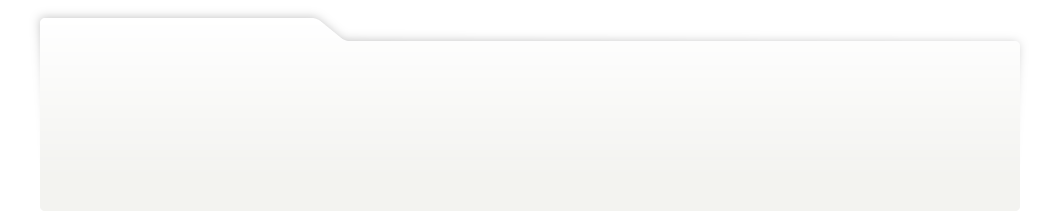
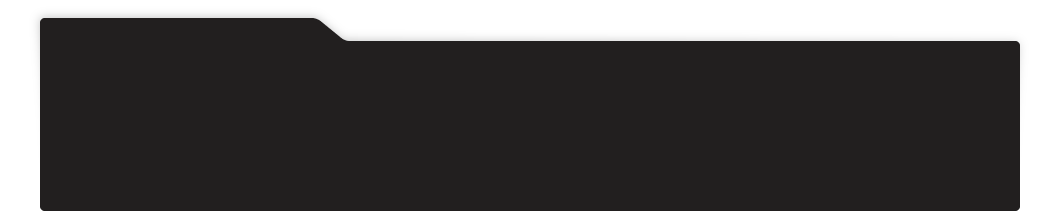
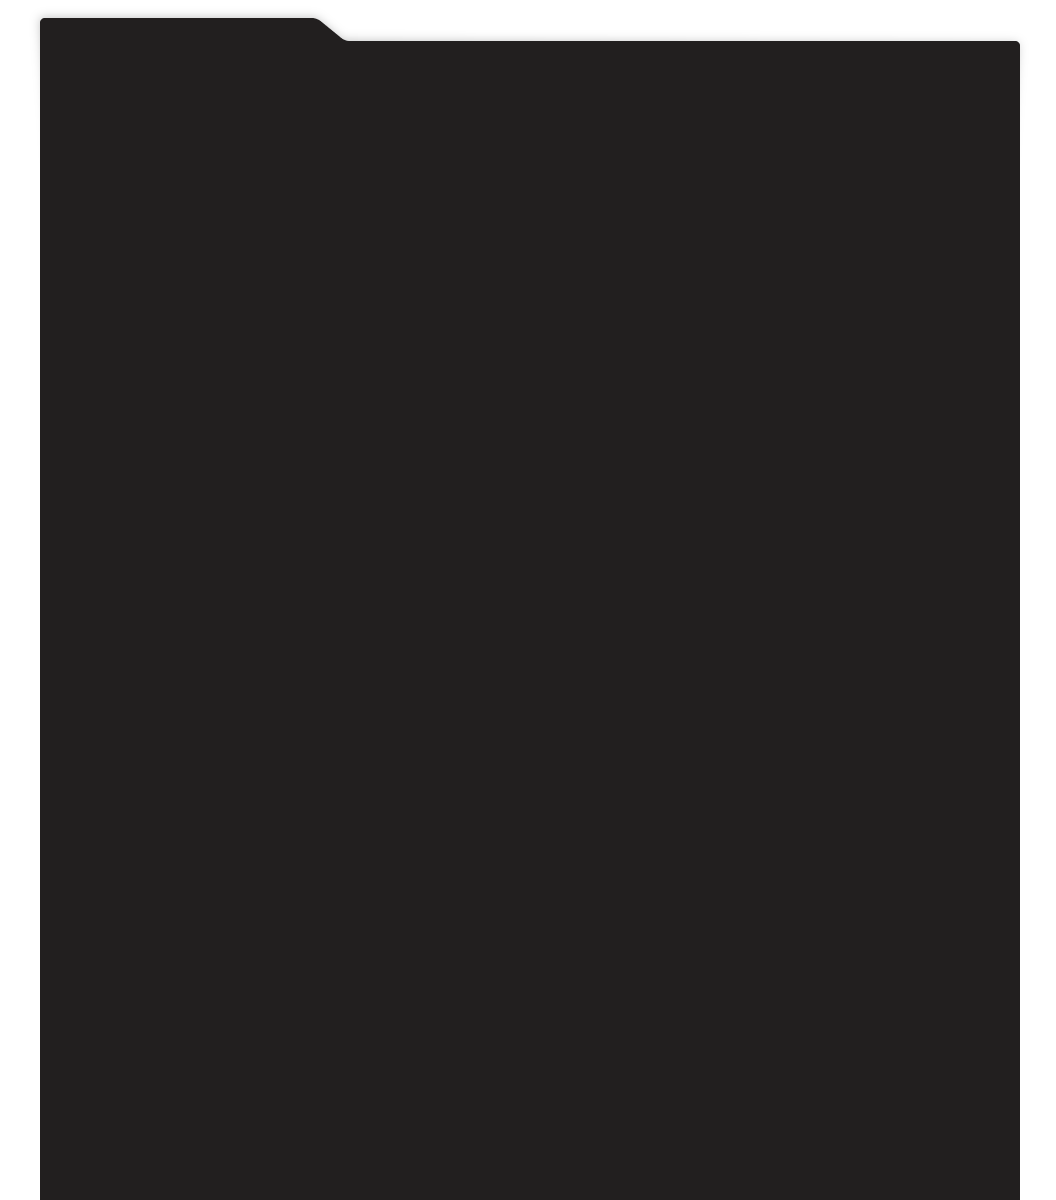
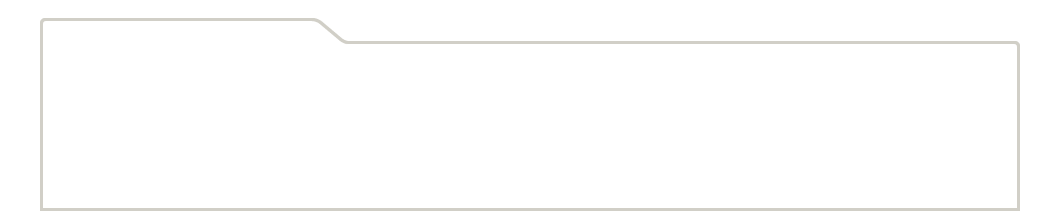
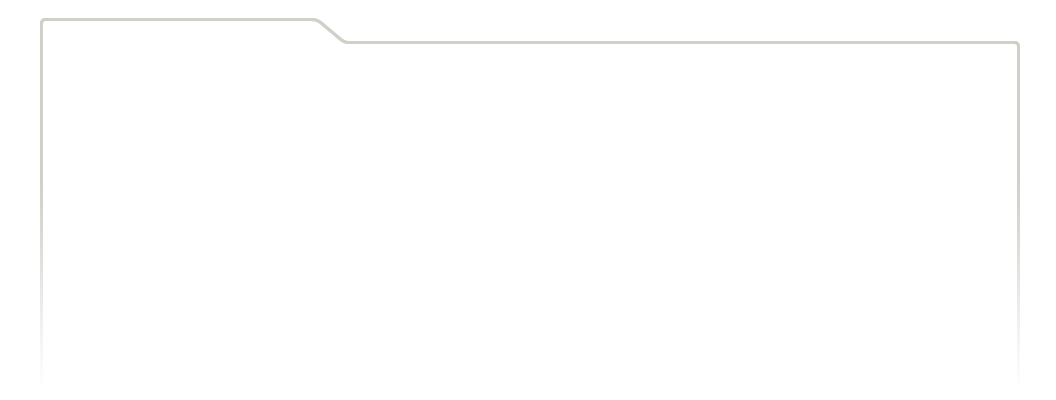
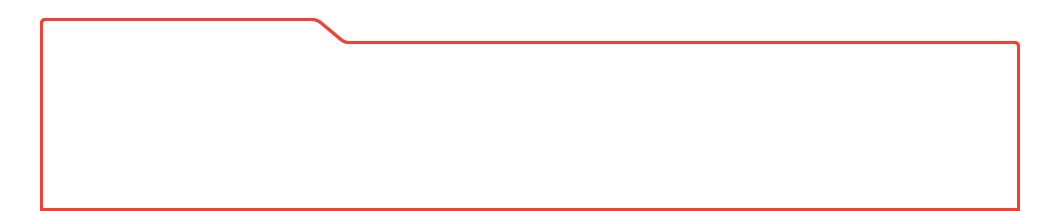
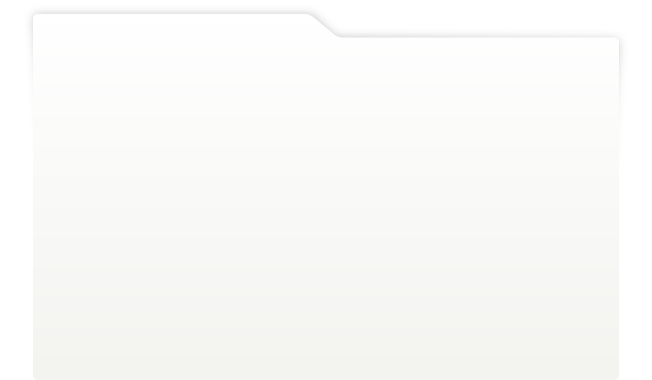
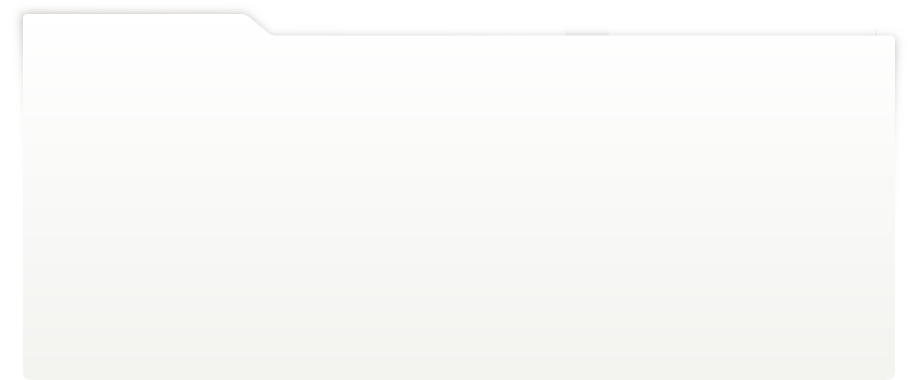
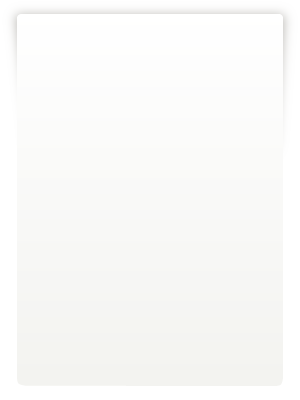
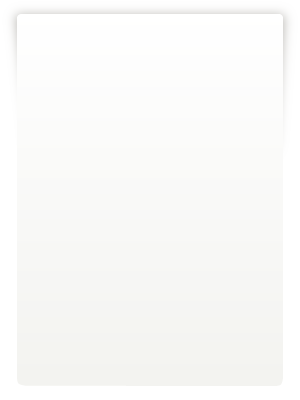
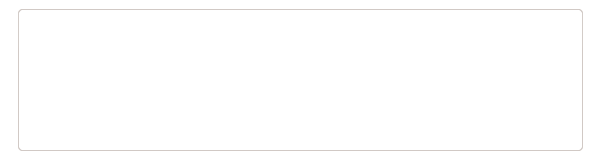
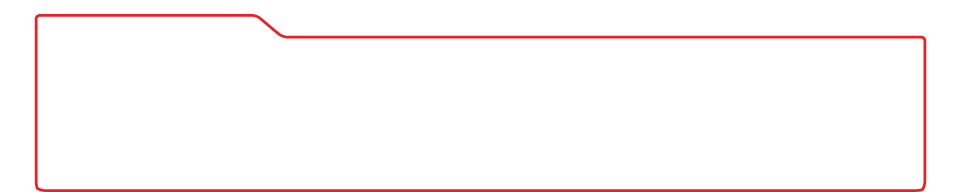
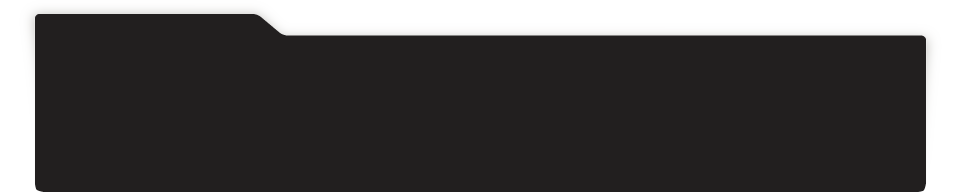
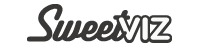
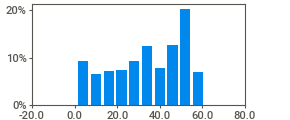
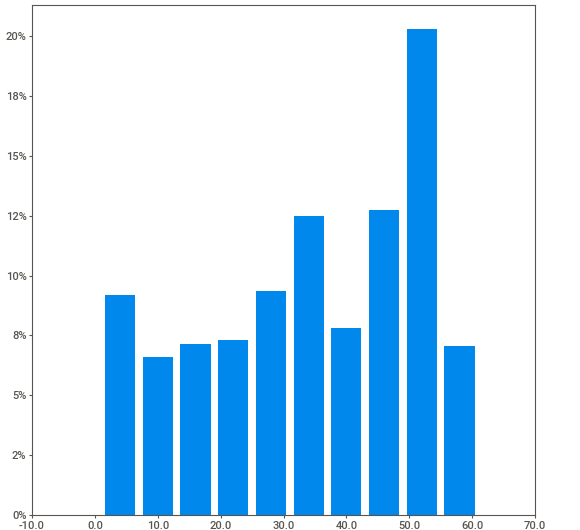
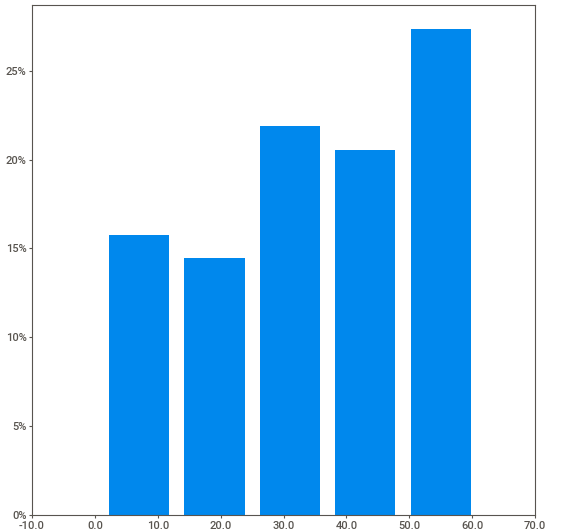
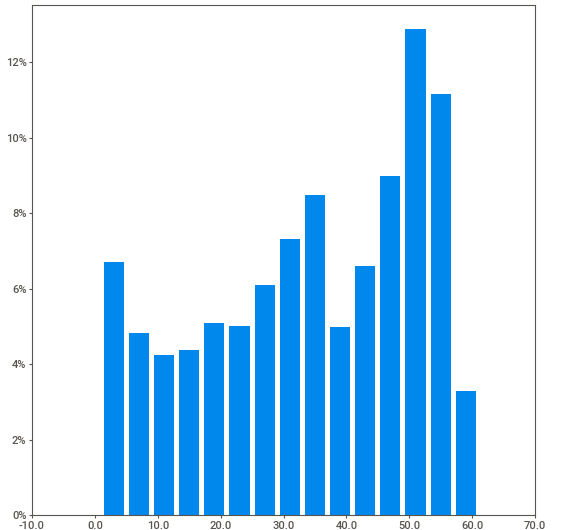
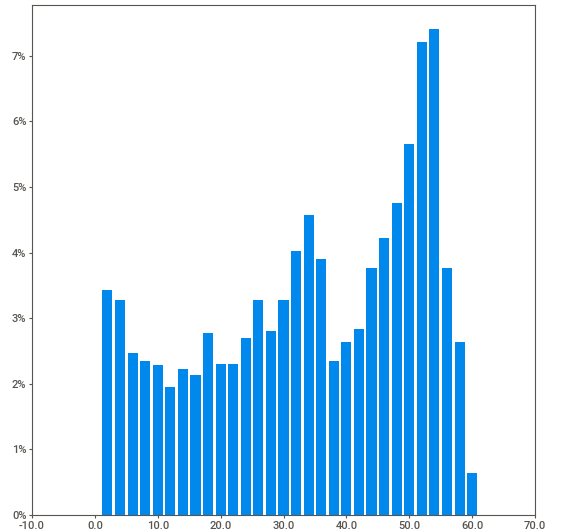
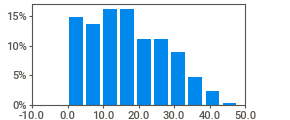
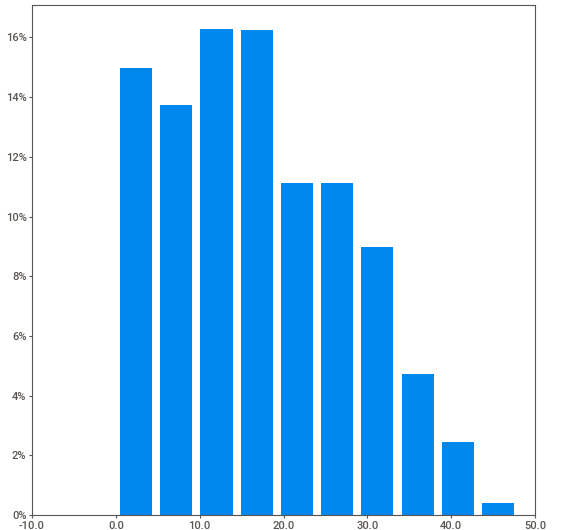
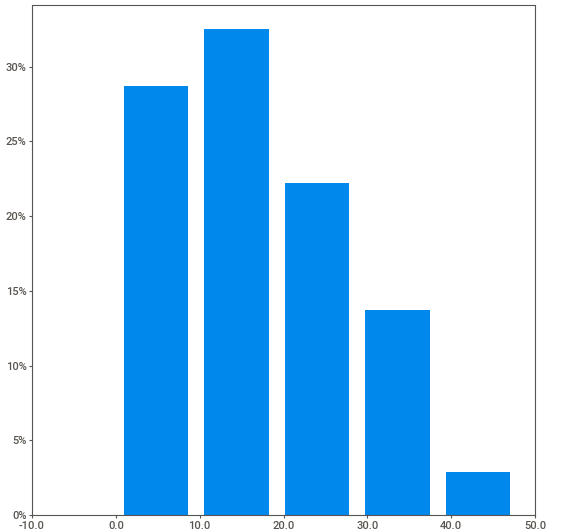
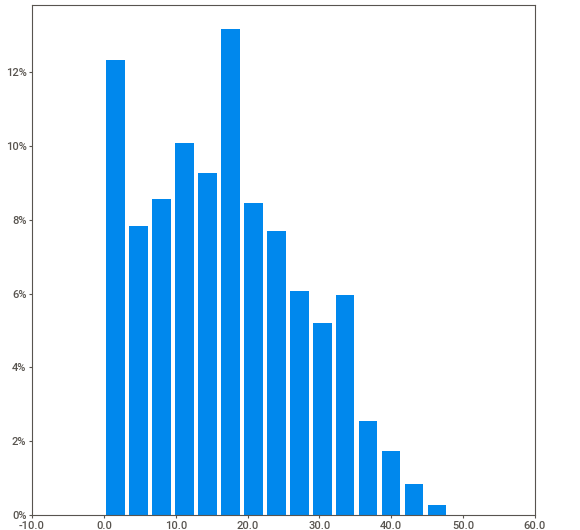
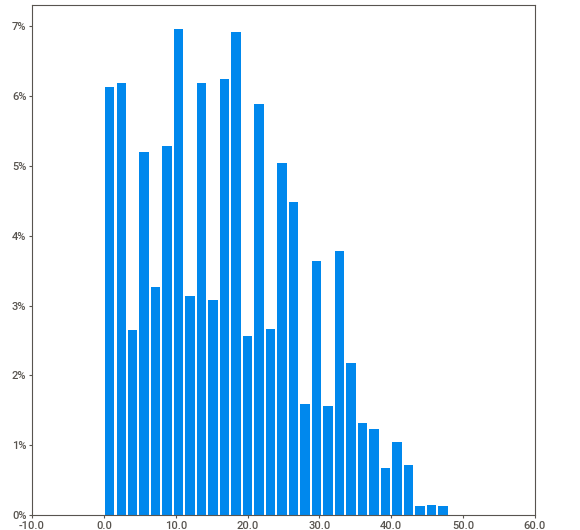
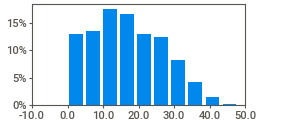
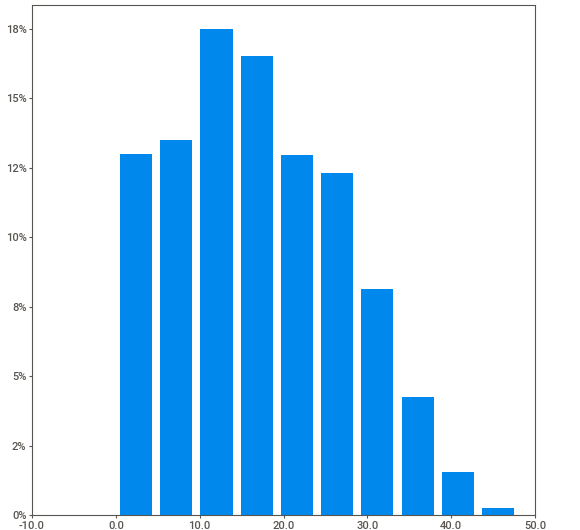
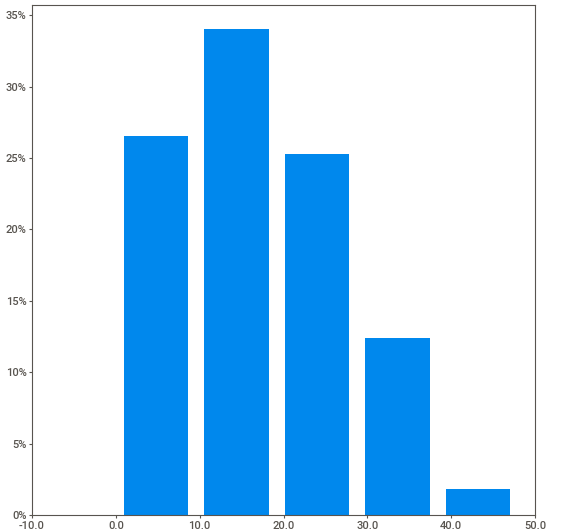
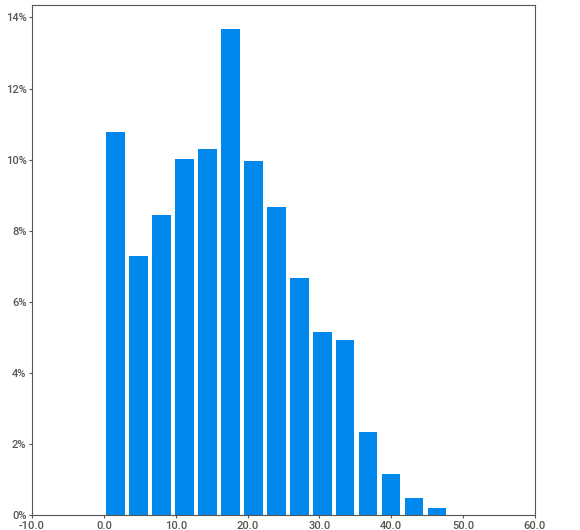
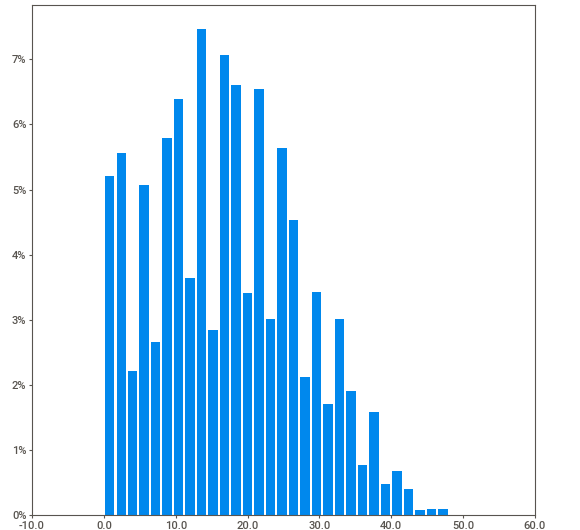
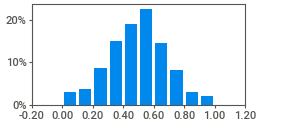
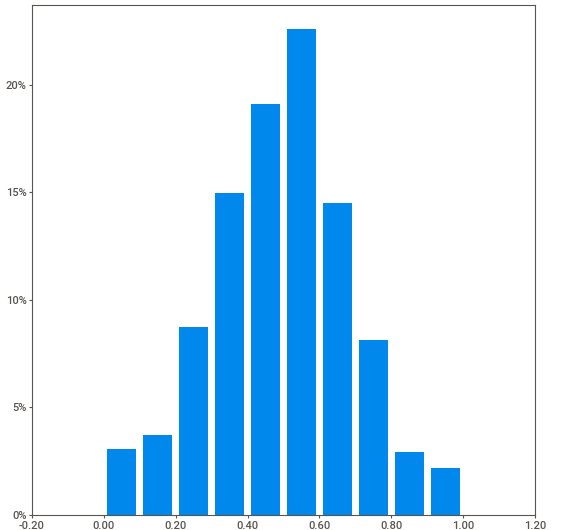
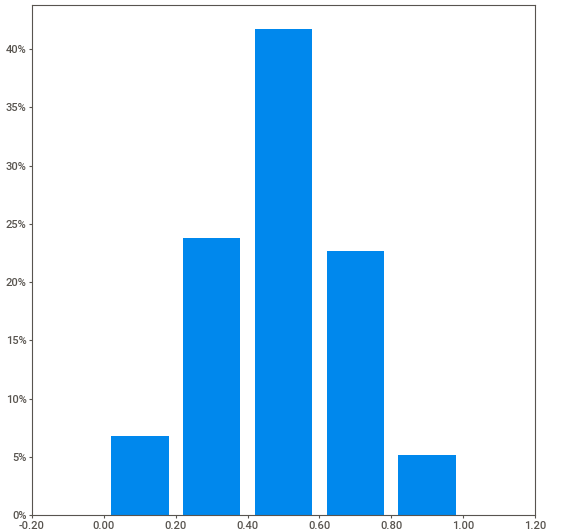
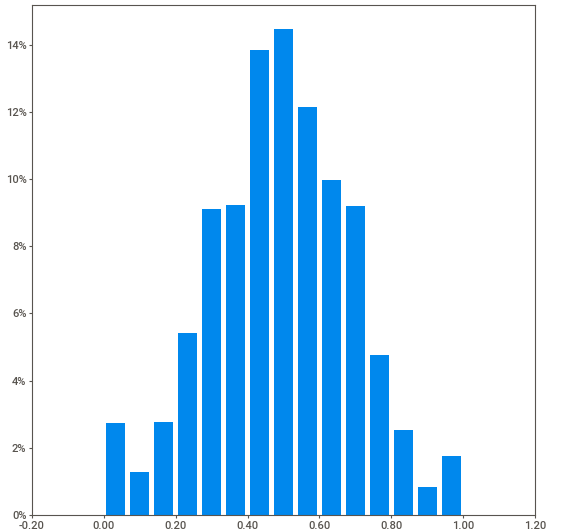
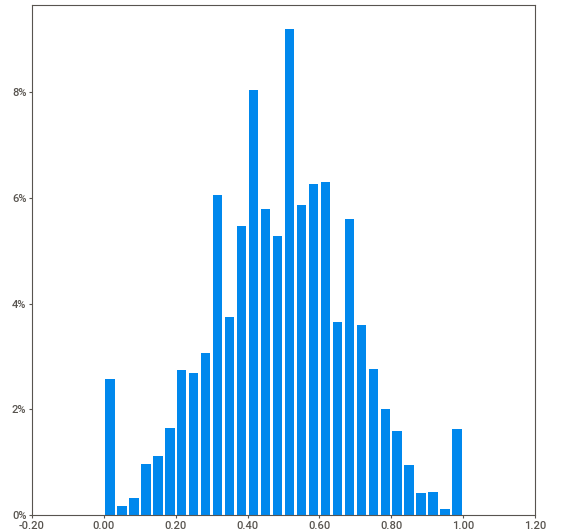
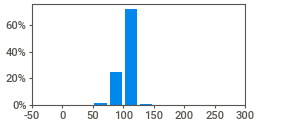
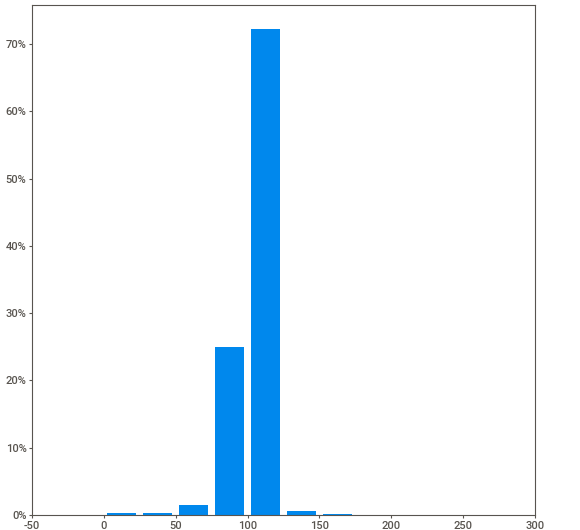
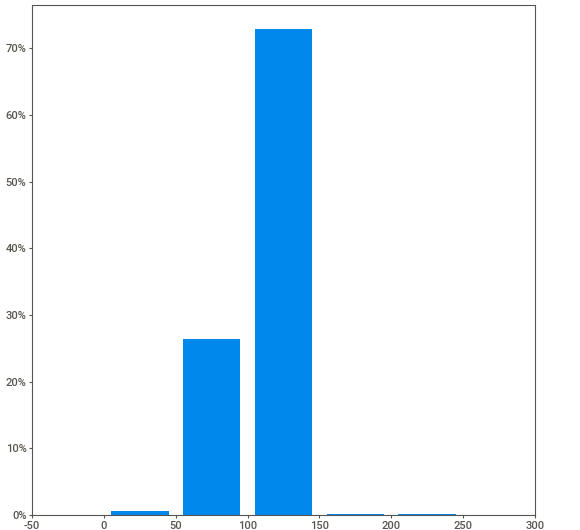
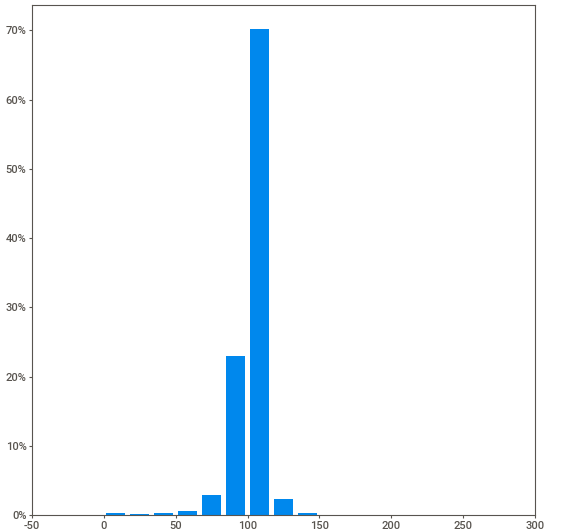
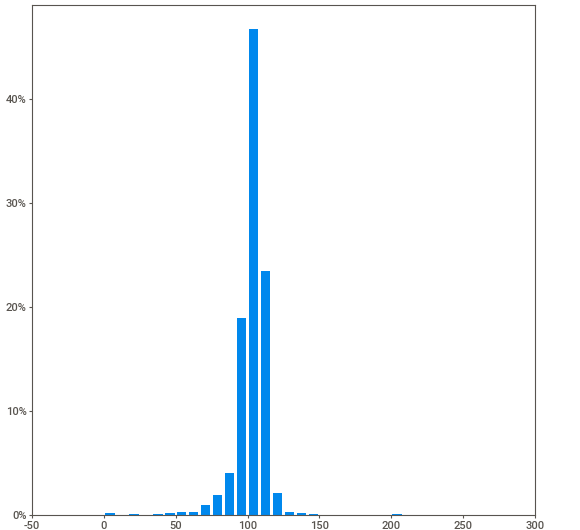
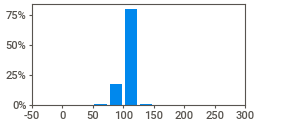
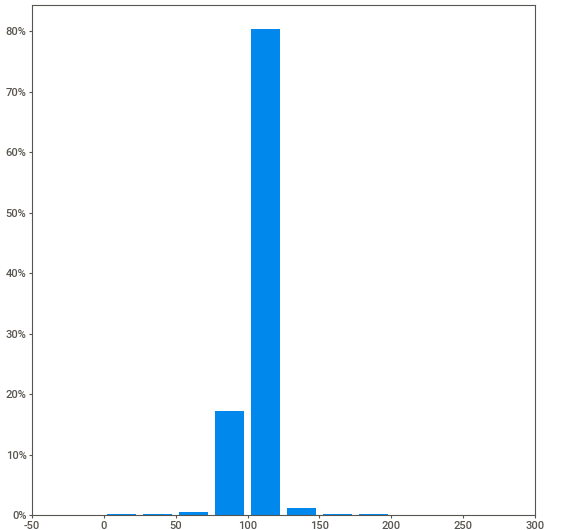
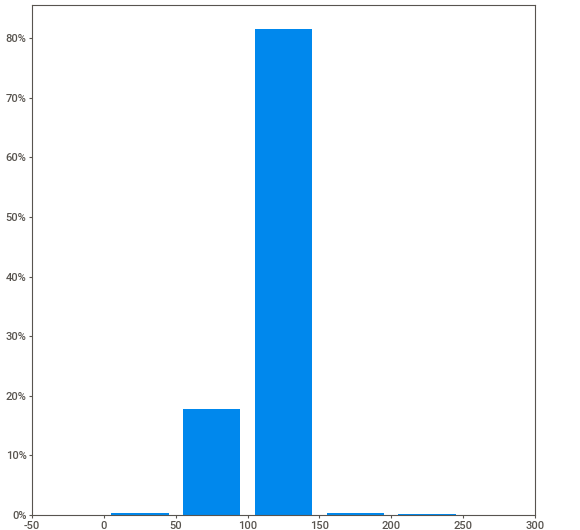
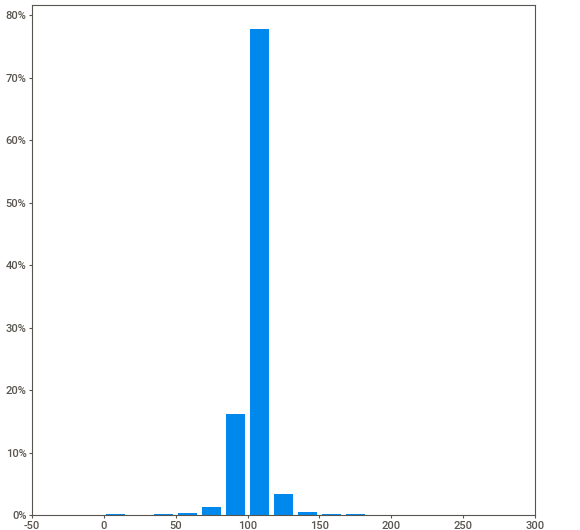
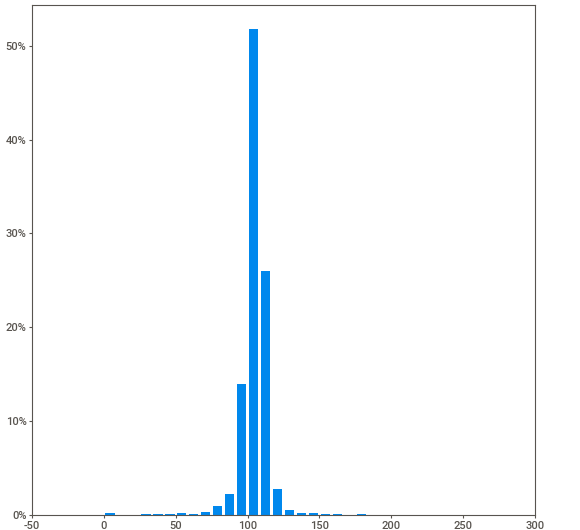
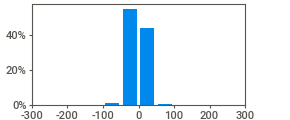
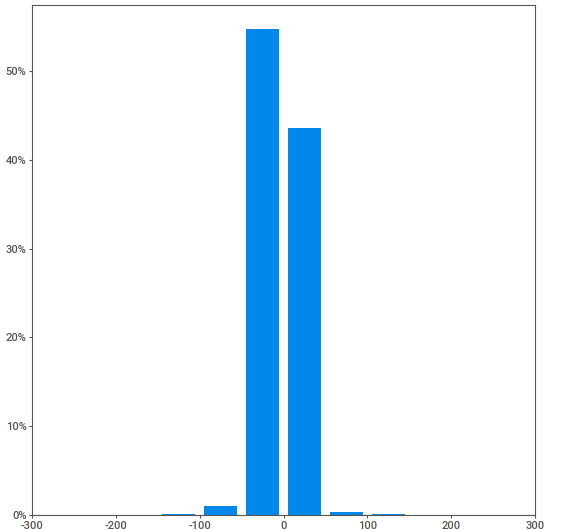
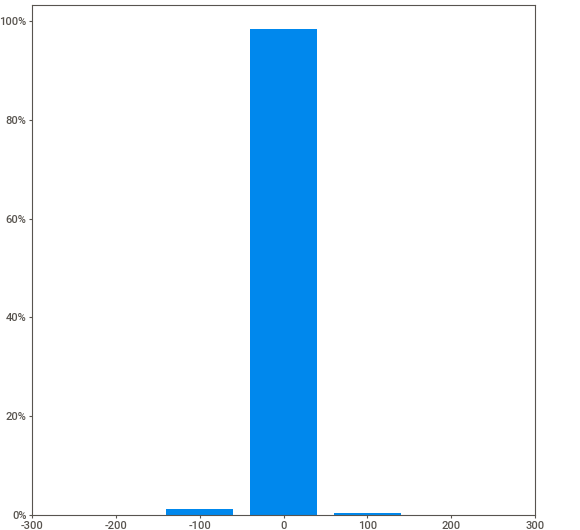
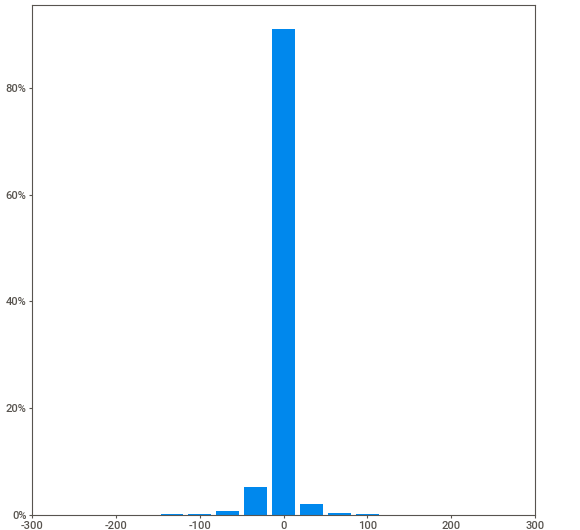
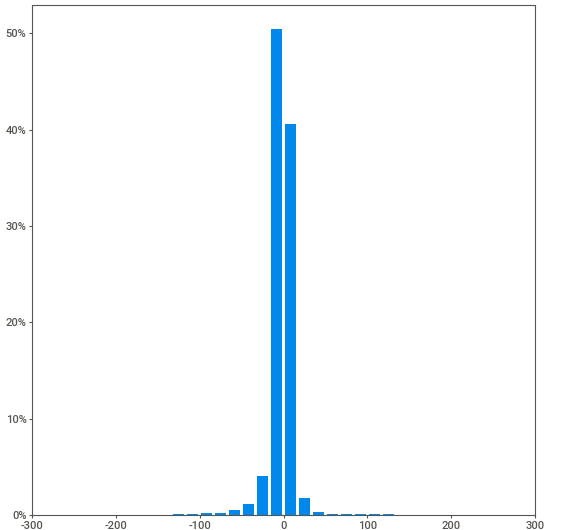
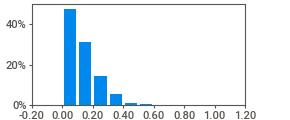
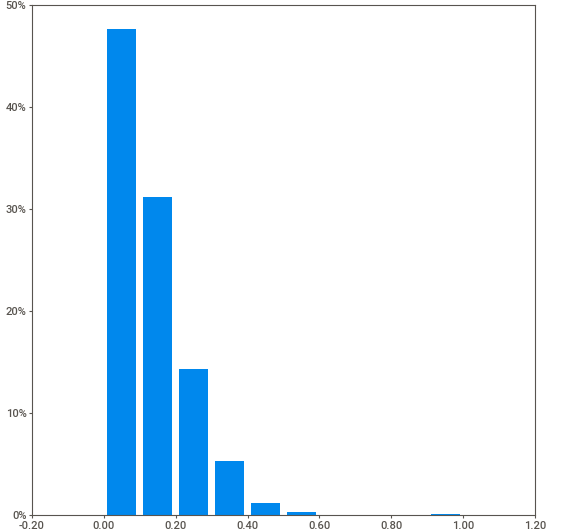
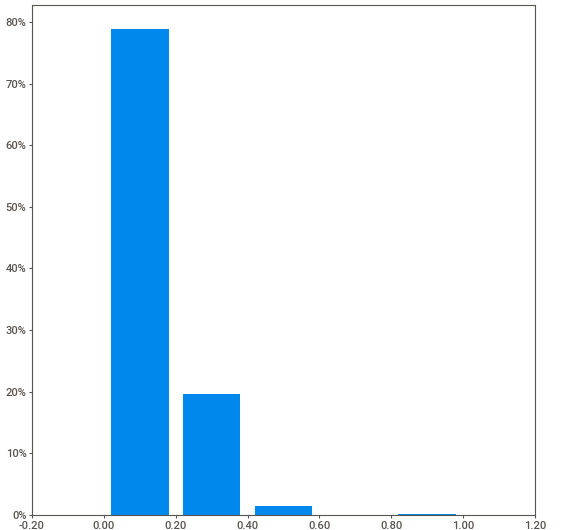
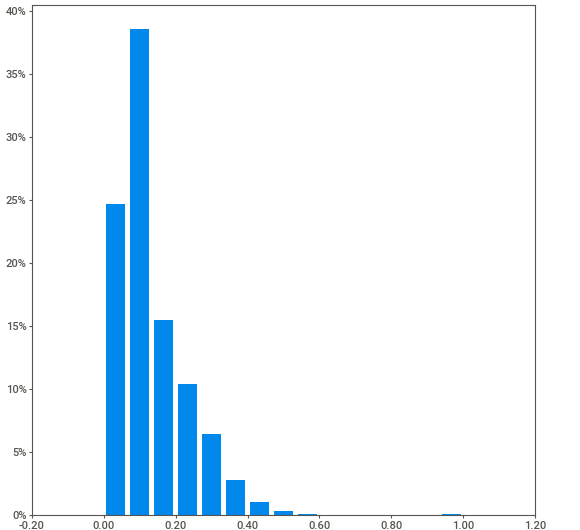
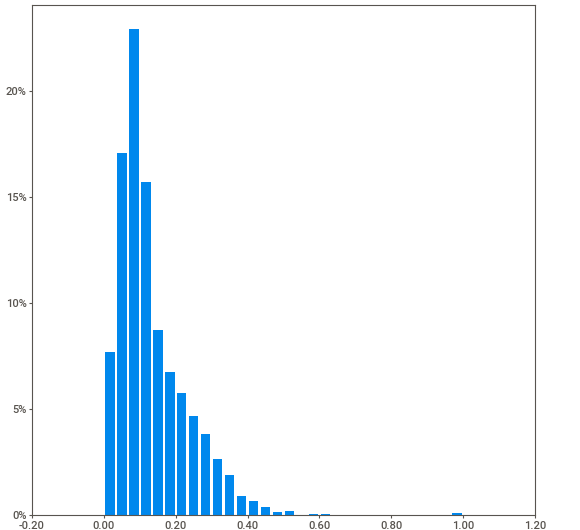
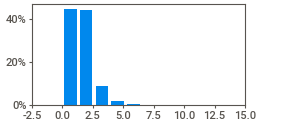
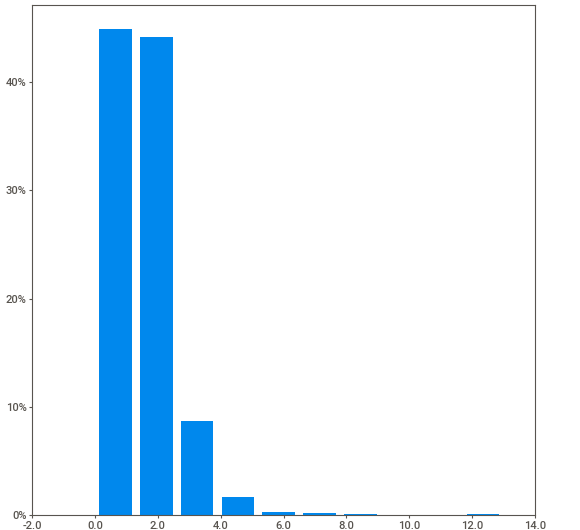
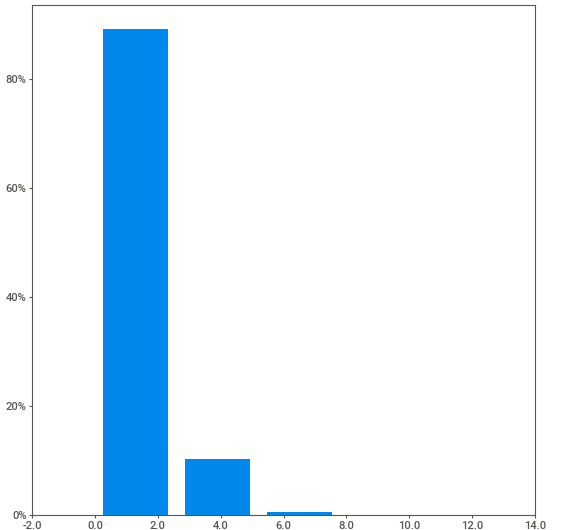
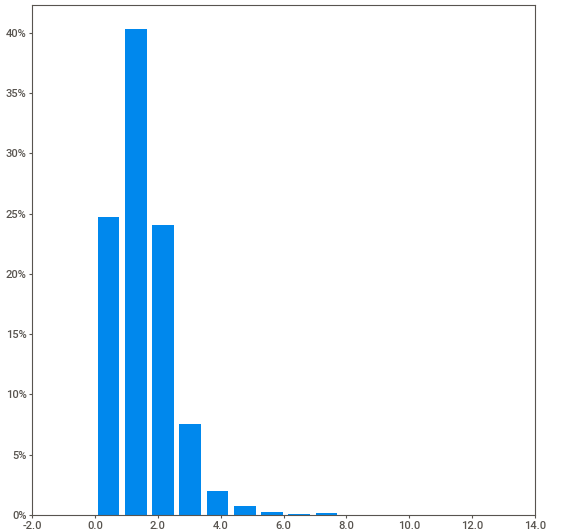
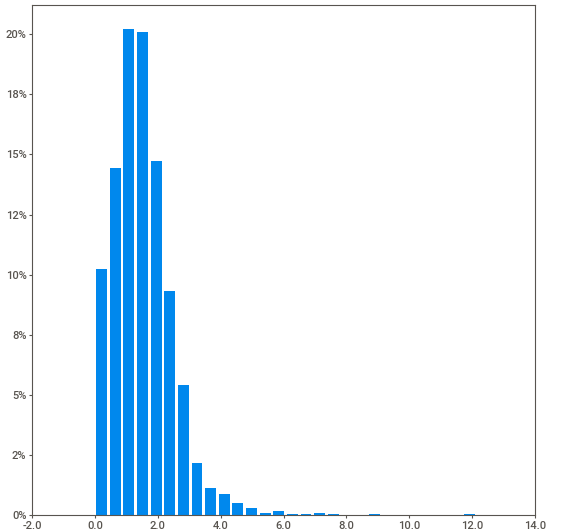
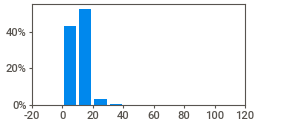
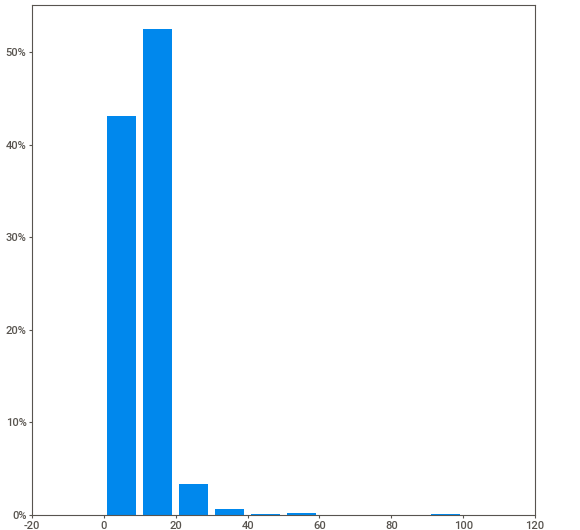
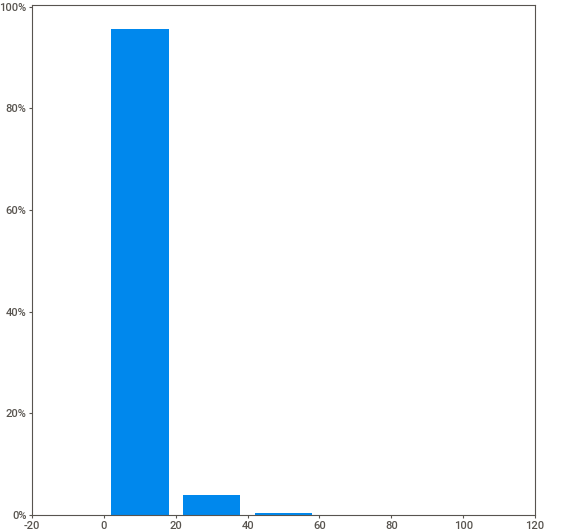
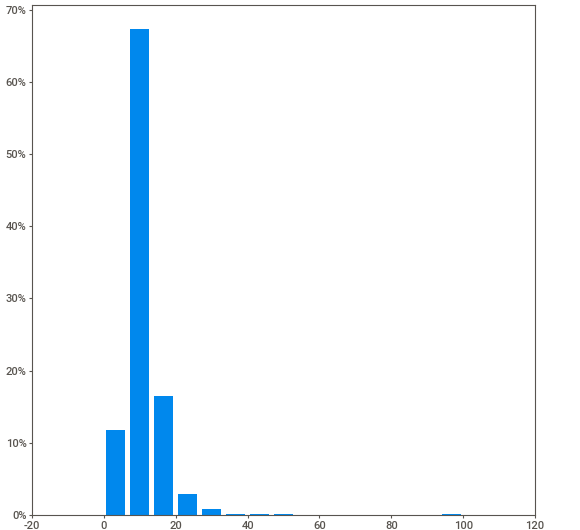
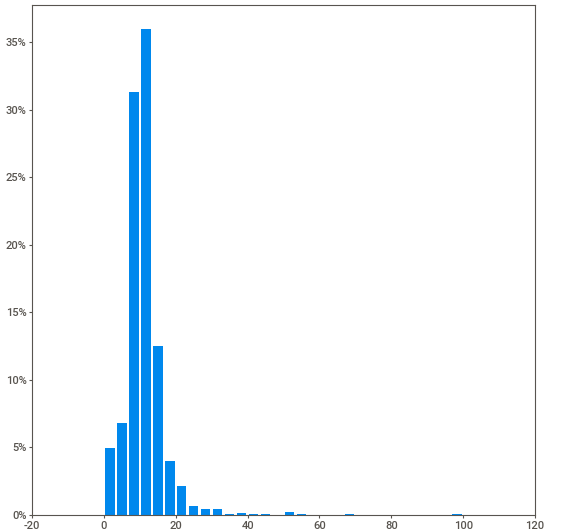
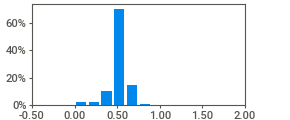
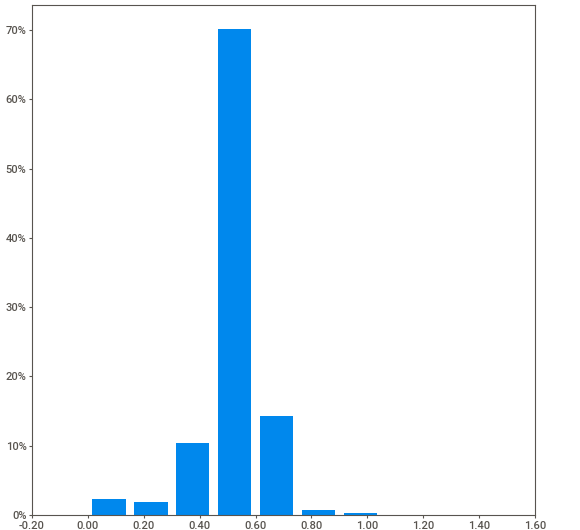
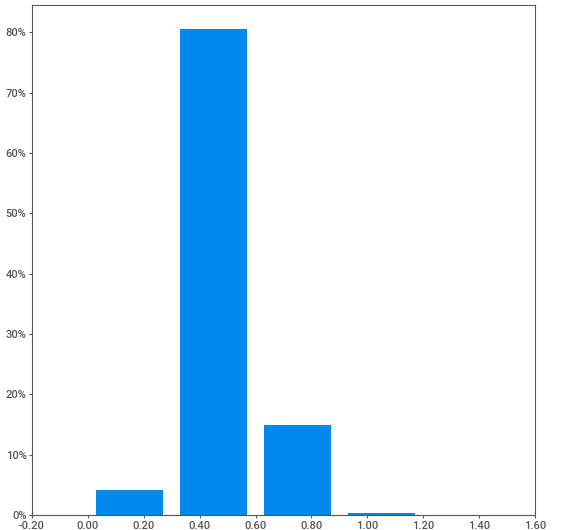
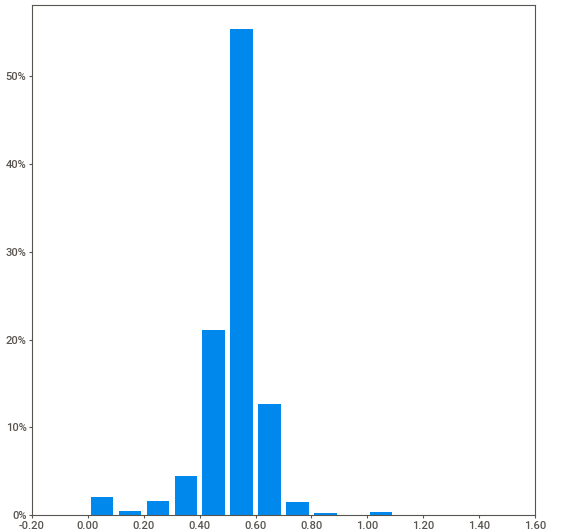
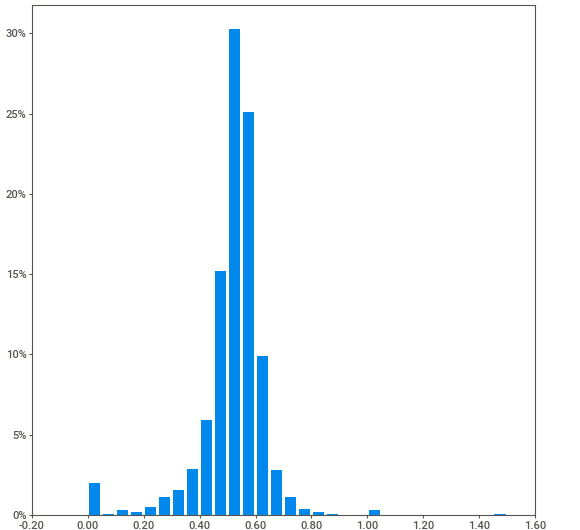
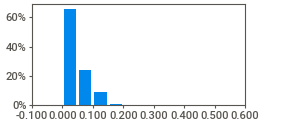
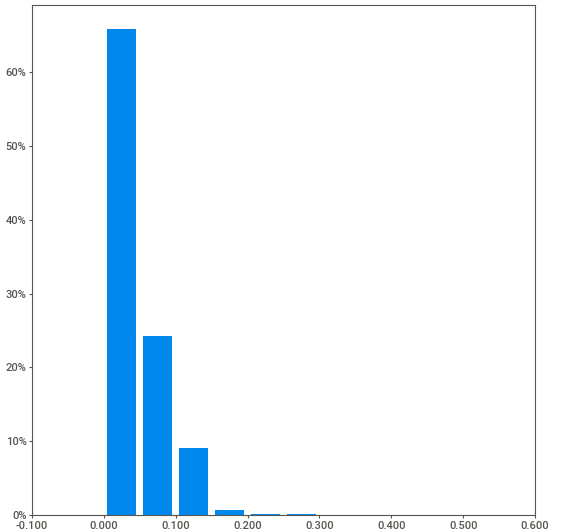
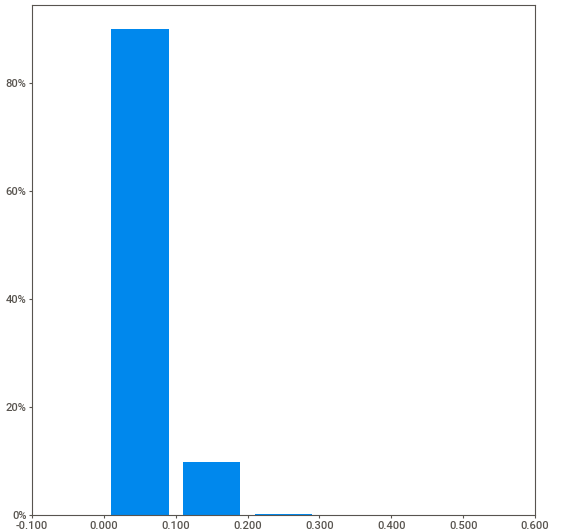
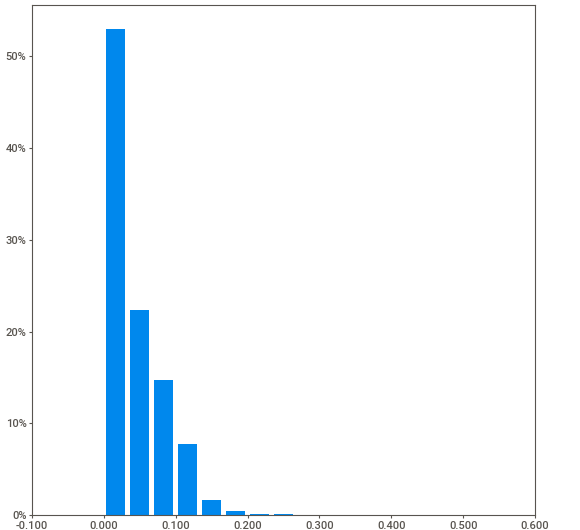
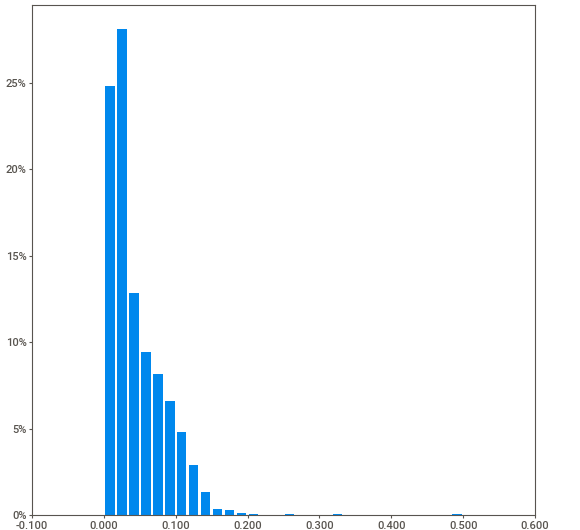
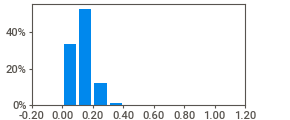
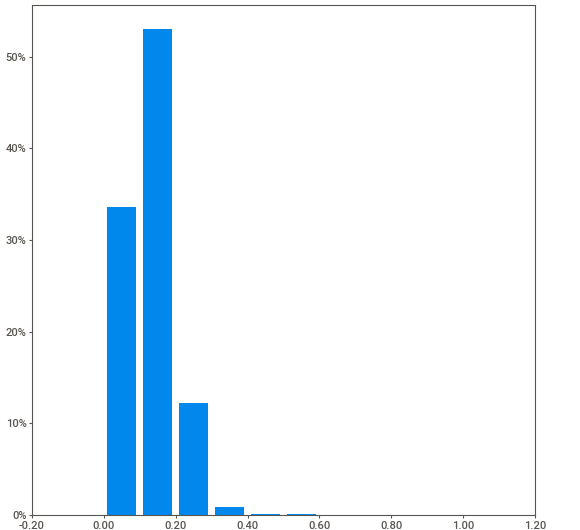
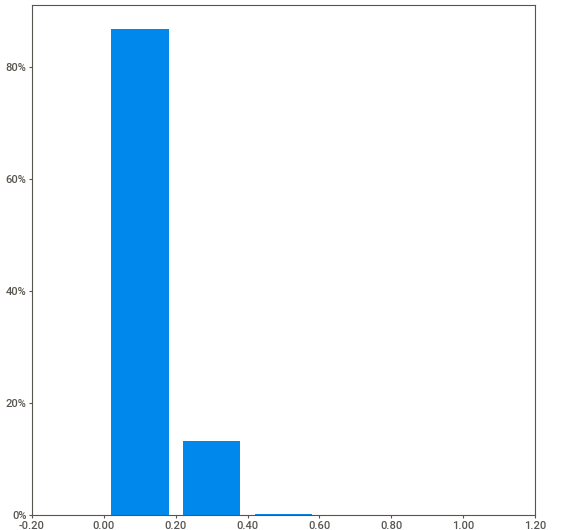
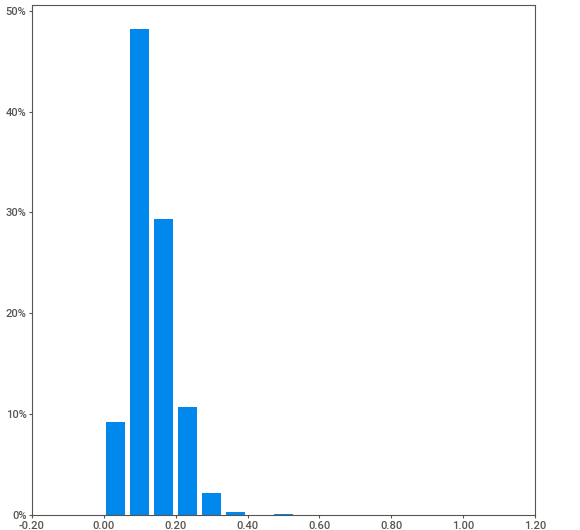
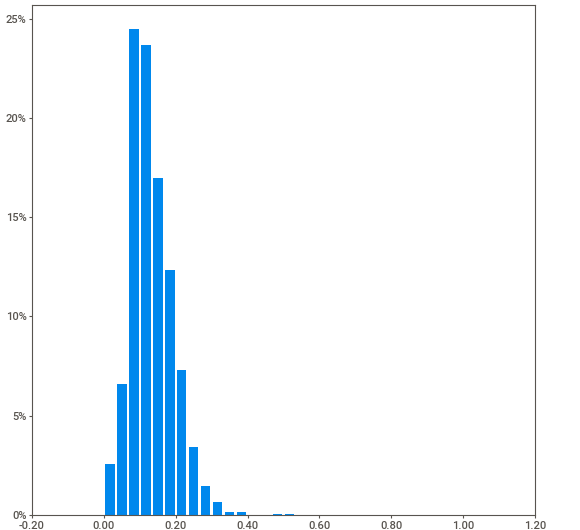
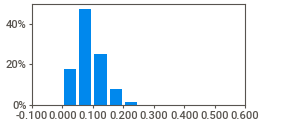
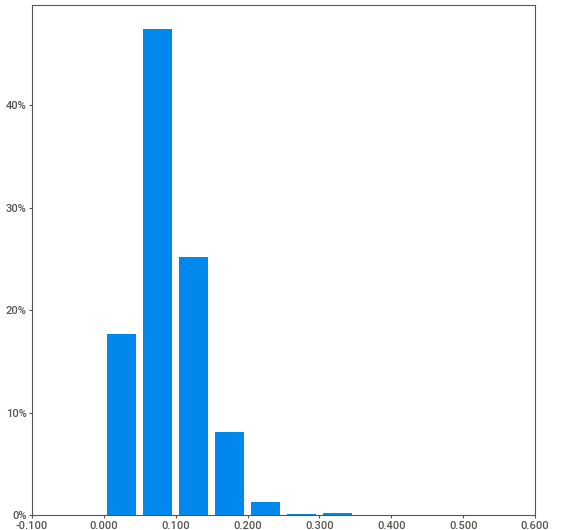
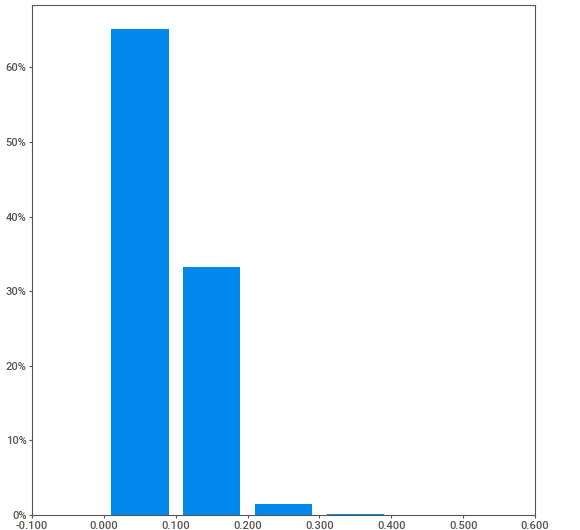
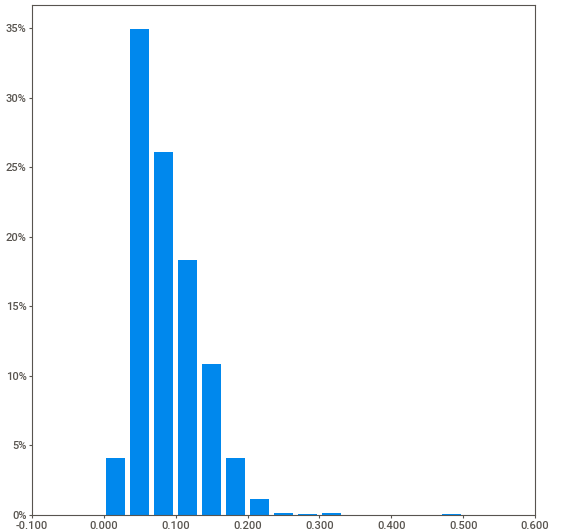
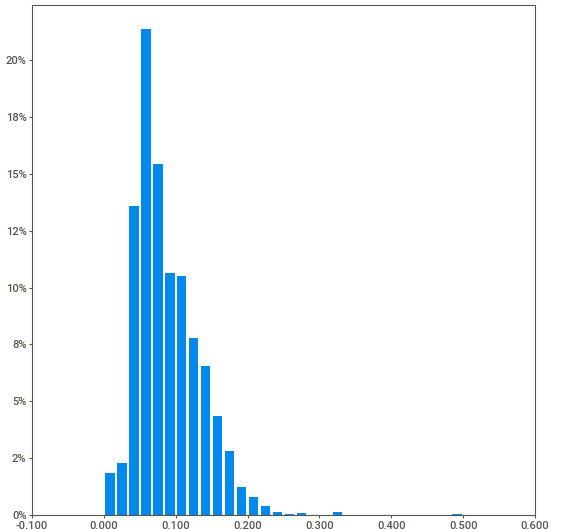
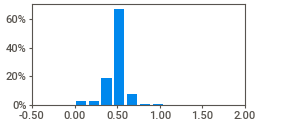
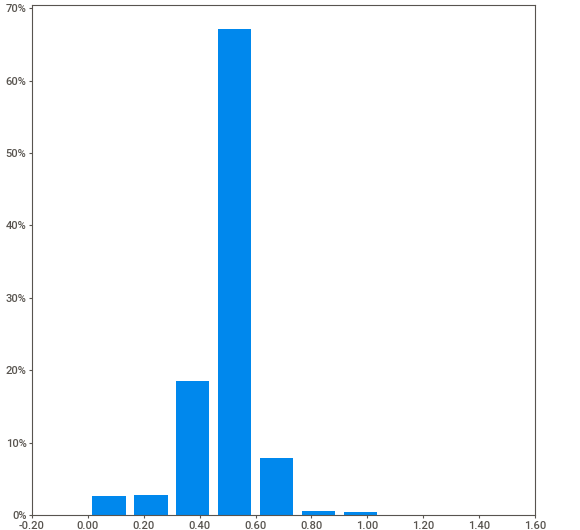
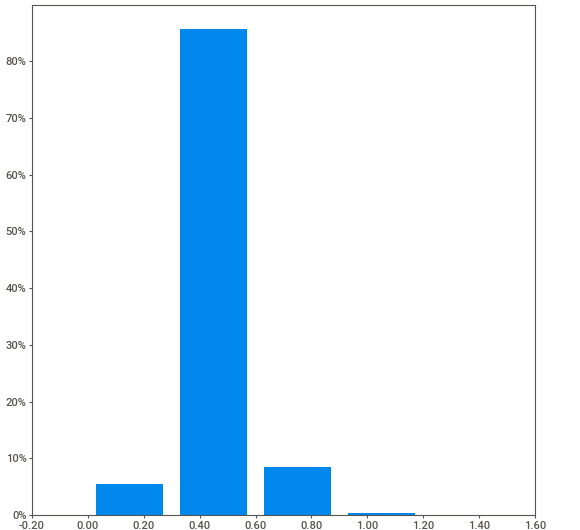
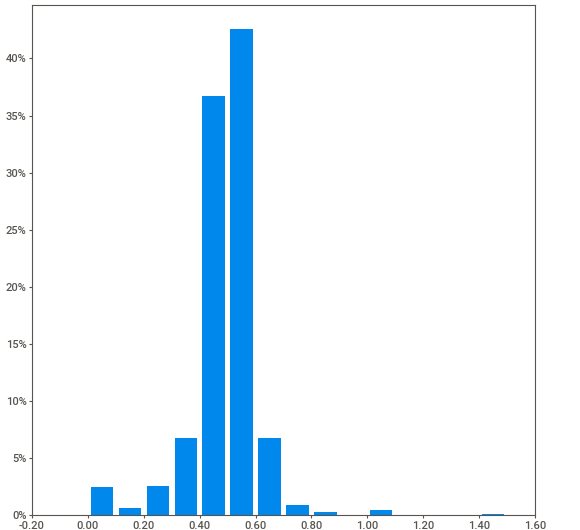
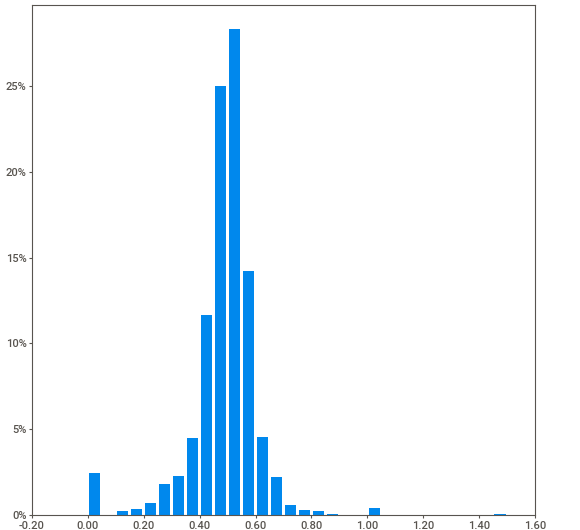
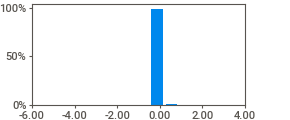
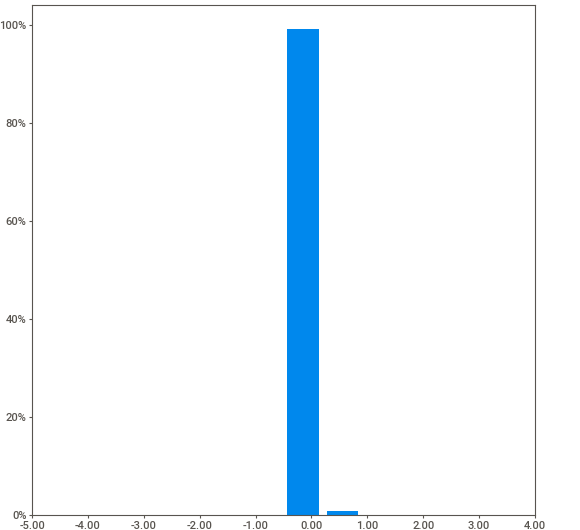
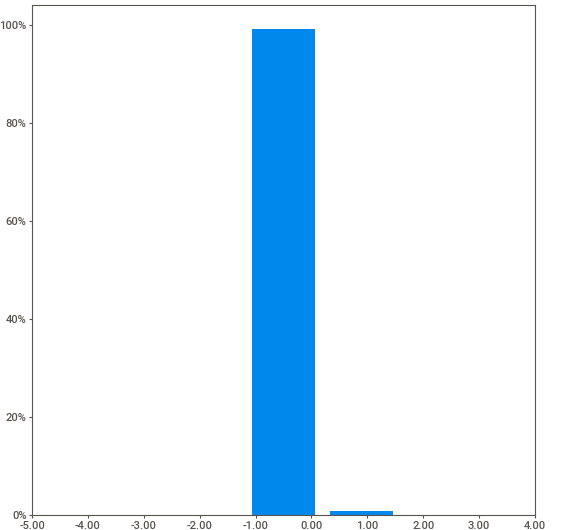
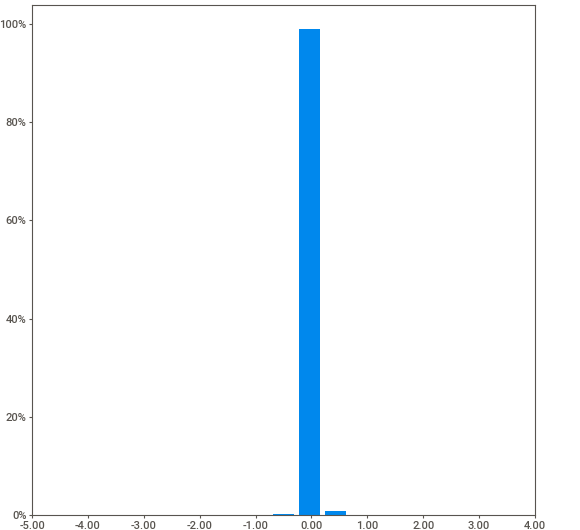
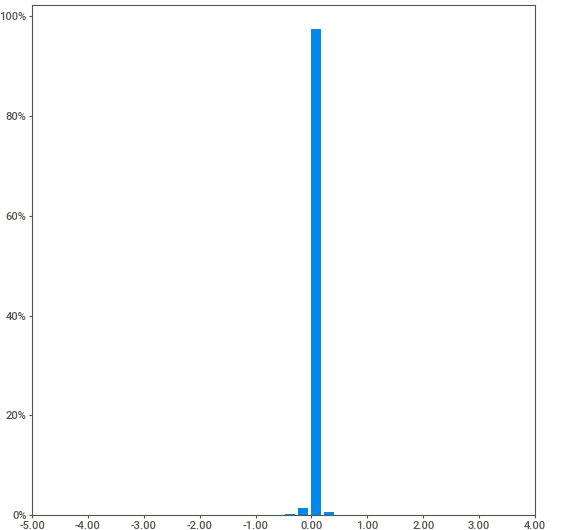
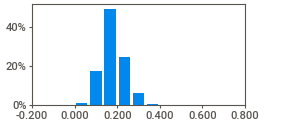
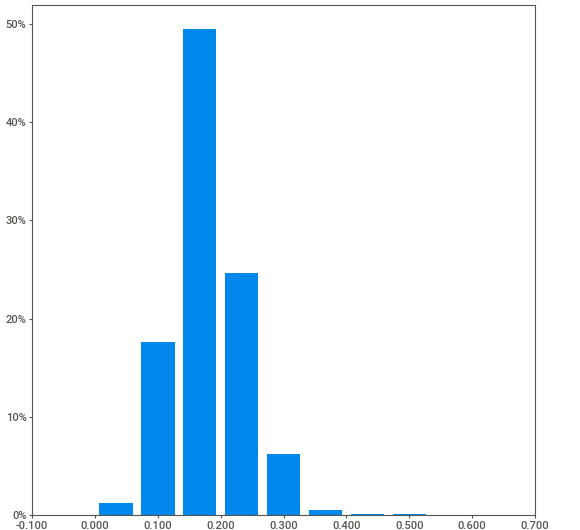
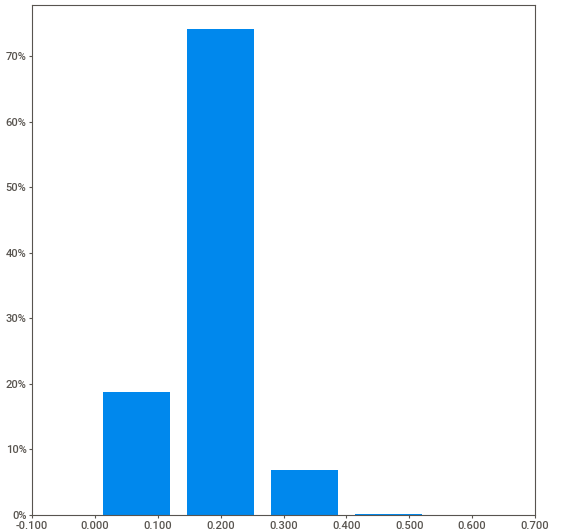
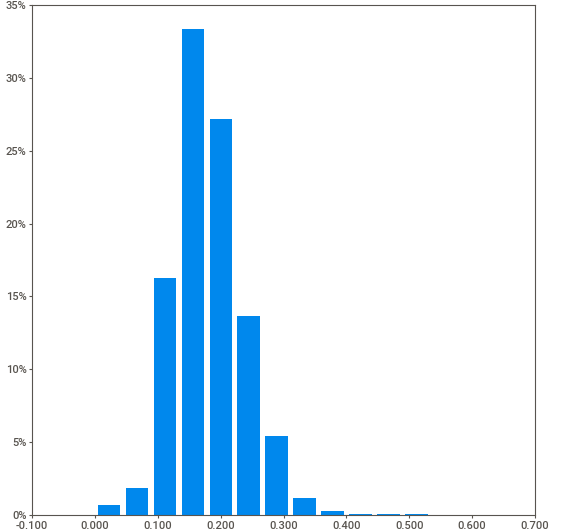
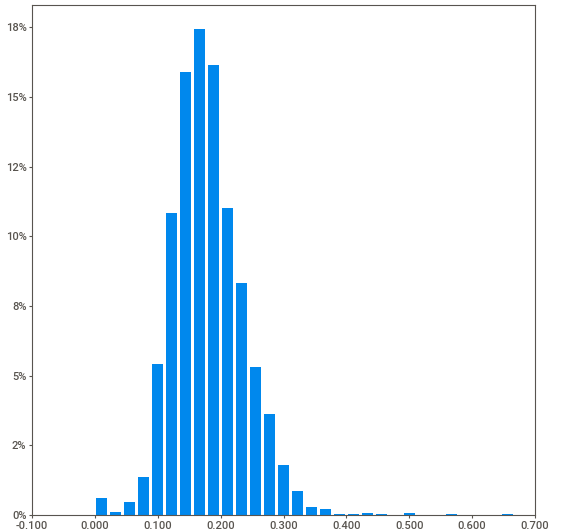
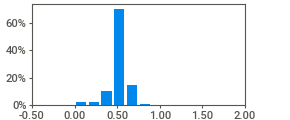
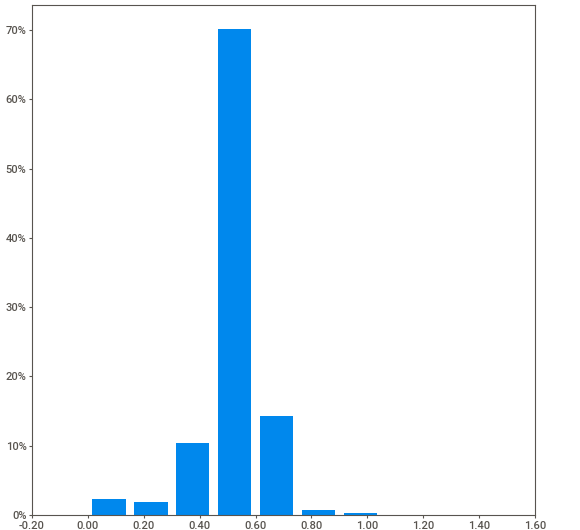
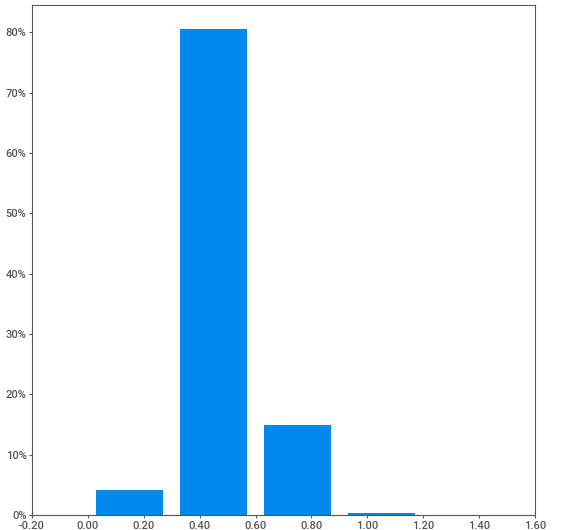
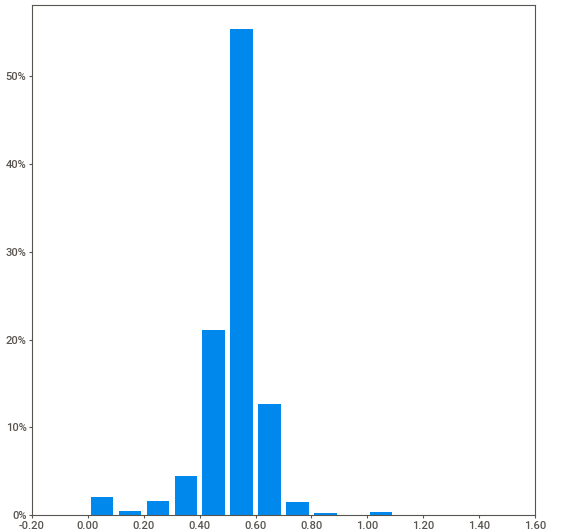
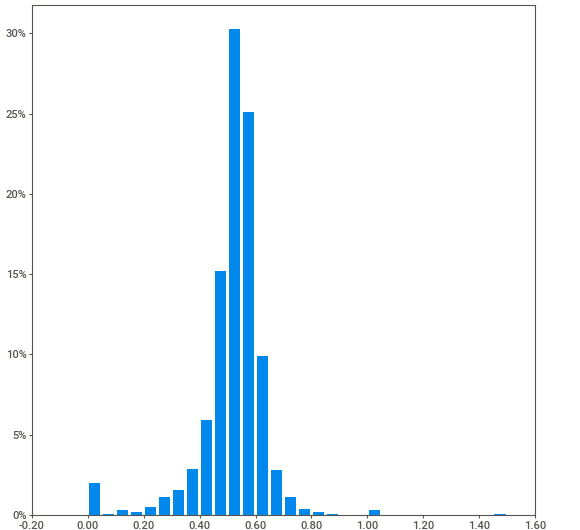
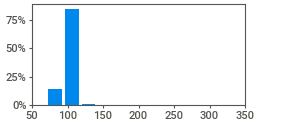
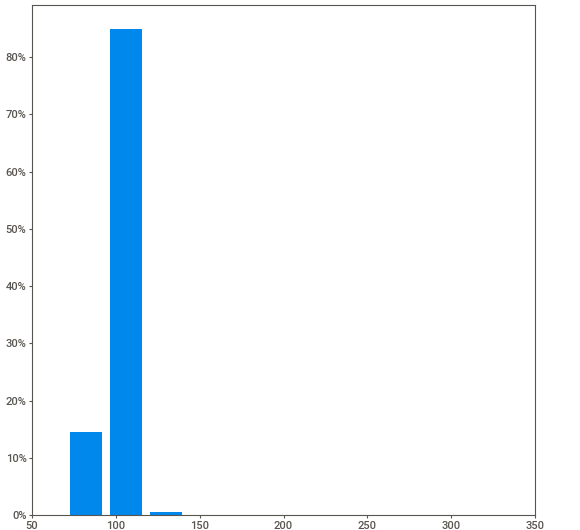
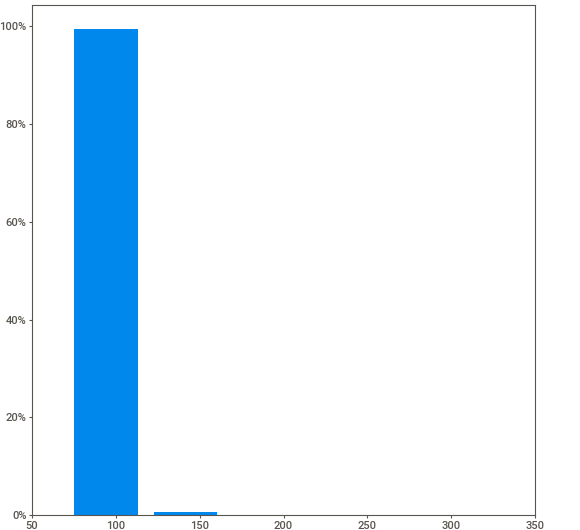
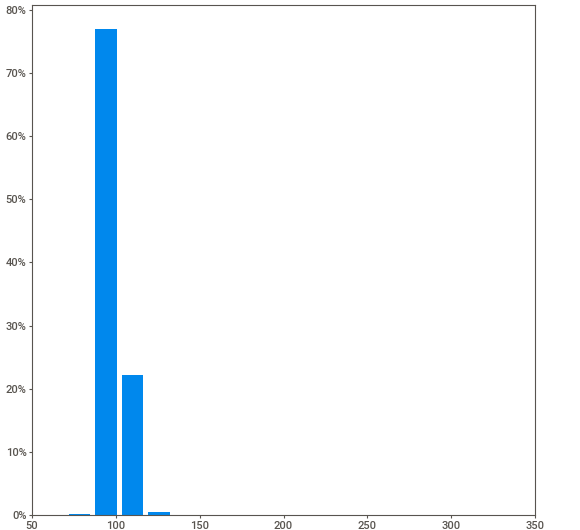
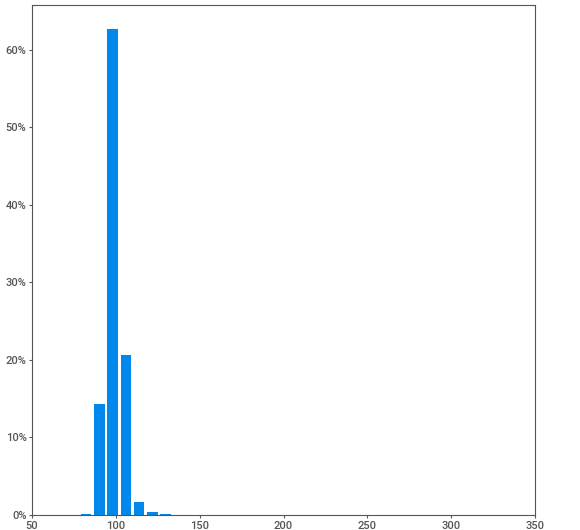
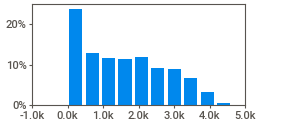
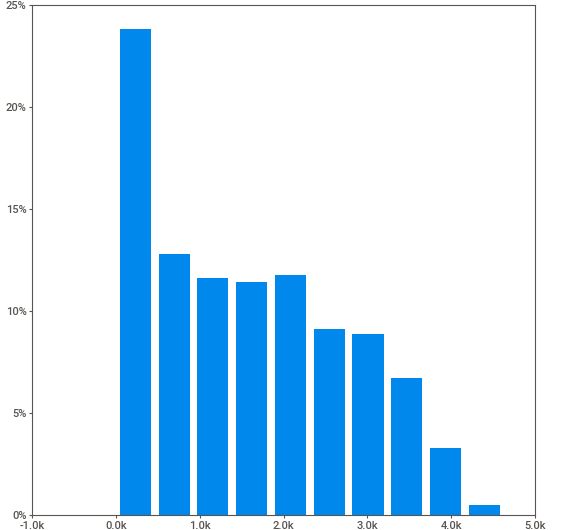
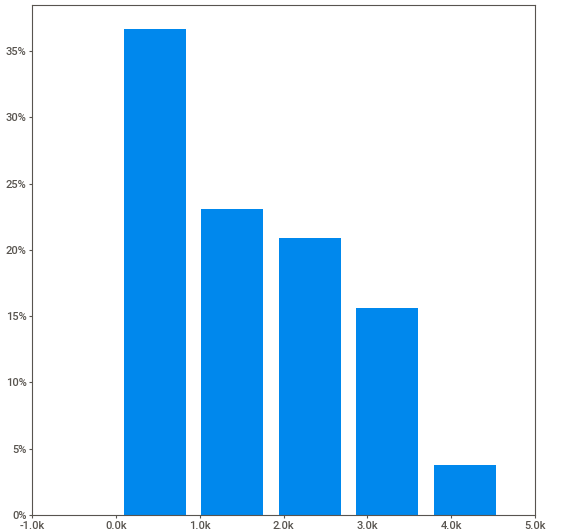
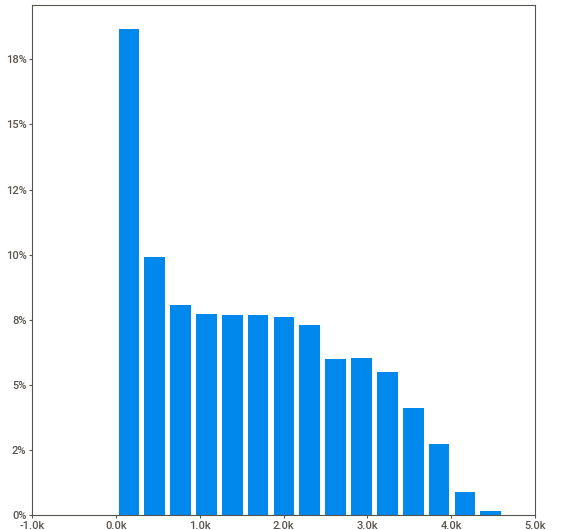
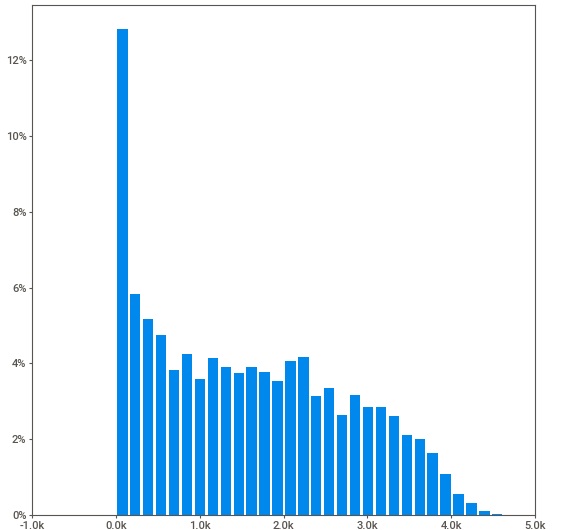
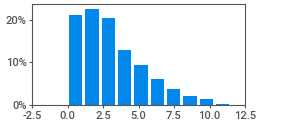
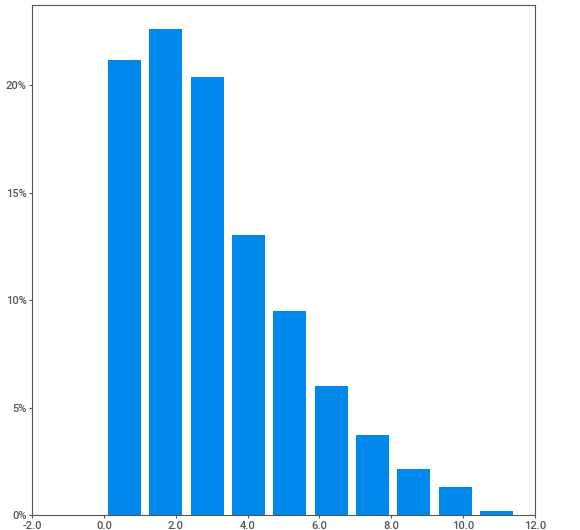
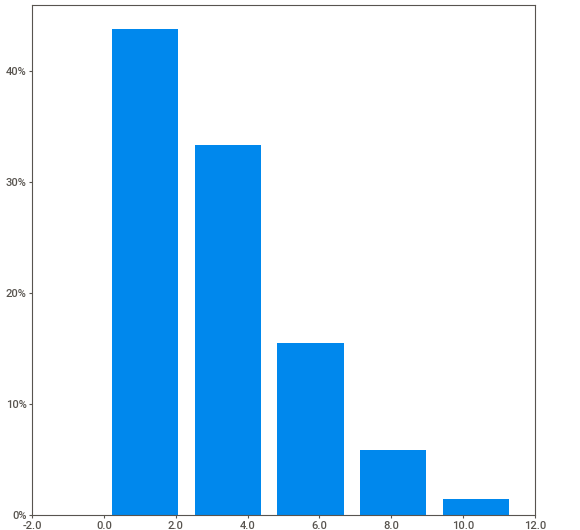
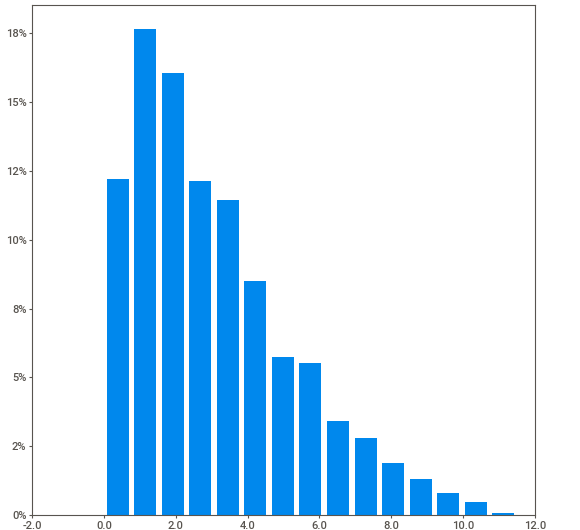
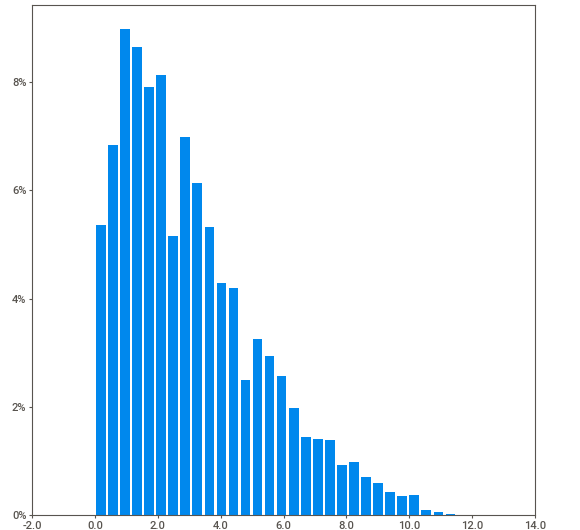
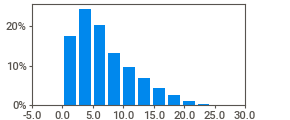
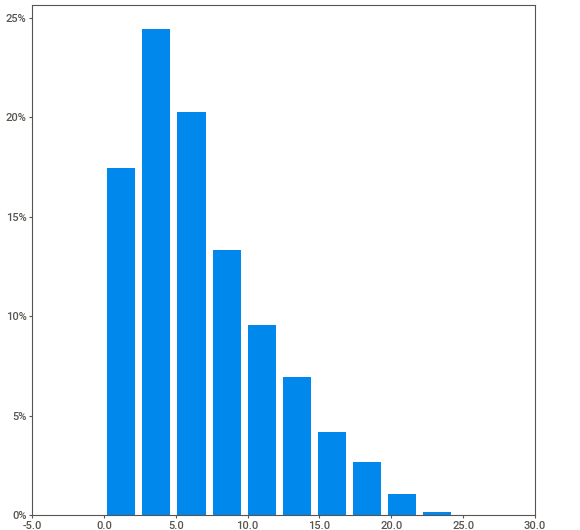
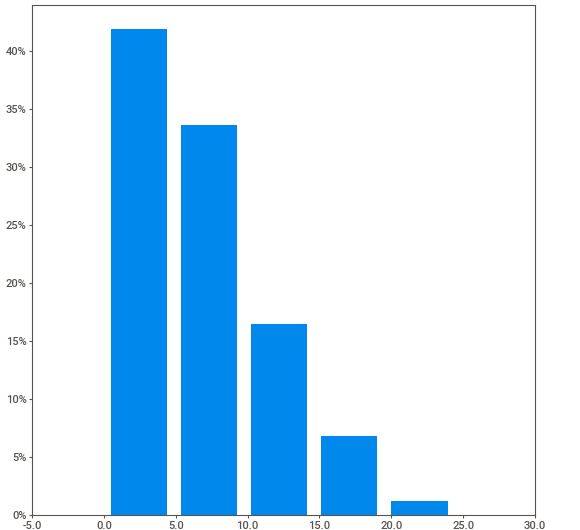
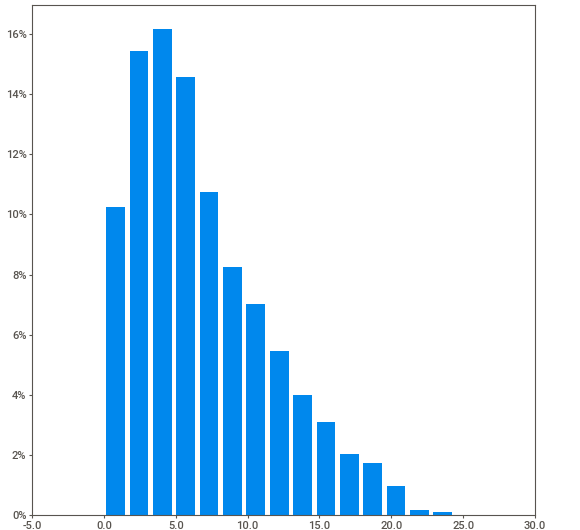
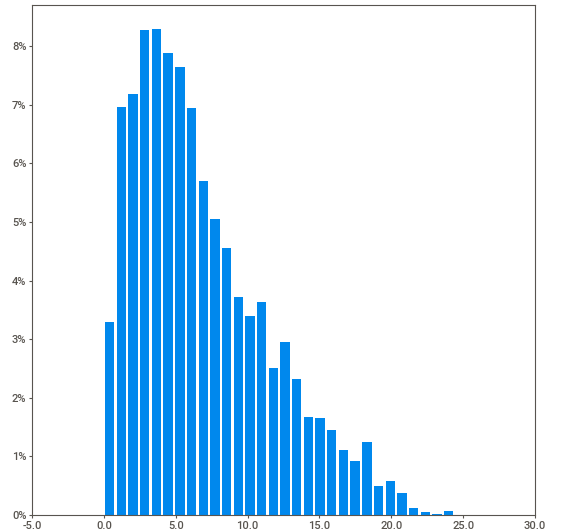
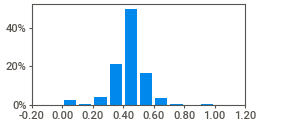
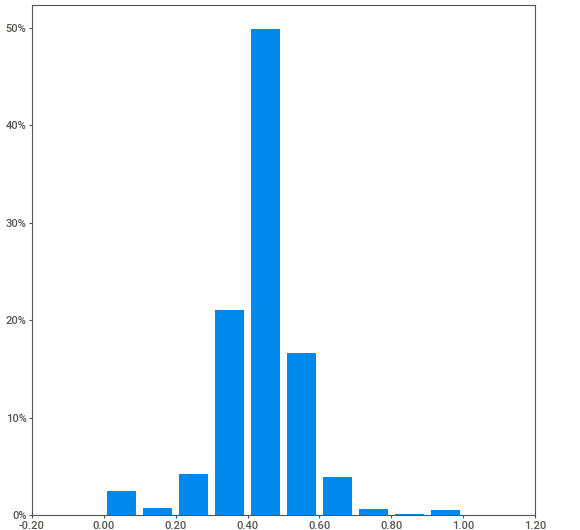
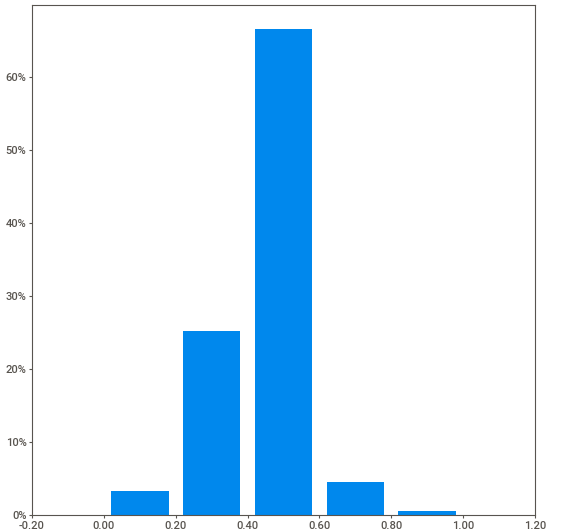
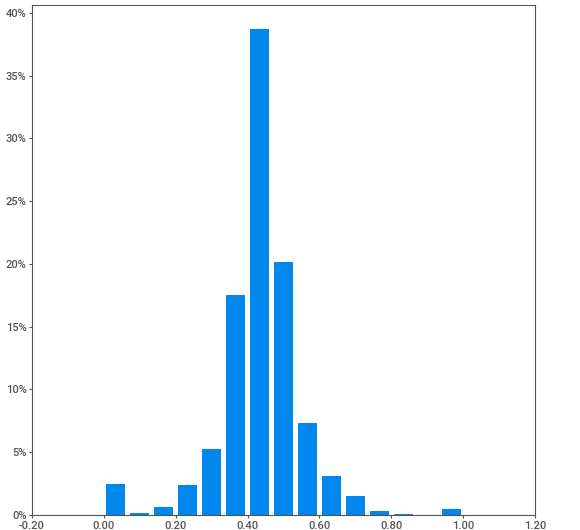
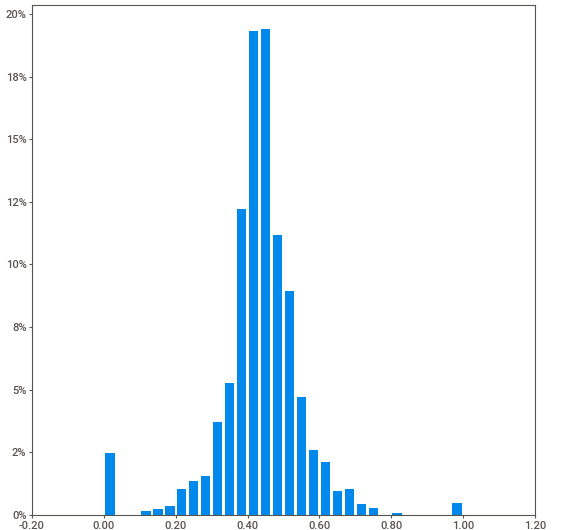
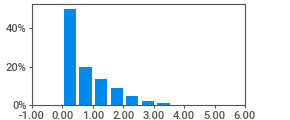
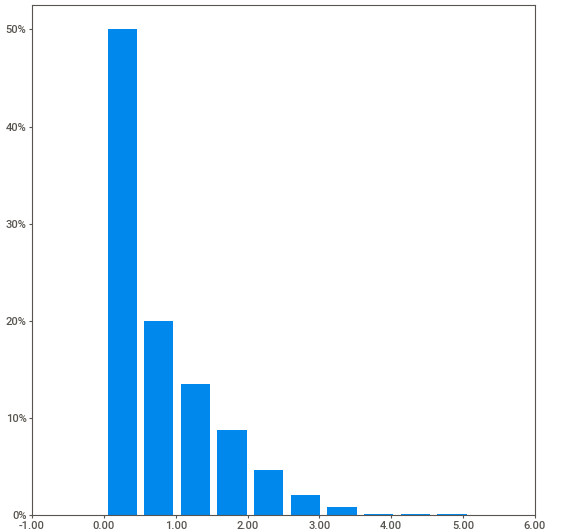
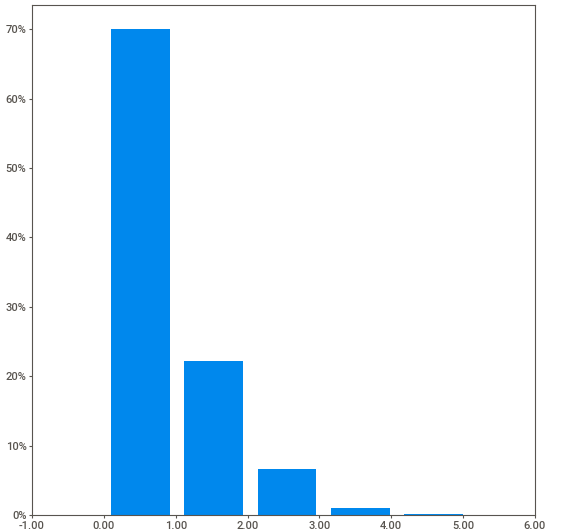
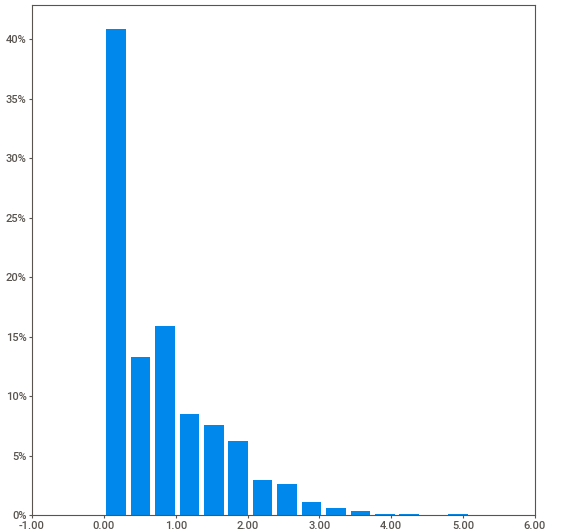
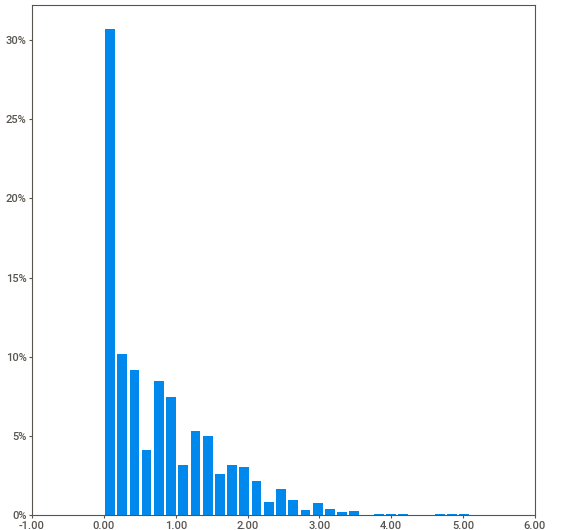
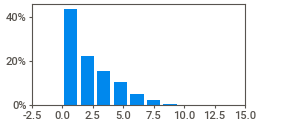
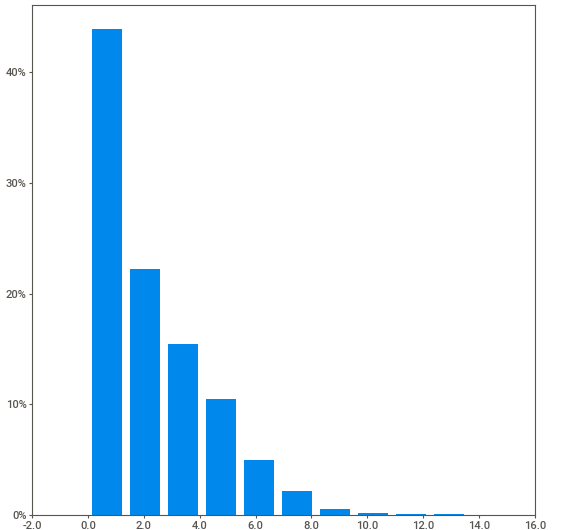
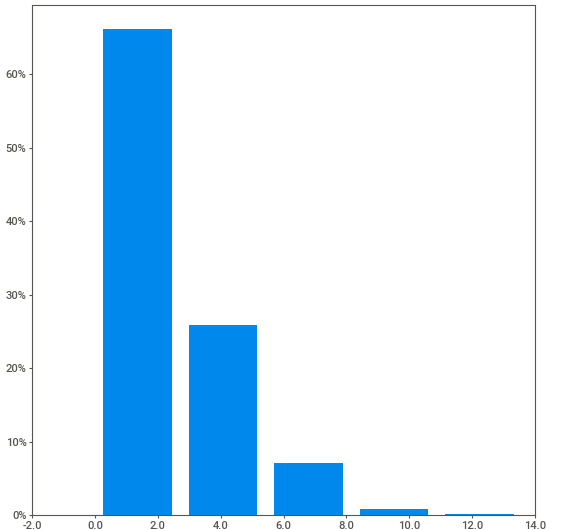
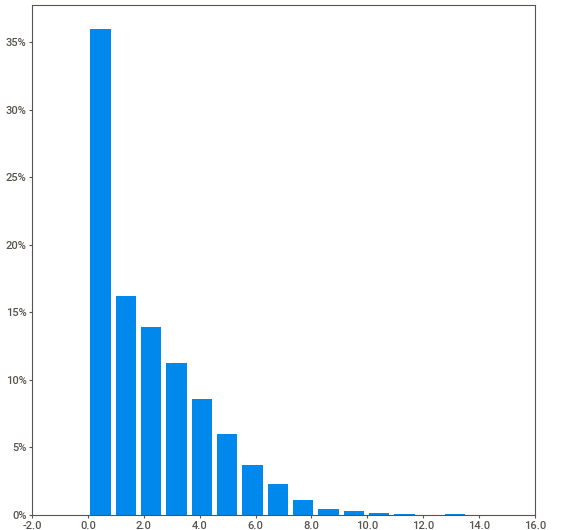
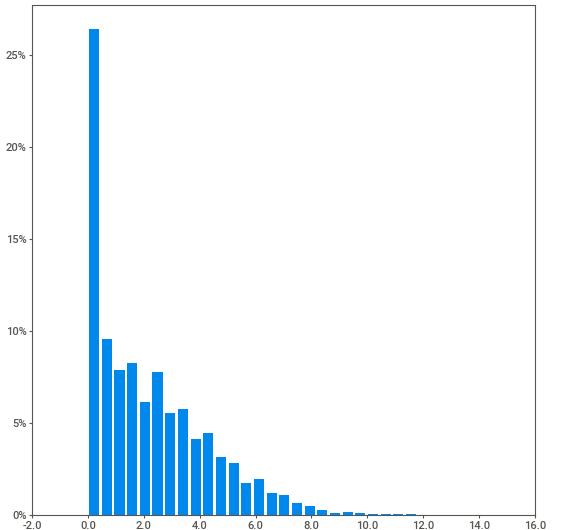
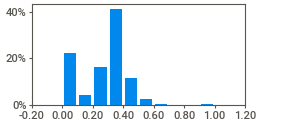
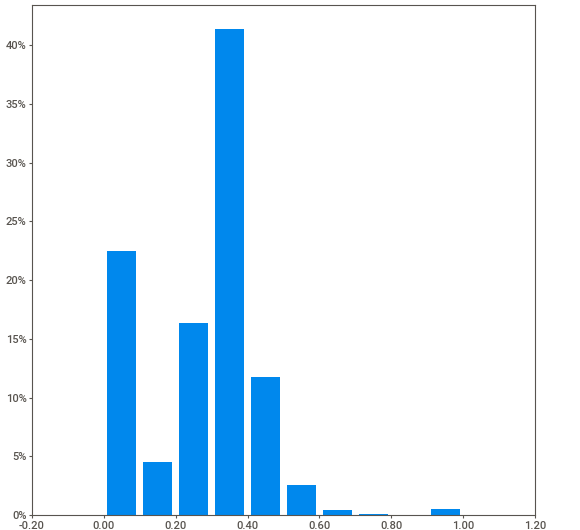
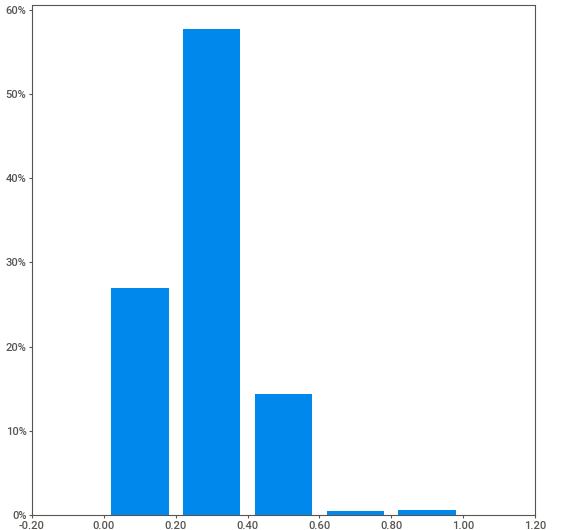
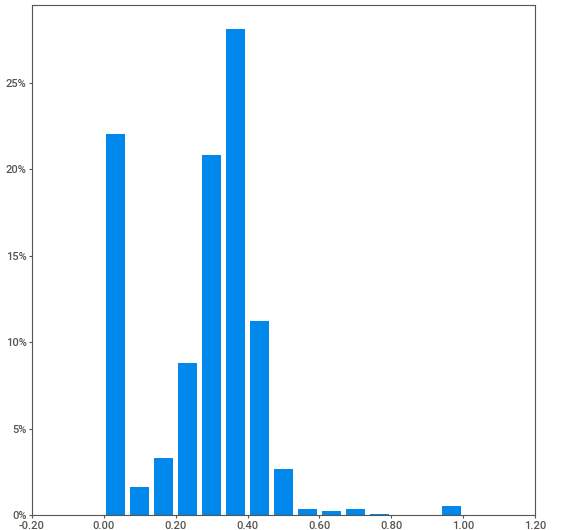
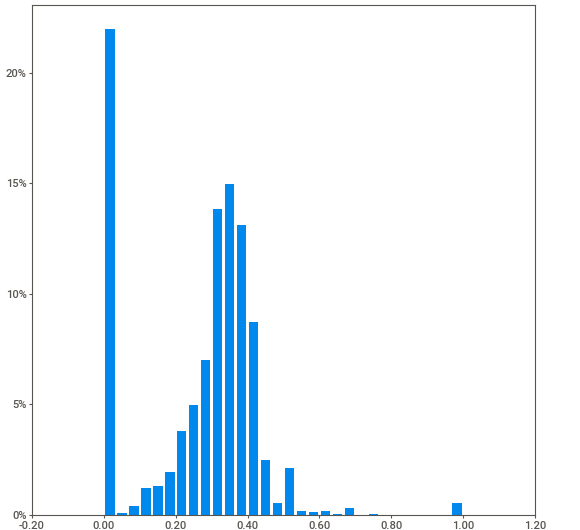
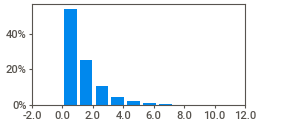
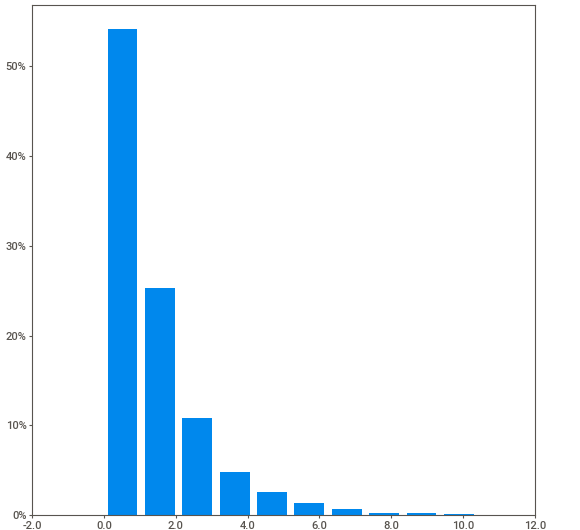
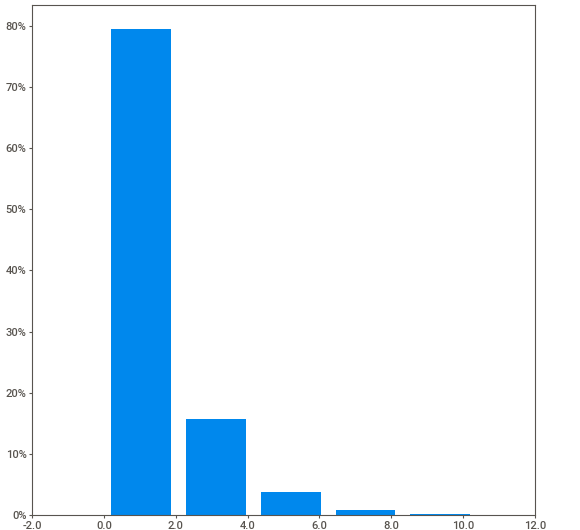
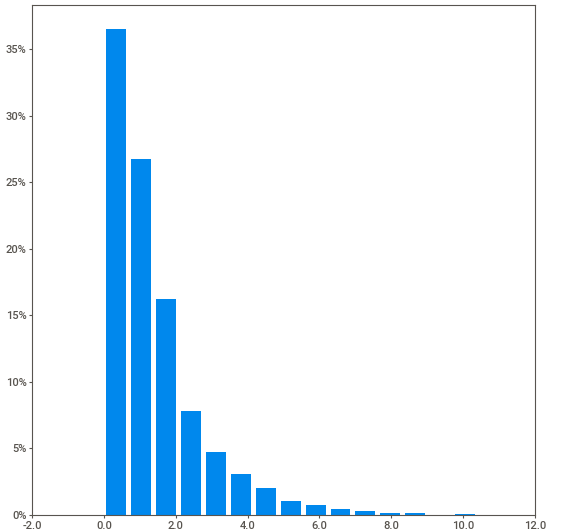
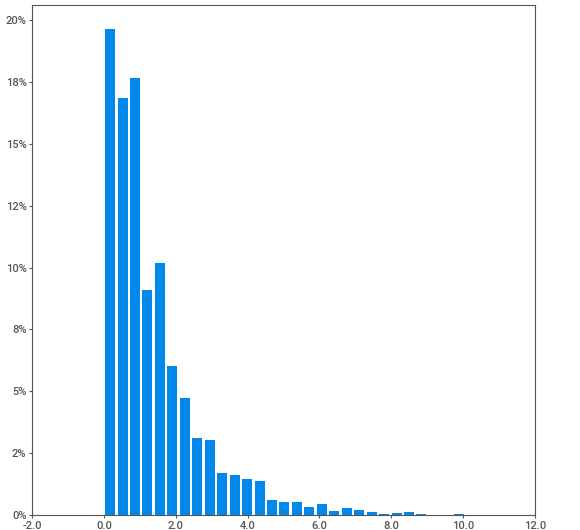
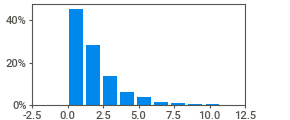
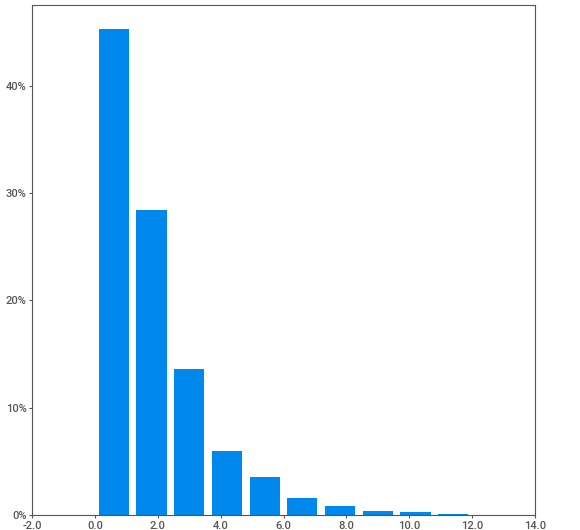
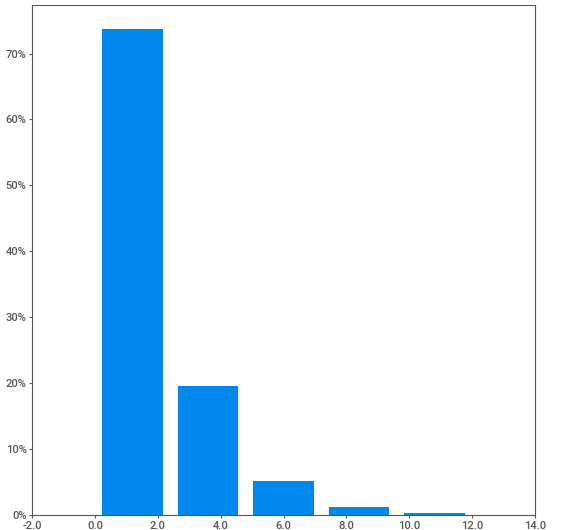
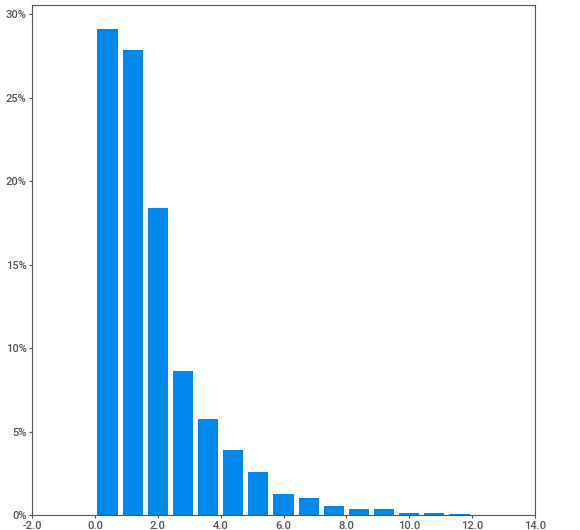
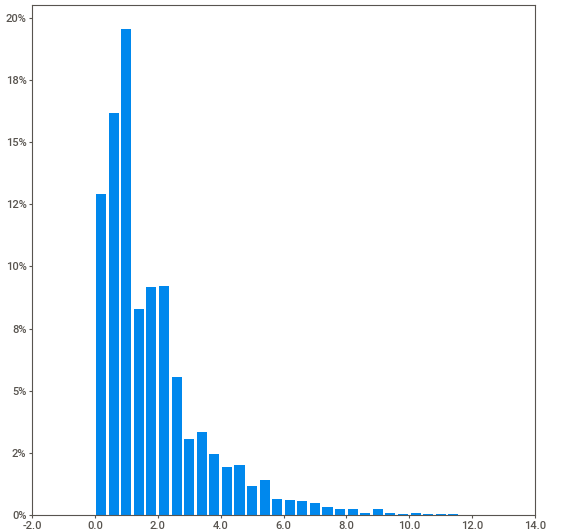
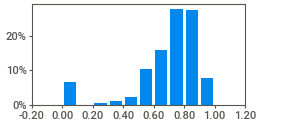
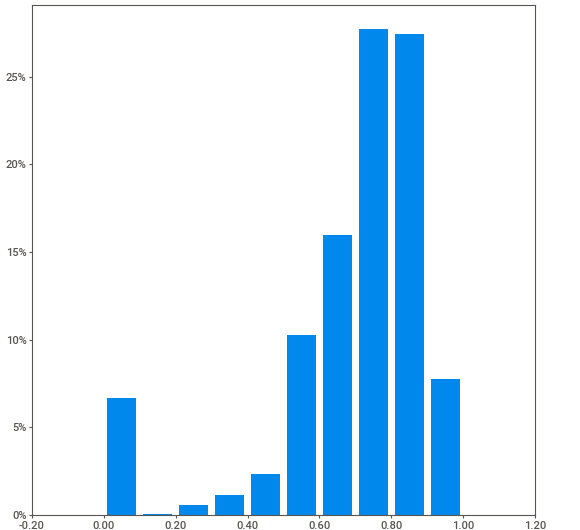
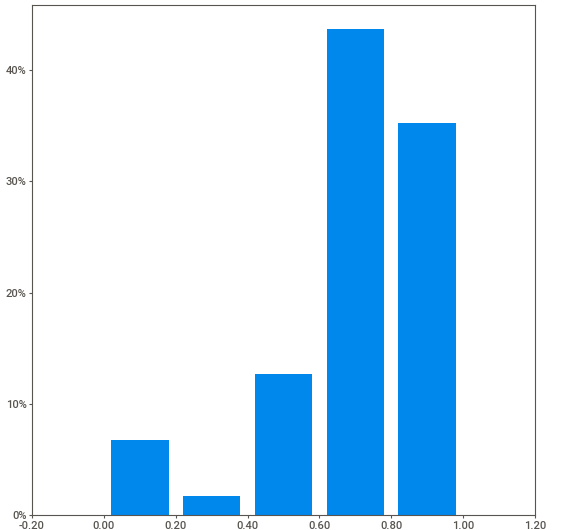
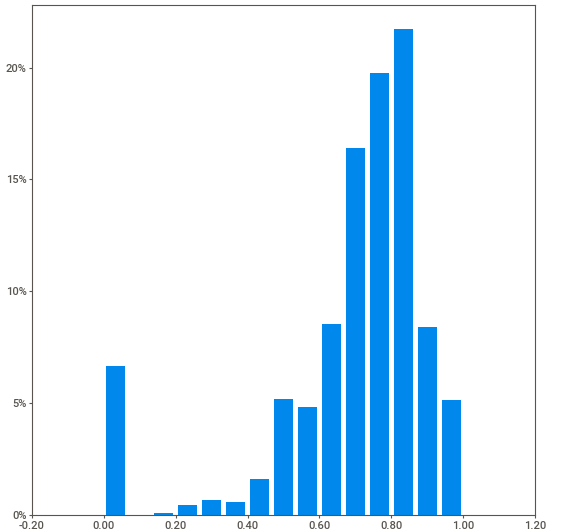
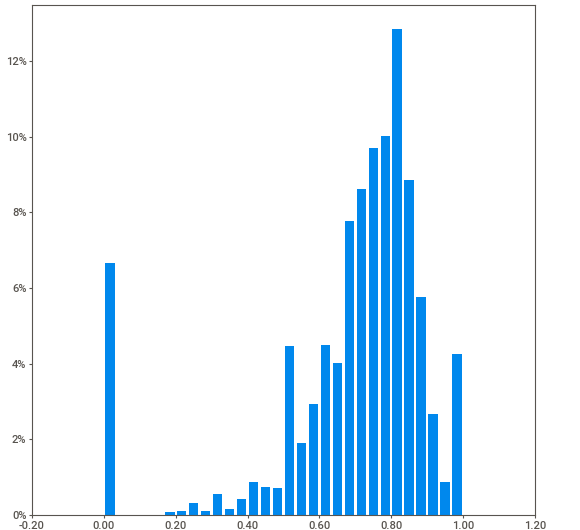
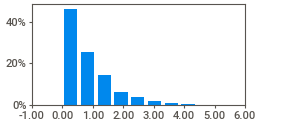
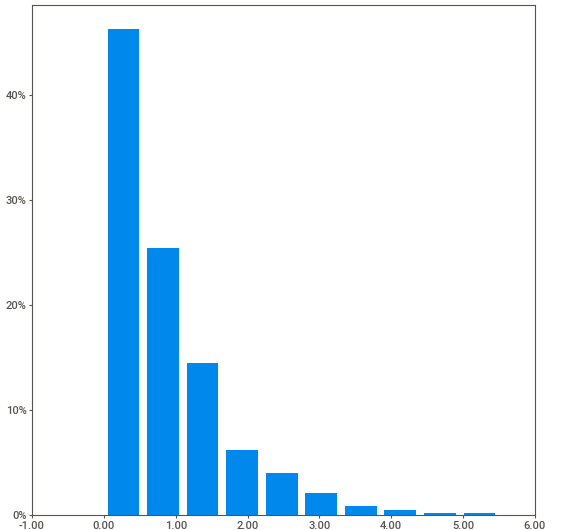
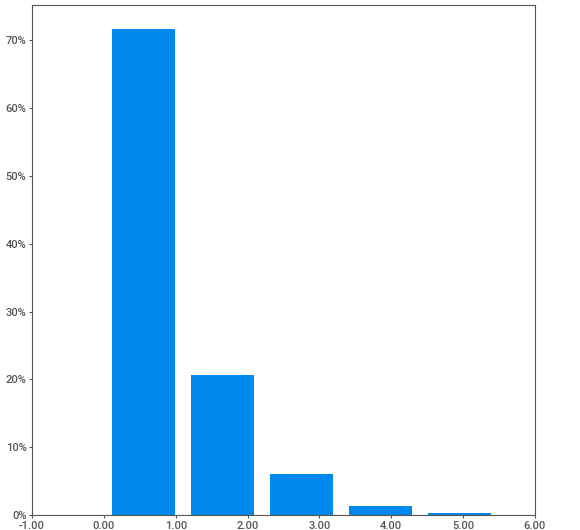
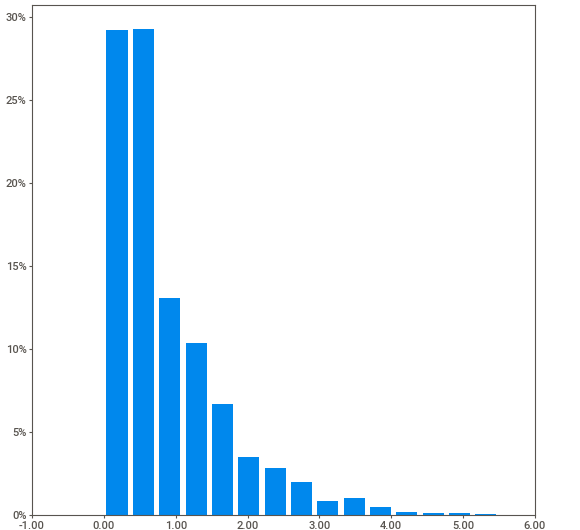
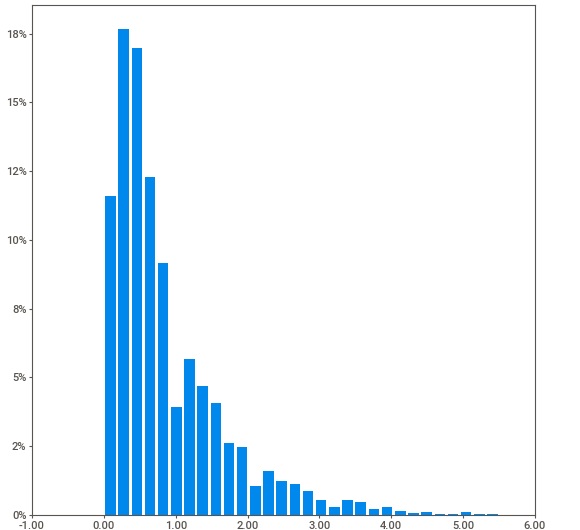
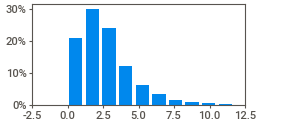
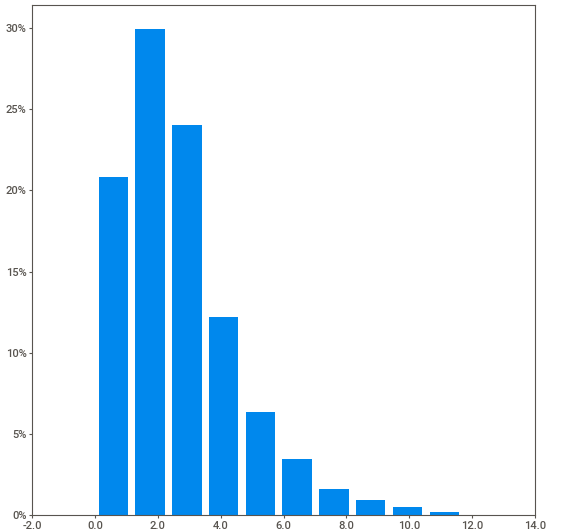
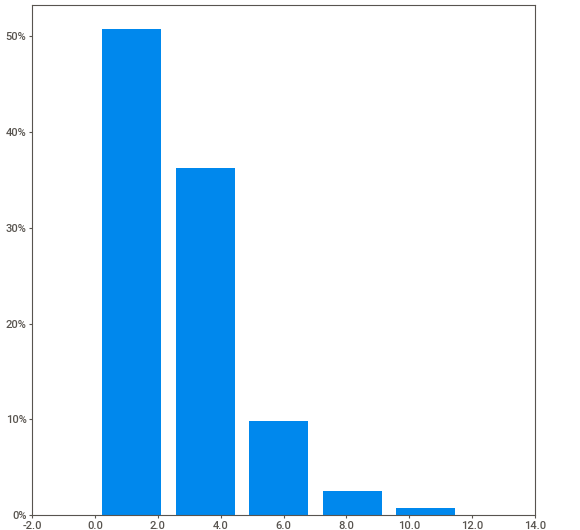
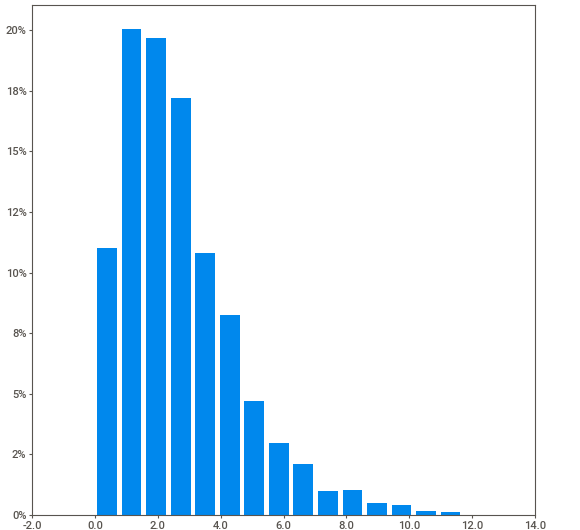
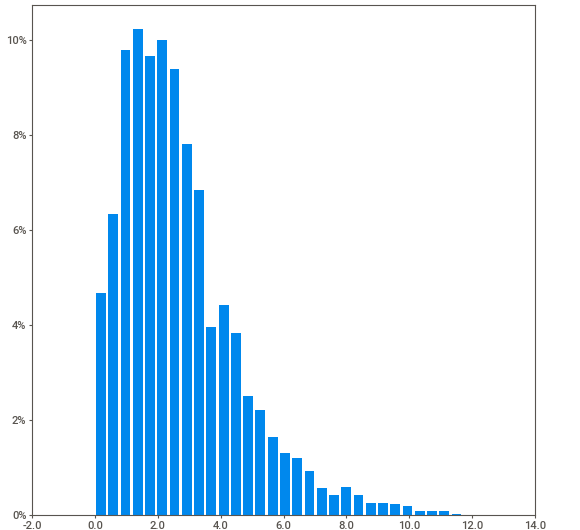
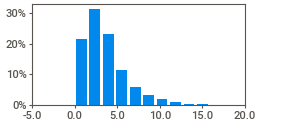
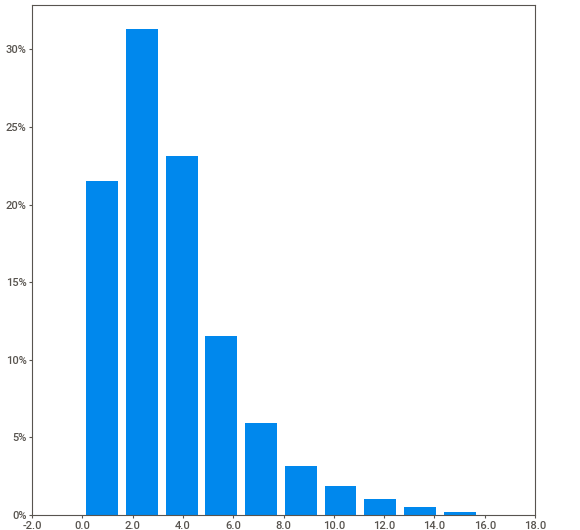
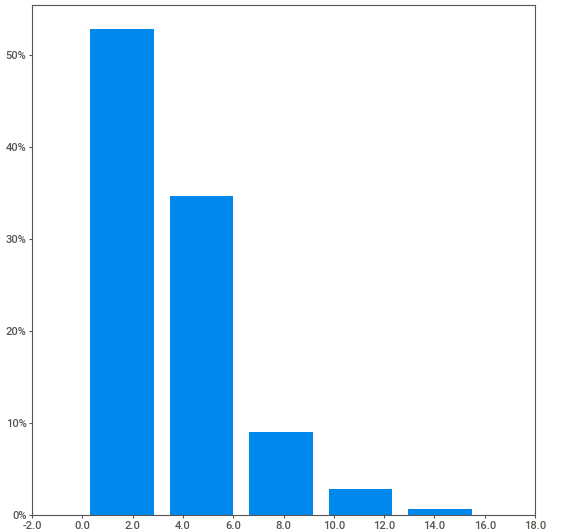
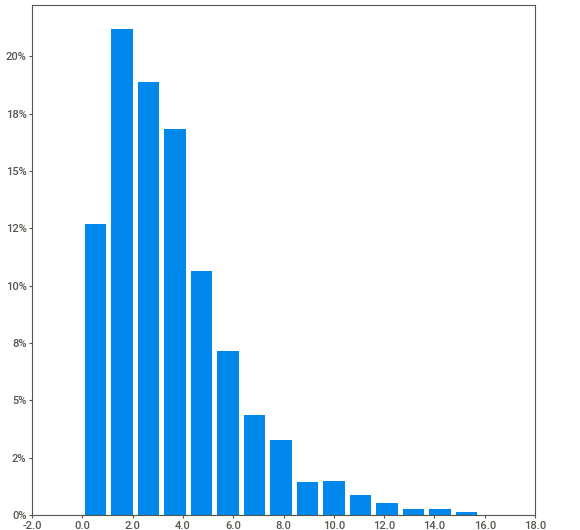
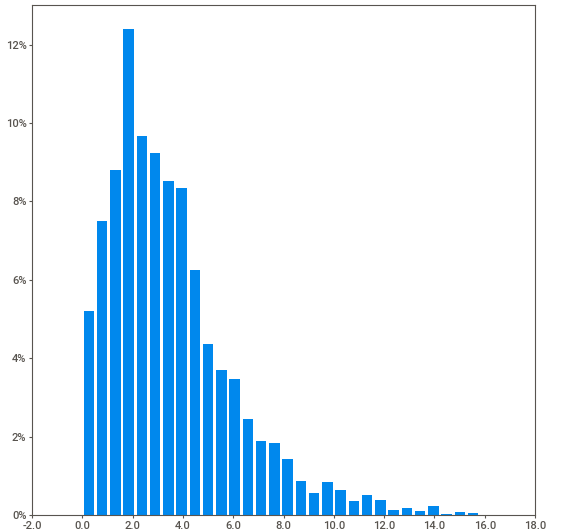
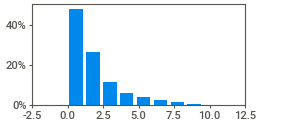
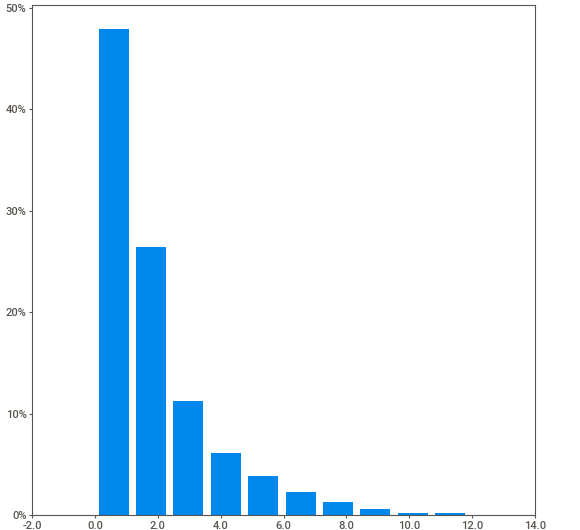
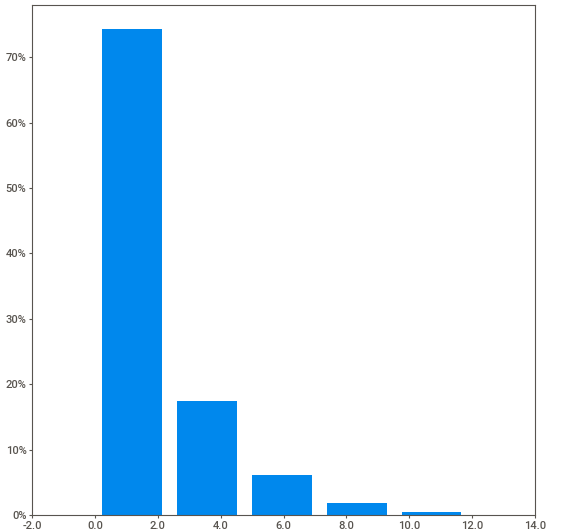
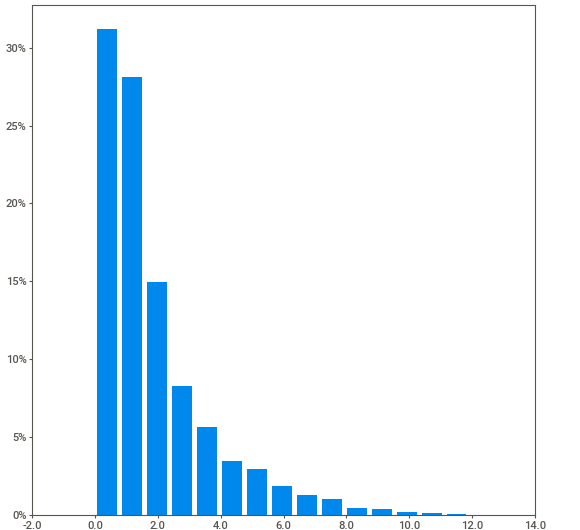
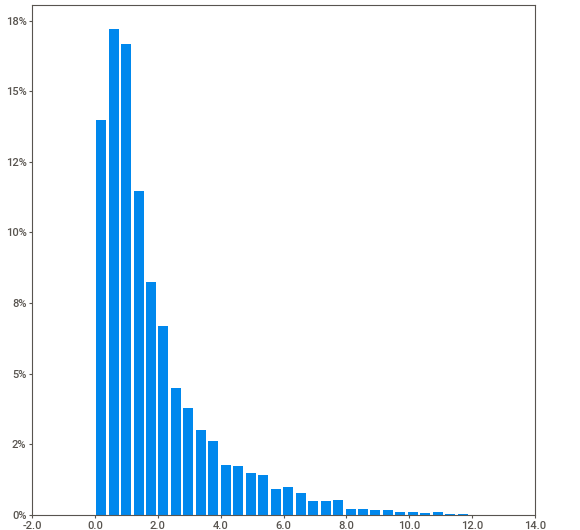
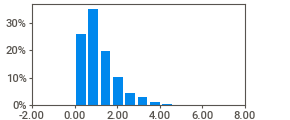
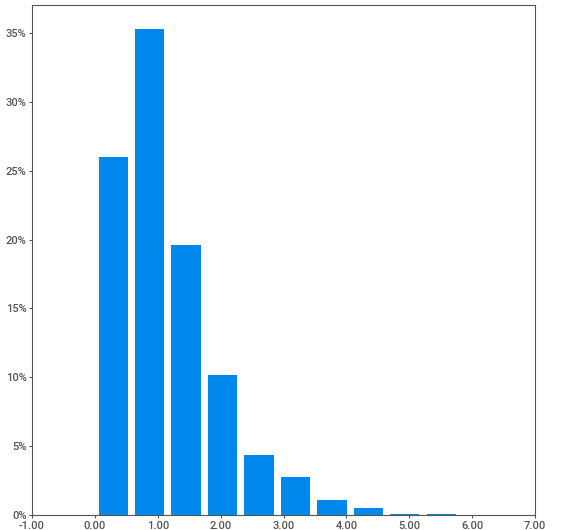
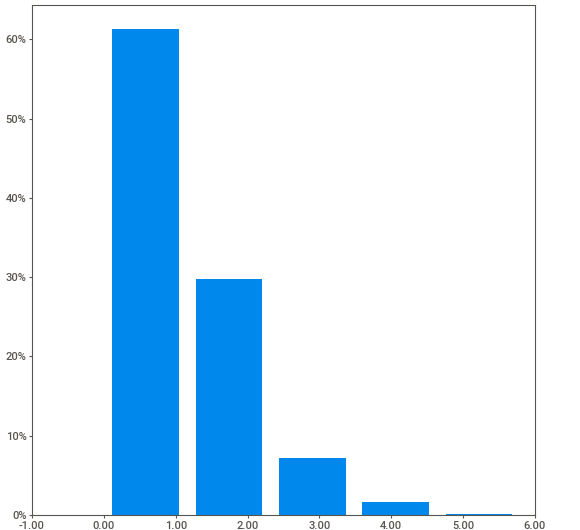
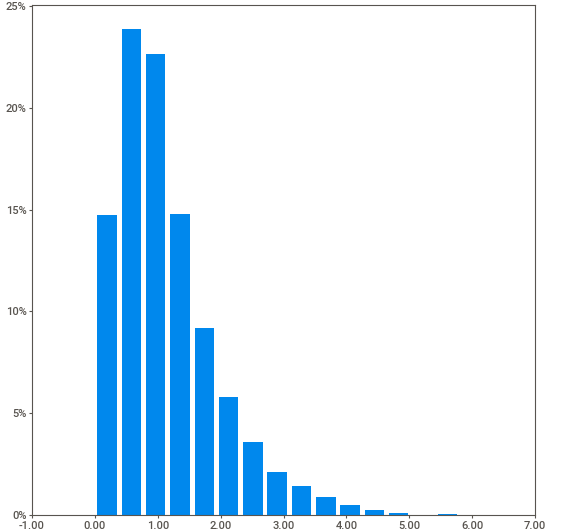
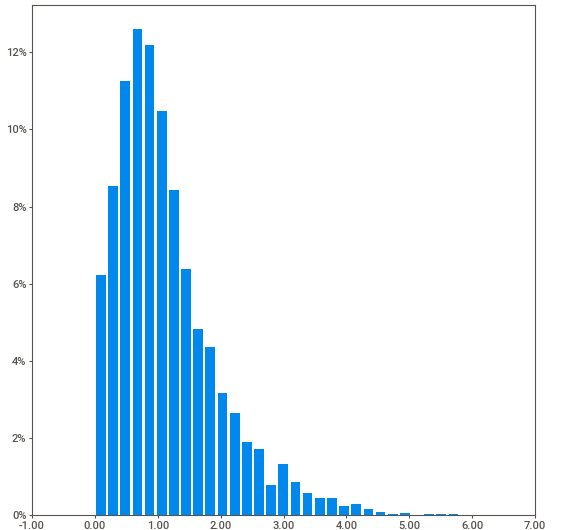
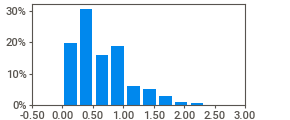
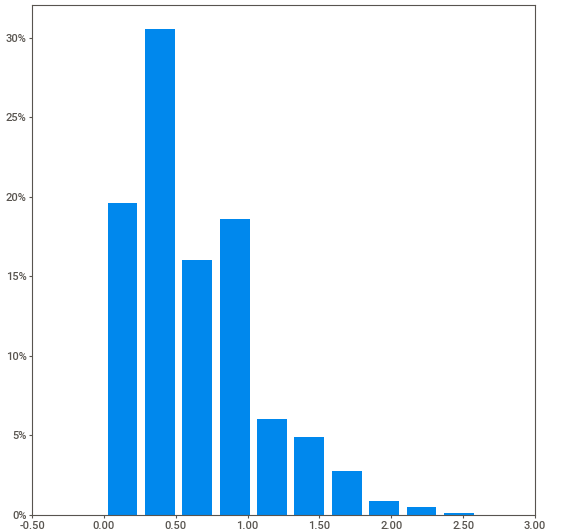
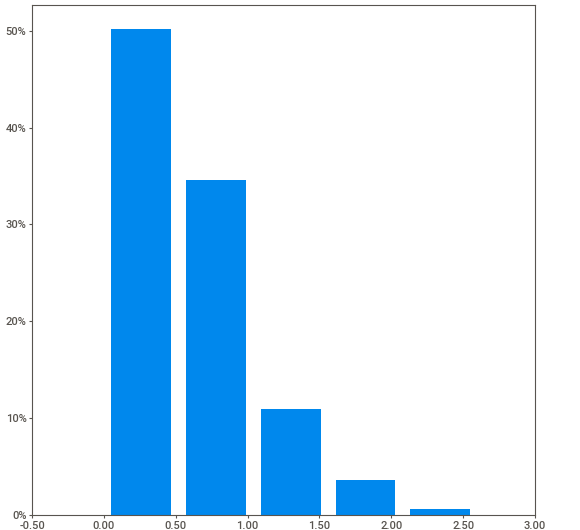
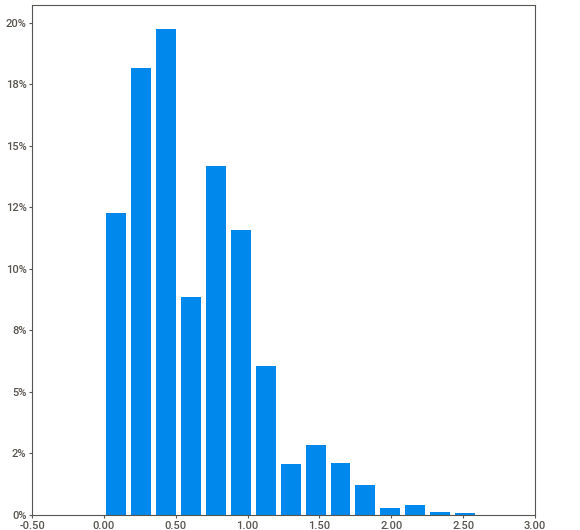
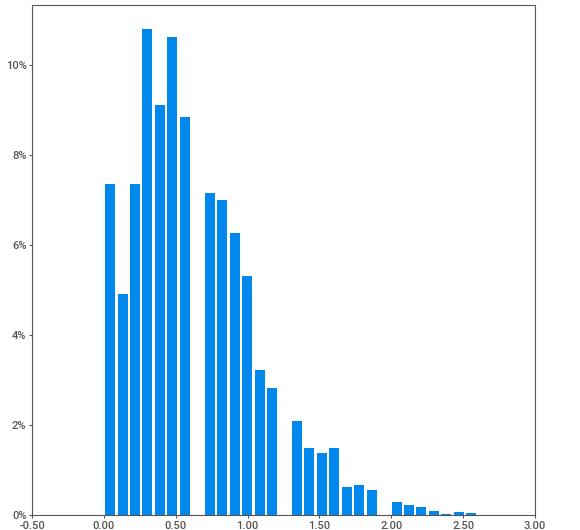
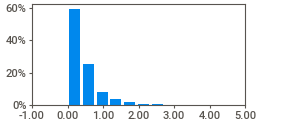
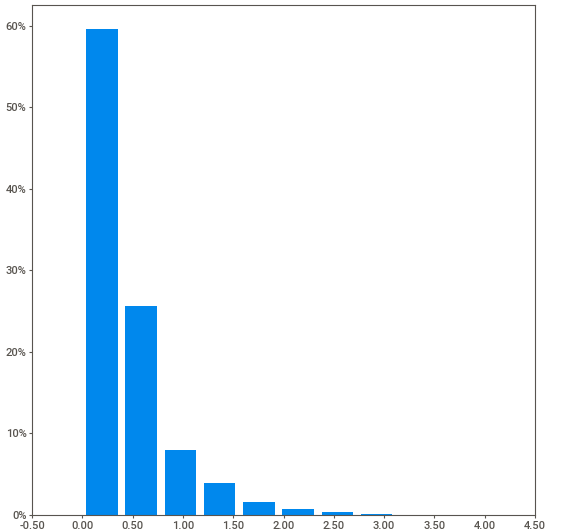
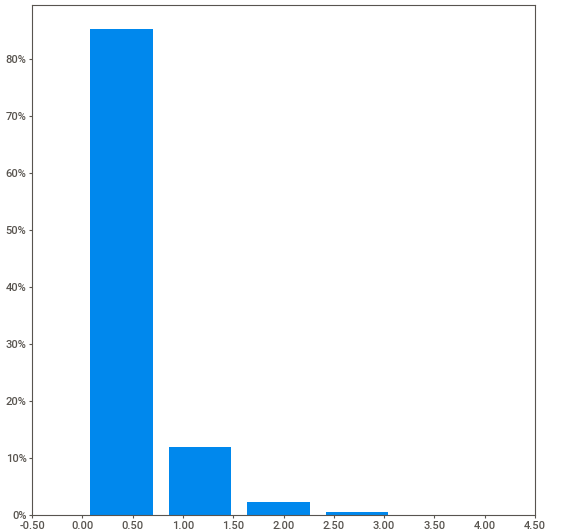
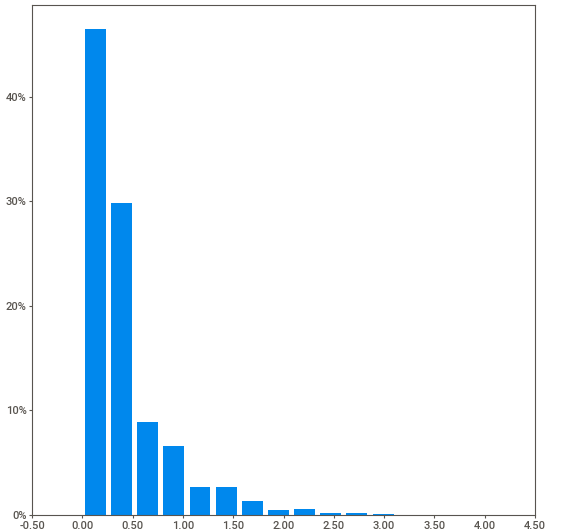
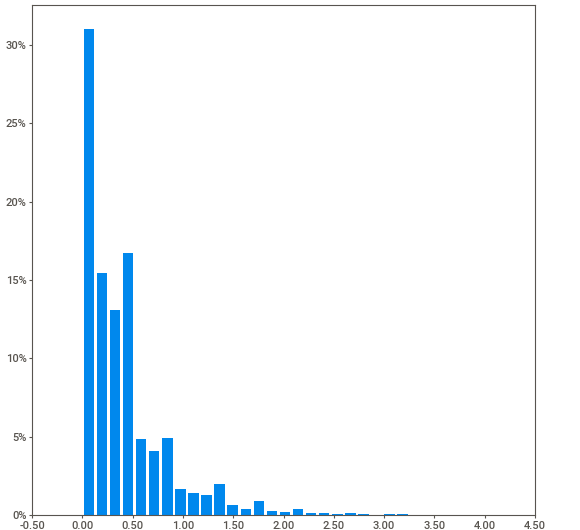
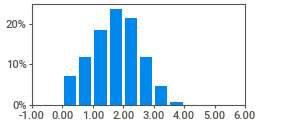
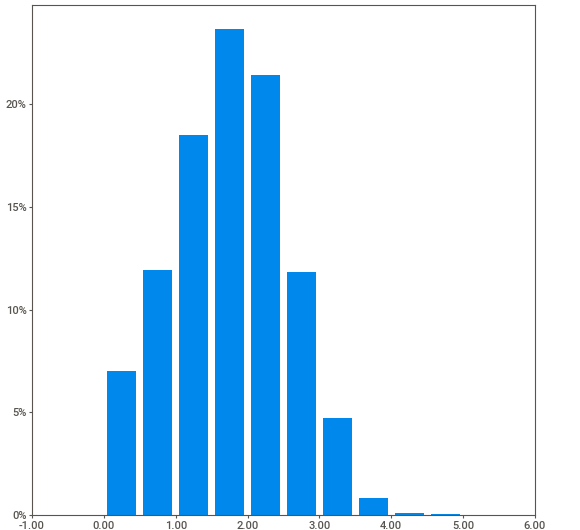
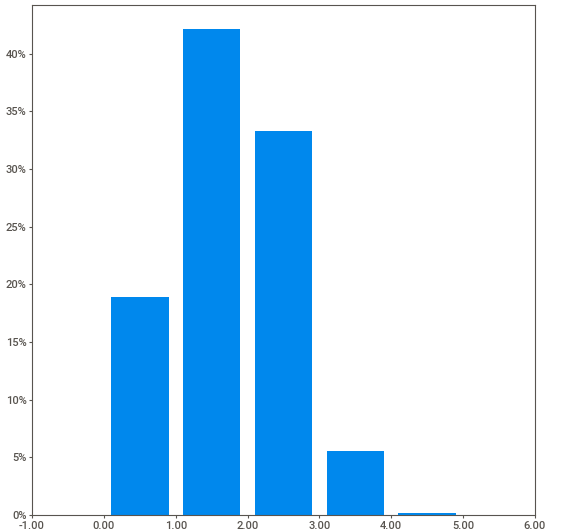
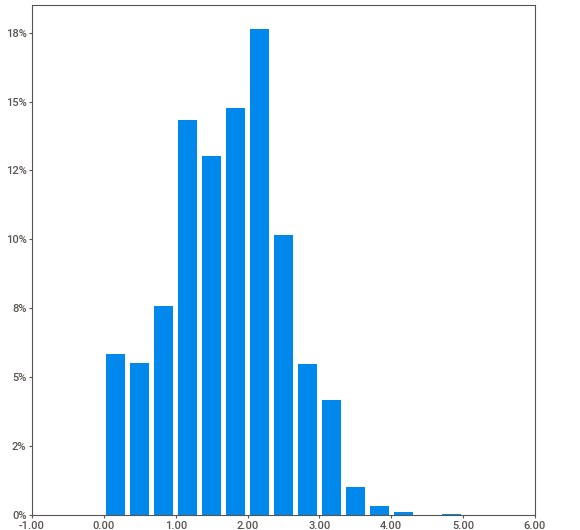
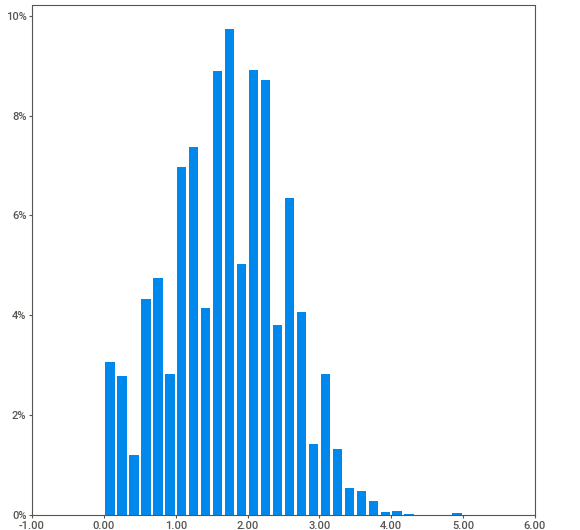
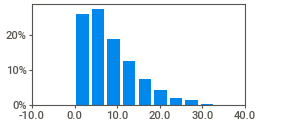
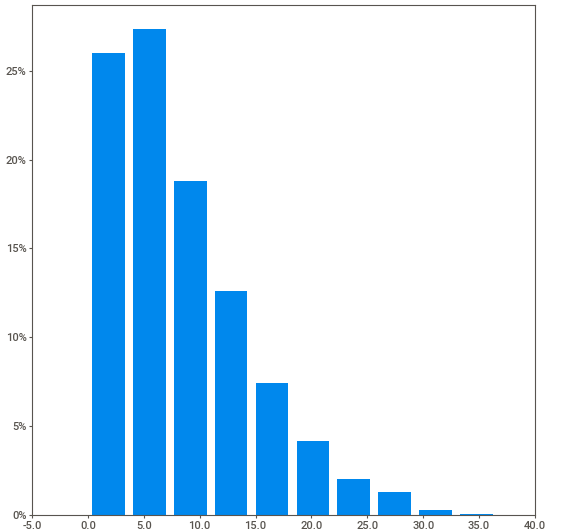
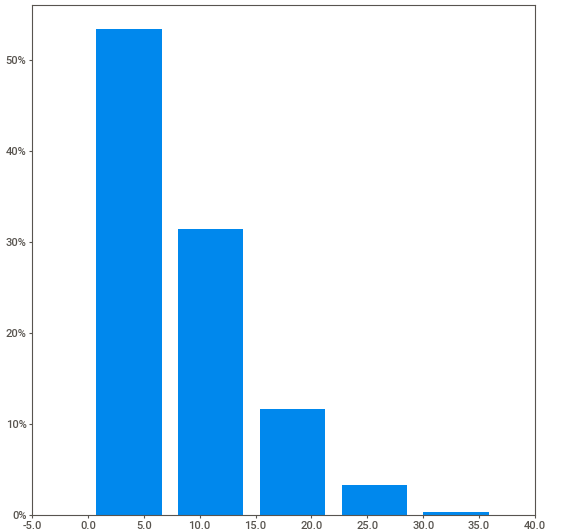
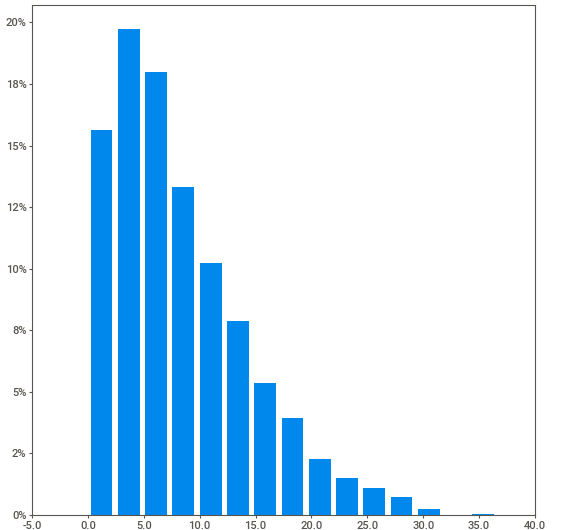
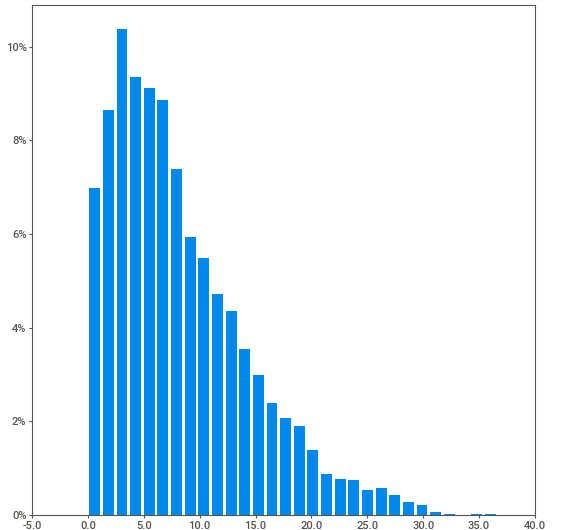
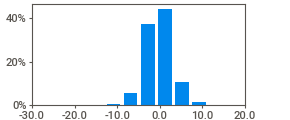
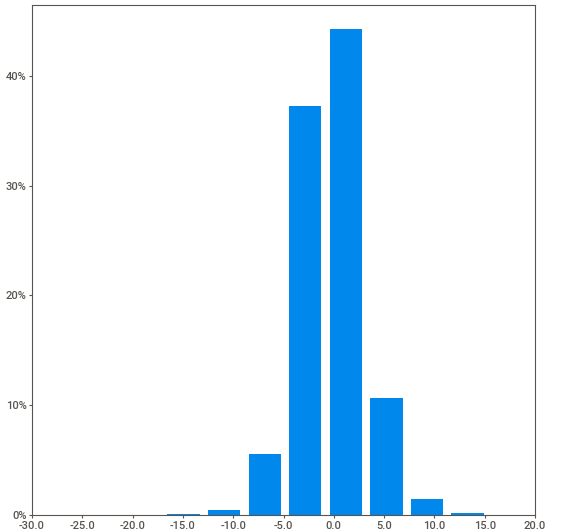
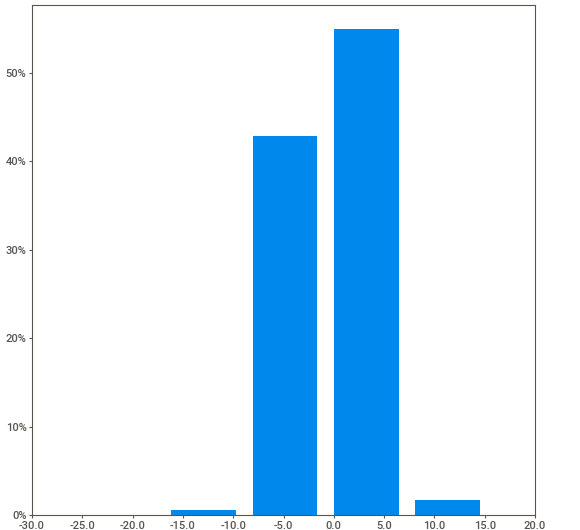
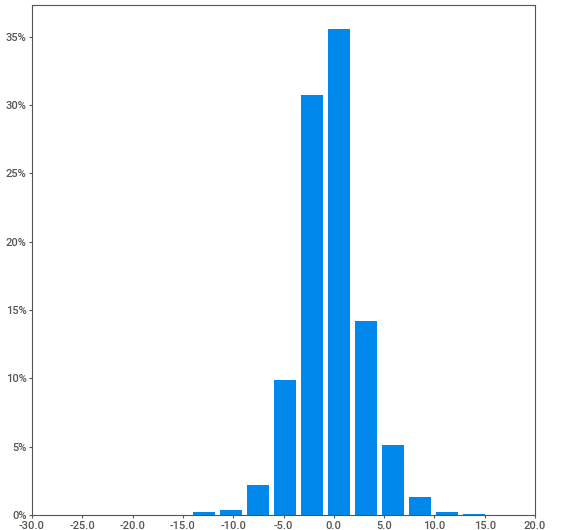
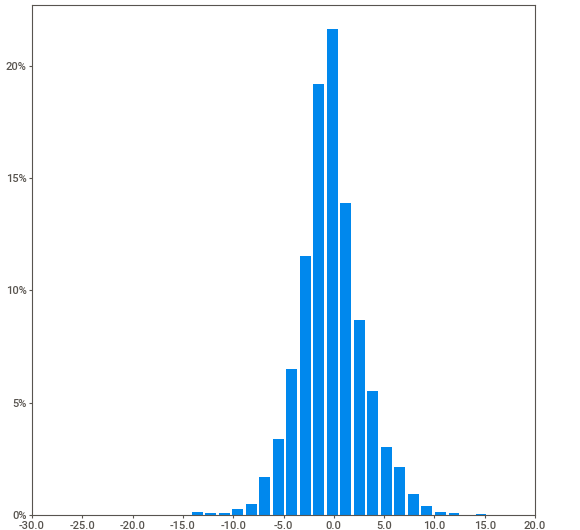
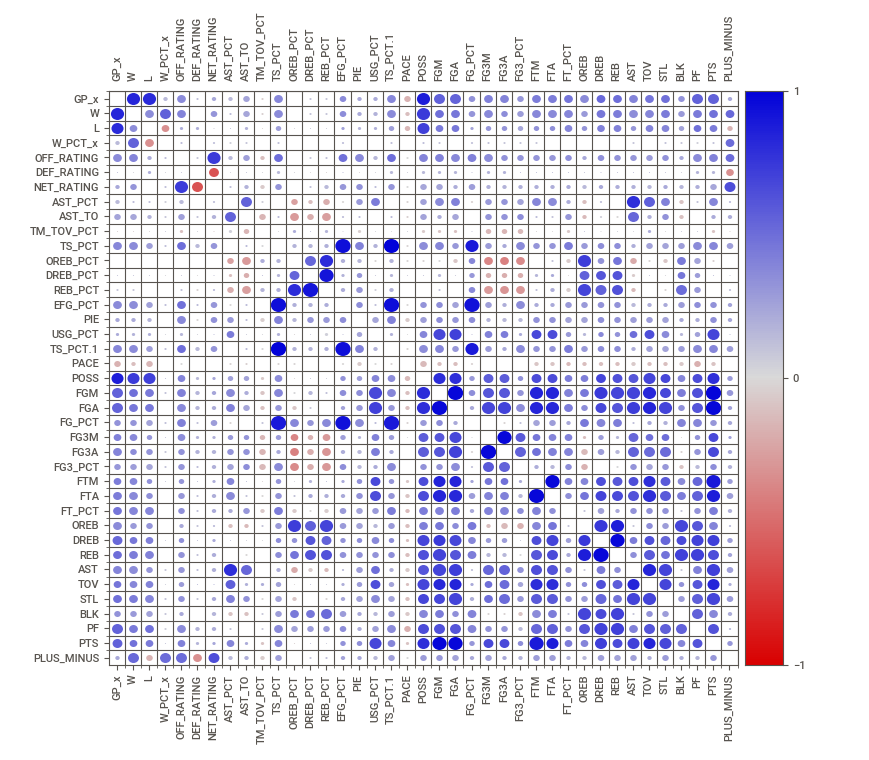
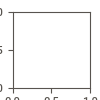

In [ ]:
#analyzing the dataset
cont_report = sv.analyze(continous)
#display the report
cont_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


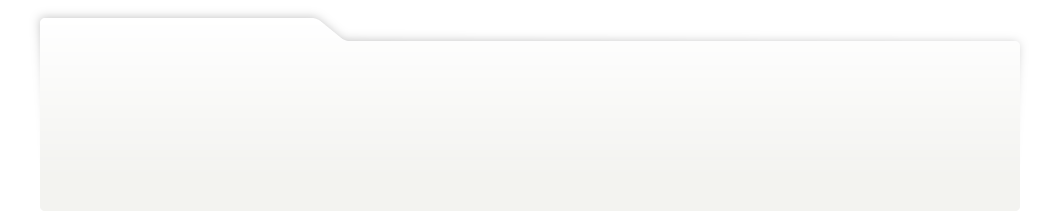
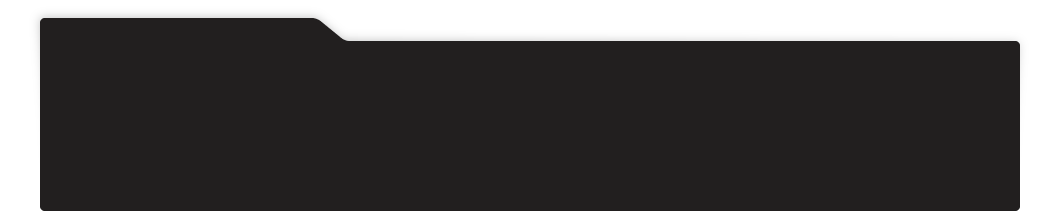
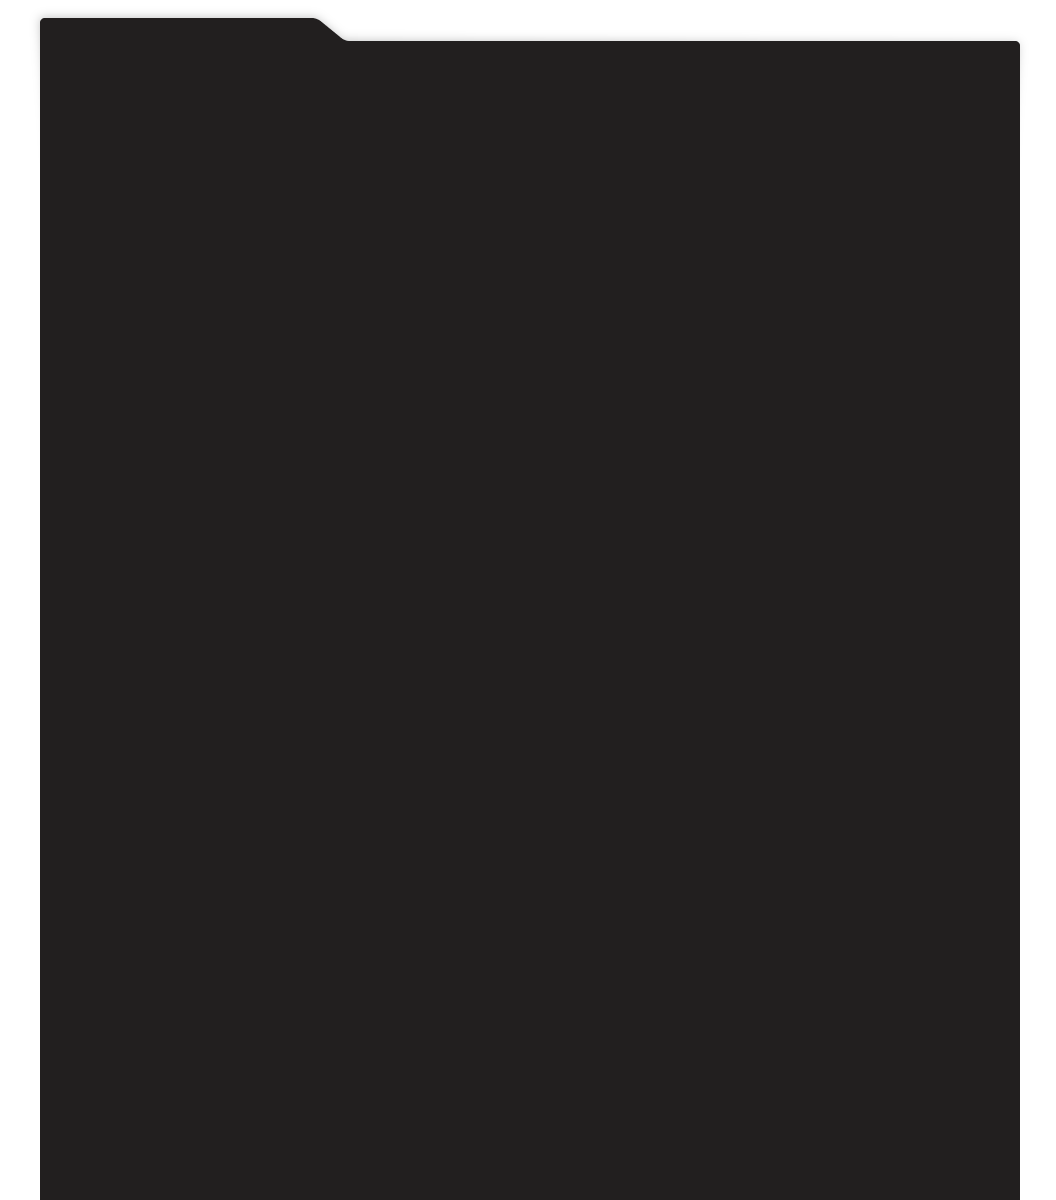
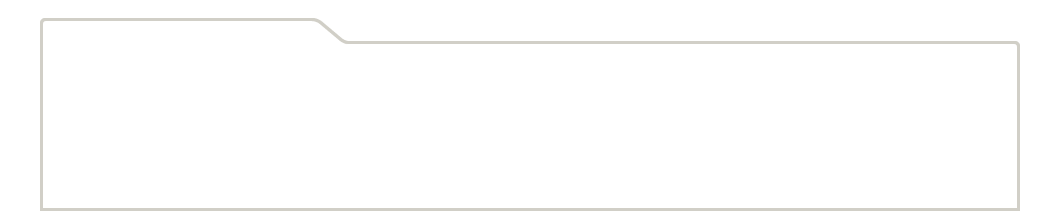
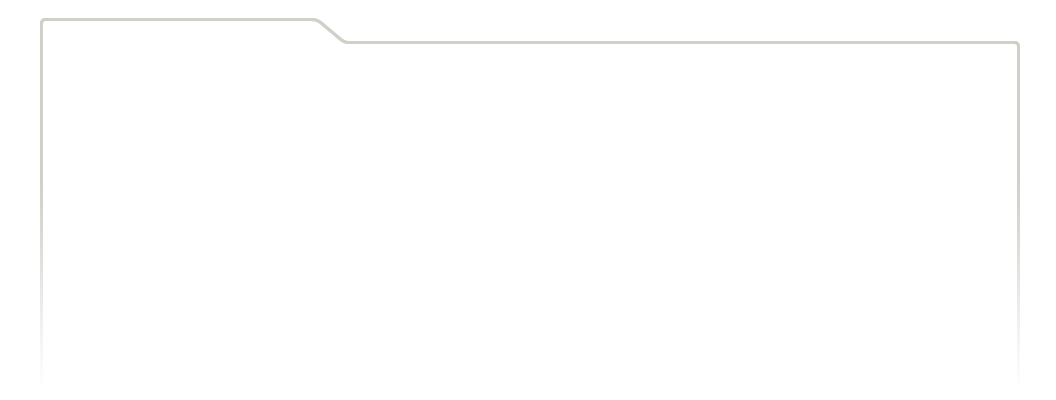
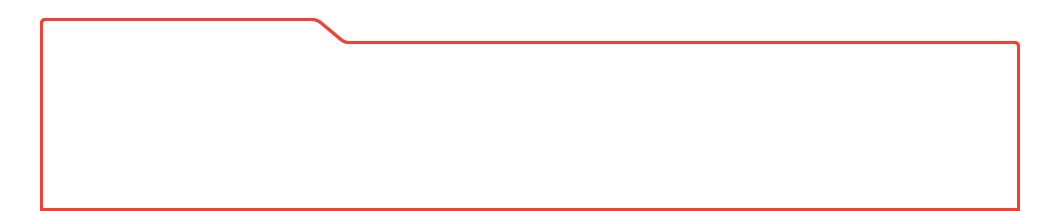
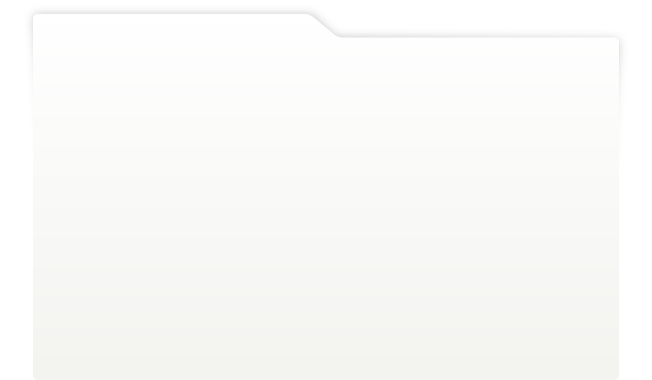
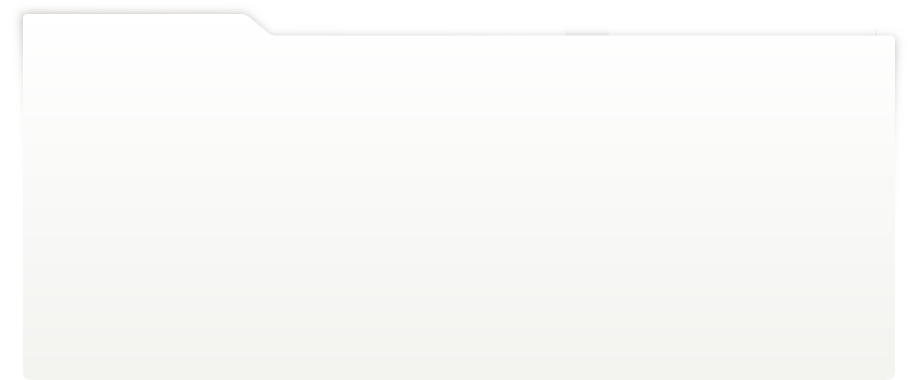
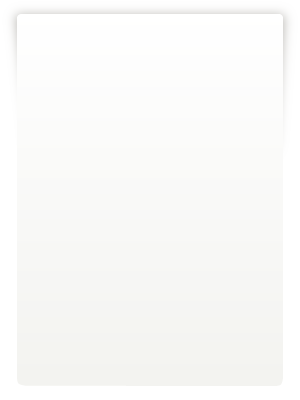
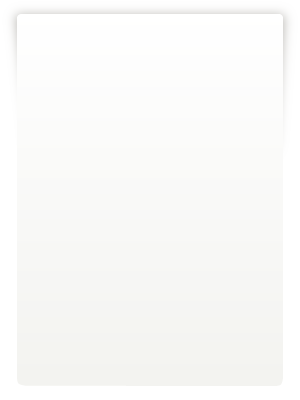
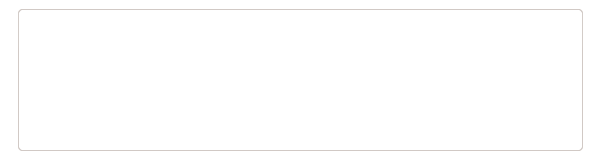
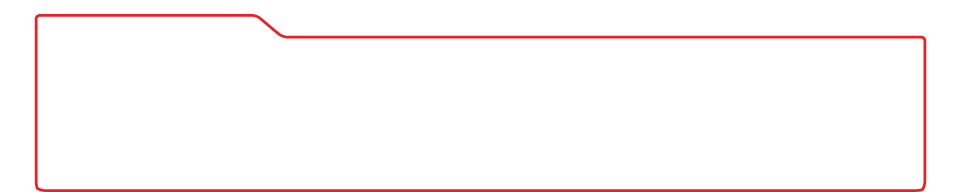
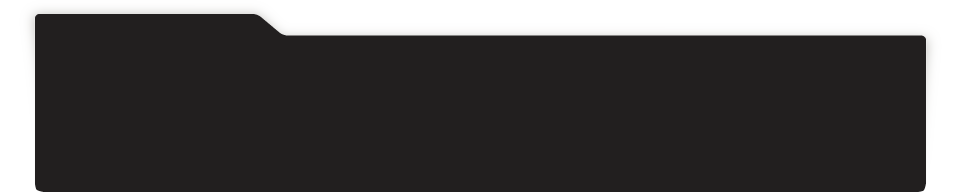
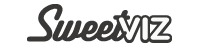
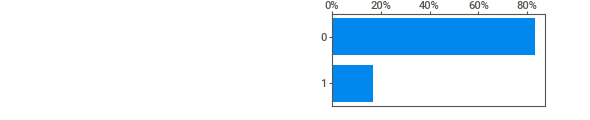
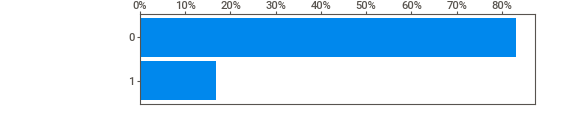
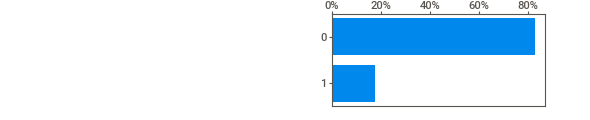
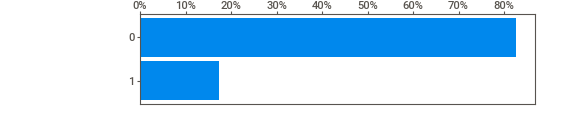
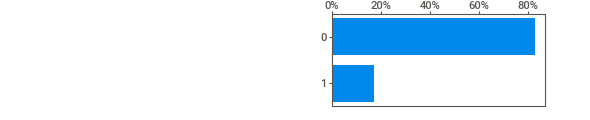
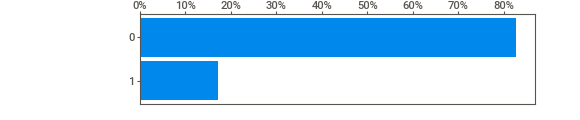
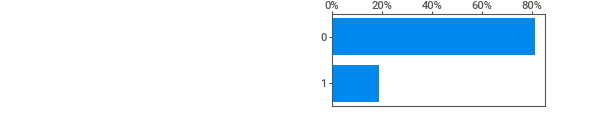
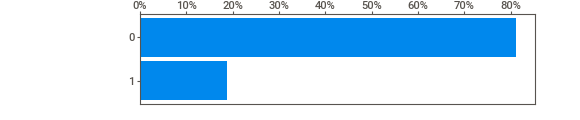
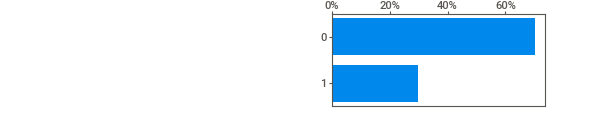
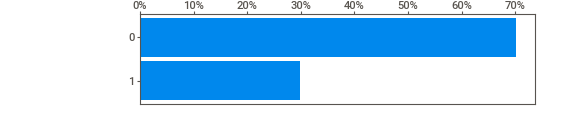
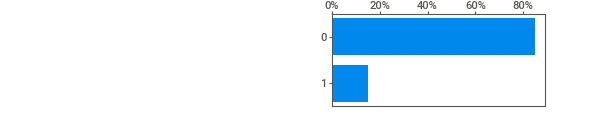
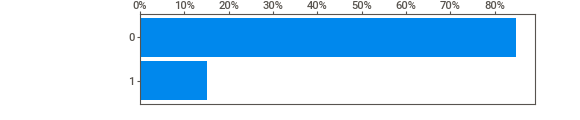
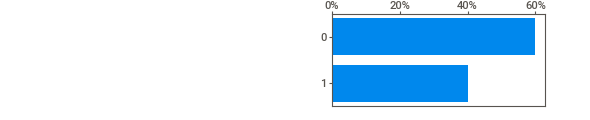
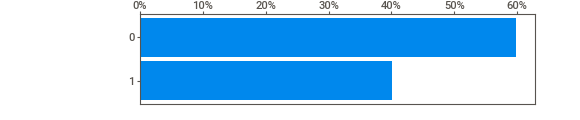
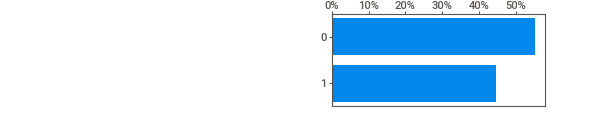
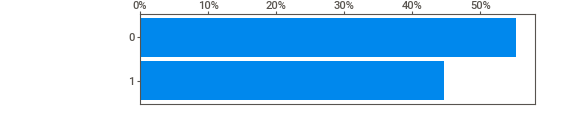
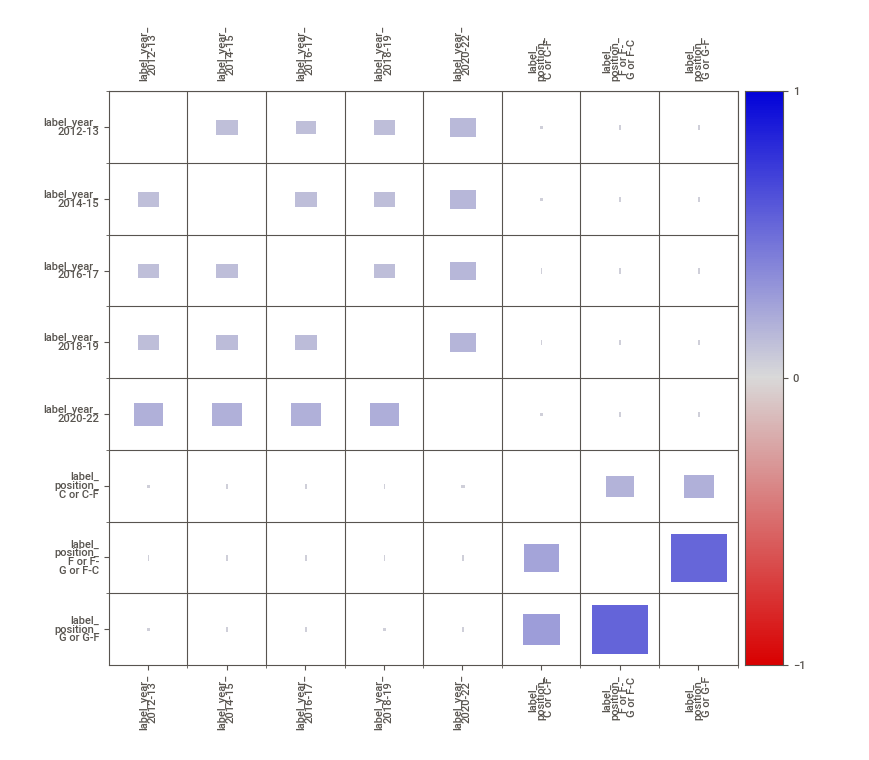
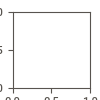

In [ ]:
#analyzing the dataset
Discrete_report = sv.analyze(categorical)
#display the report
Discrete_report.show_notebook()

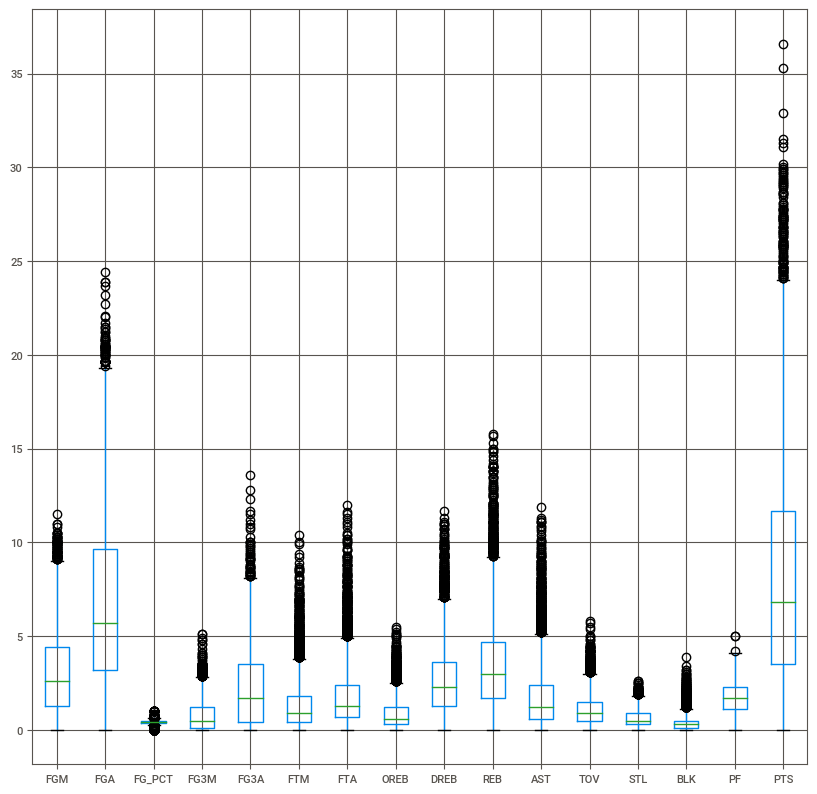

In [ ]:
continous[['FGM',	'FGA',	'FG_PCT',	'FG3M',	'FG3A',	'FTM',	'FTA', 'OREB',	'DREB',	'REB',	'AST',	'TOV',	'STL',	'BLK',	'PF',	'PTS'	]].boxplot(figsize=(10,10))

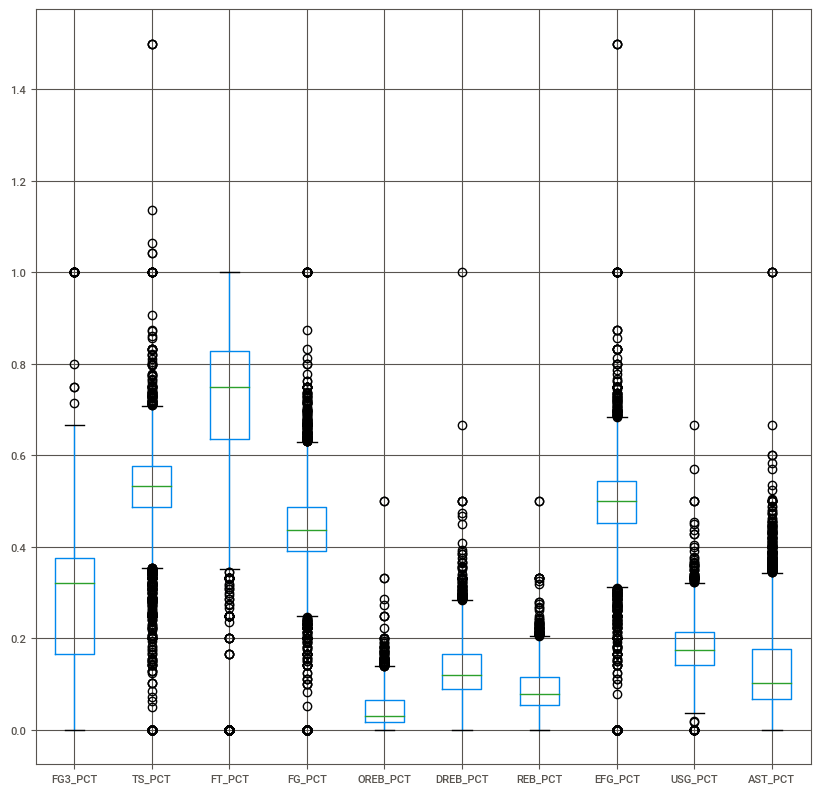

In [ ]:
continous[['FG3_PCT','TS_PCT', 'FT_PCT','FG_PCT', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'EFG_PCT', 'USG_PCT','AST_PCT']].boxplot(figsize=(10,10))

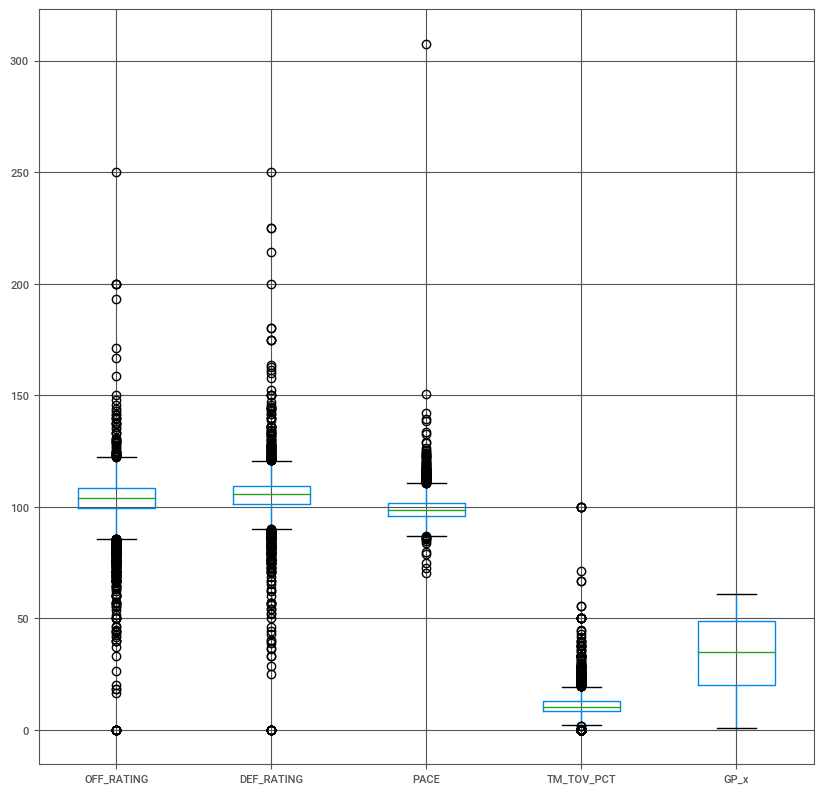

In [ ]:
continous[['OFF_RATING','DEF_RATING','PACE', 'TM_TOV_PCT','GP_x']].boxplot(figsize=(10,10))

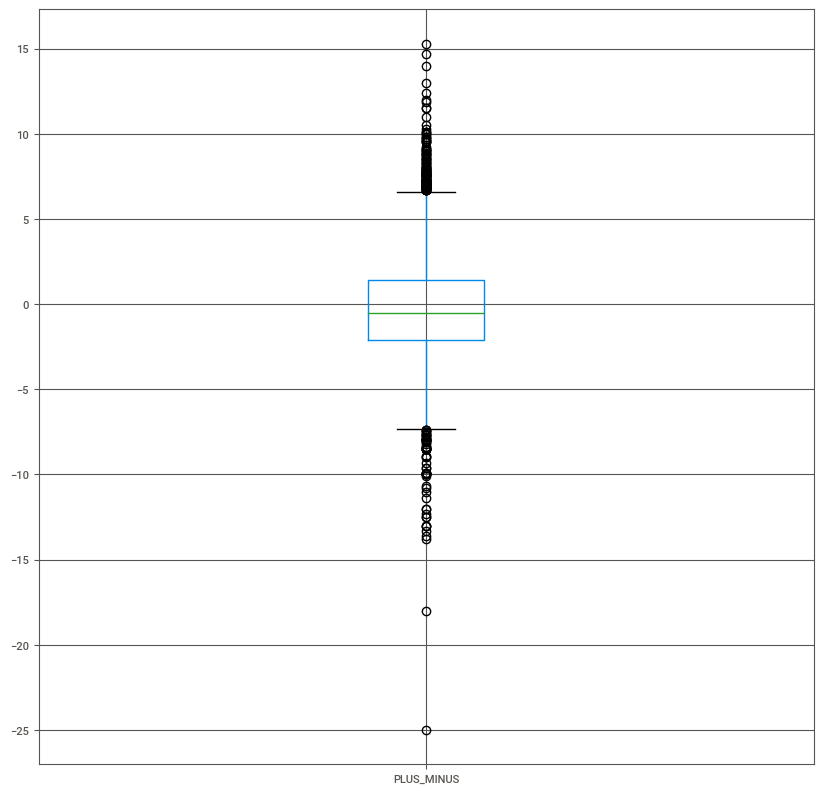

In [ ]:
continous[['PLUS_MINUS']].boxplot(figsize=(10,10))

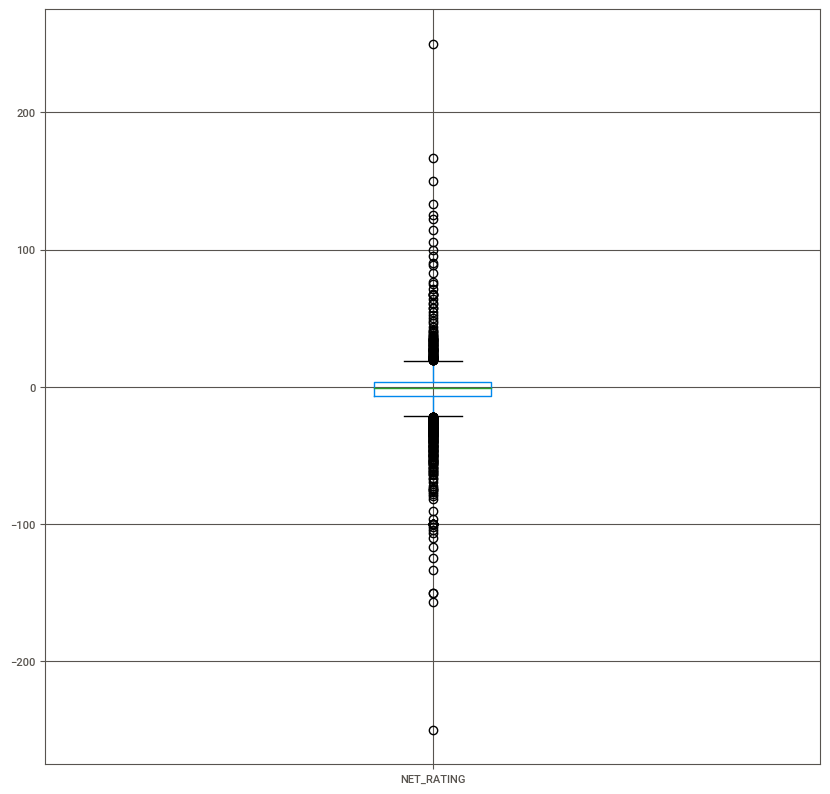

In [ ]:
continous[['NET_RATING']].boxplot(figsize=(10,10))

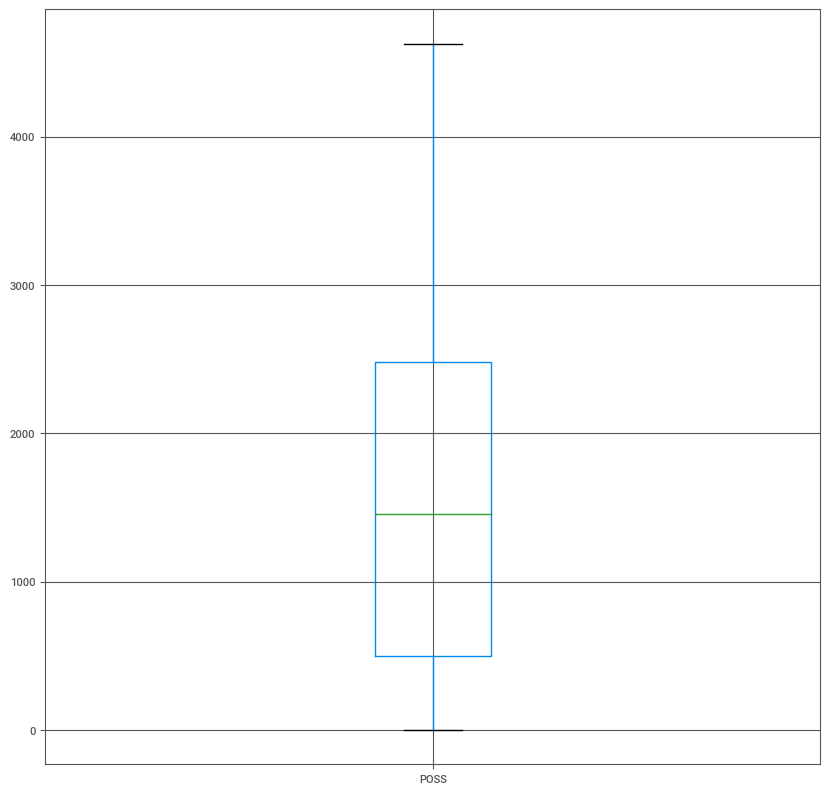

In [ ]:
continous[['POSS']].boxplot(figsize=(10,10))

#Preprocessing 

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from scipy import stats as stats


##Functions


In [ ]:
# remove outliers

def iqrdf(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        iqr = Q3 - Q1
        s = 1.5*iqr
        l_bound = Q1 - s
        u_bound = Q3 + s
        df.loc[df[col] > u_bound,col] = u_bound
        df.loc[df[col] < l_bound,col] = l_bound
    return df

In [ ]:
# Powertransform


def pt_yeo(df):
    headers = list(df)
    pt = PowerTransformer(method='yeo-johnson', standardize=False)
    df = pt.fit_transform(df)
    df = pd.DataFrame(df)
    nums = df.columns
    rename_cols = dict(zip(nums, headers))
    df = df.rename(columns=rename_cols)
    return df

In [ ]:
# Standardize data

def standard(df):
    scaler = StandardScaler()
    df_scale = scaler.fit_transform(df)
    #ind=df.index
    cols = df.columns
    df_scale = pd.DataFrame(df_scale, index=df.index, columns=cols) #(df_scale, index=ind, columns=cols)
    return df_scale

In [ ]:
# Minmax scaler to normalize between 1 and 0

def minmax(df):
    headers = list(df)
    s_scaler = MinMaxScaler()
    scaled = s_scaler.fit_transform(df)
    df = pd.DataFrame(scaled)
    nums = df.columns
    rename_cols = dict(zip(nums, headers))
    df = df.rename(columns=rename_cols)
    return df

In [ ]:
continous.skew()

GP_x         -0.394436
W             0.347971
L             0.294222
W_PCT_x      -0.071874
OFF_RATING   -1.874287
DEF_RATING   -0.821853
NET_RATING   -0.721327
AST_PCT       1.715685
AST_TO        1.916691
TM_TOV_PCT    4.685550
TS_PCT       -1.314317
OREB_PCT      1.865798
DREB_PCT      1.409268
REB_PCT       1.158687
EFG_PCT      -0.967391
PIE          -8.716127
USG_PCT       0.633466
TS_PCT.1     -1.314317
PACE          9.679781
POSS          0.348272
FGM           0.923192
FGA           0.872285
FG_PCT       -0.522075
FG3M          1.207217
FG3A          1.041452
FG3_PCT      -0.121337
FTM           1.995377
FTA           1.845863
FT_PCT       -1.779708
OREB          1.737485
DREB          1.243433
REB           1.323583
AST           1.837952
TOV           1.280439
STL           0.907435
BLK           2.214351
PF           -0.032010
PTS           1.053463
PLUS_MINUS    0.093567
dtype: float64

In [ ]:
con_1 = pt_yeo(continous)

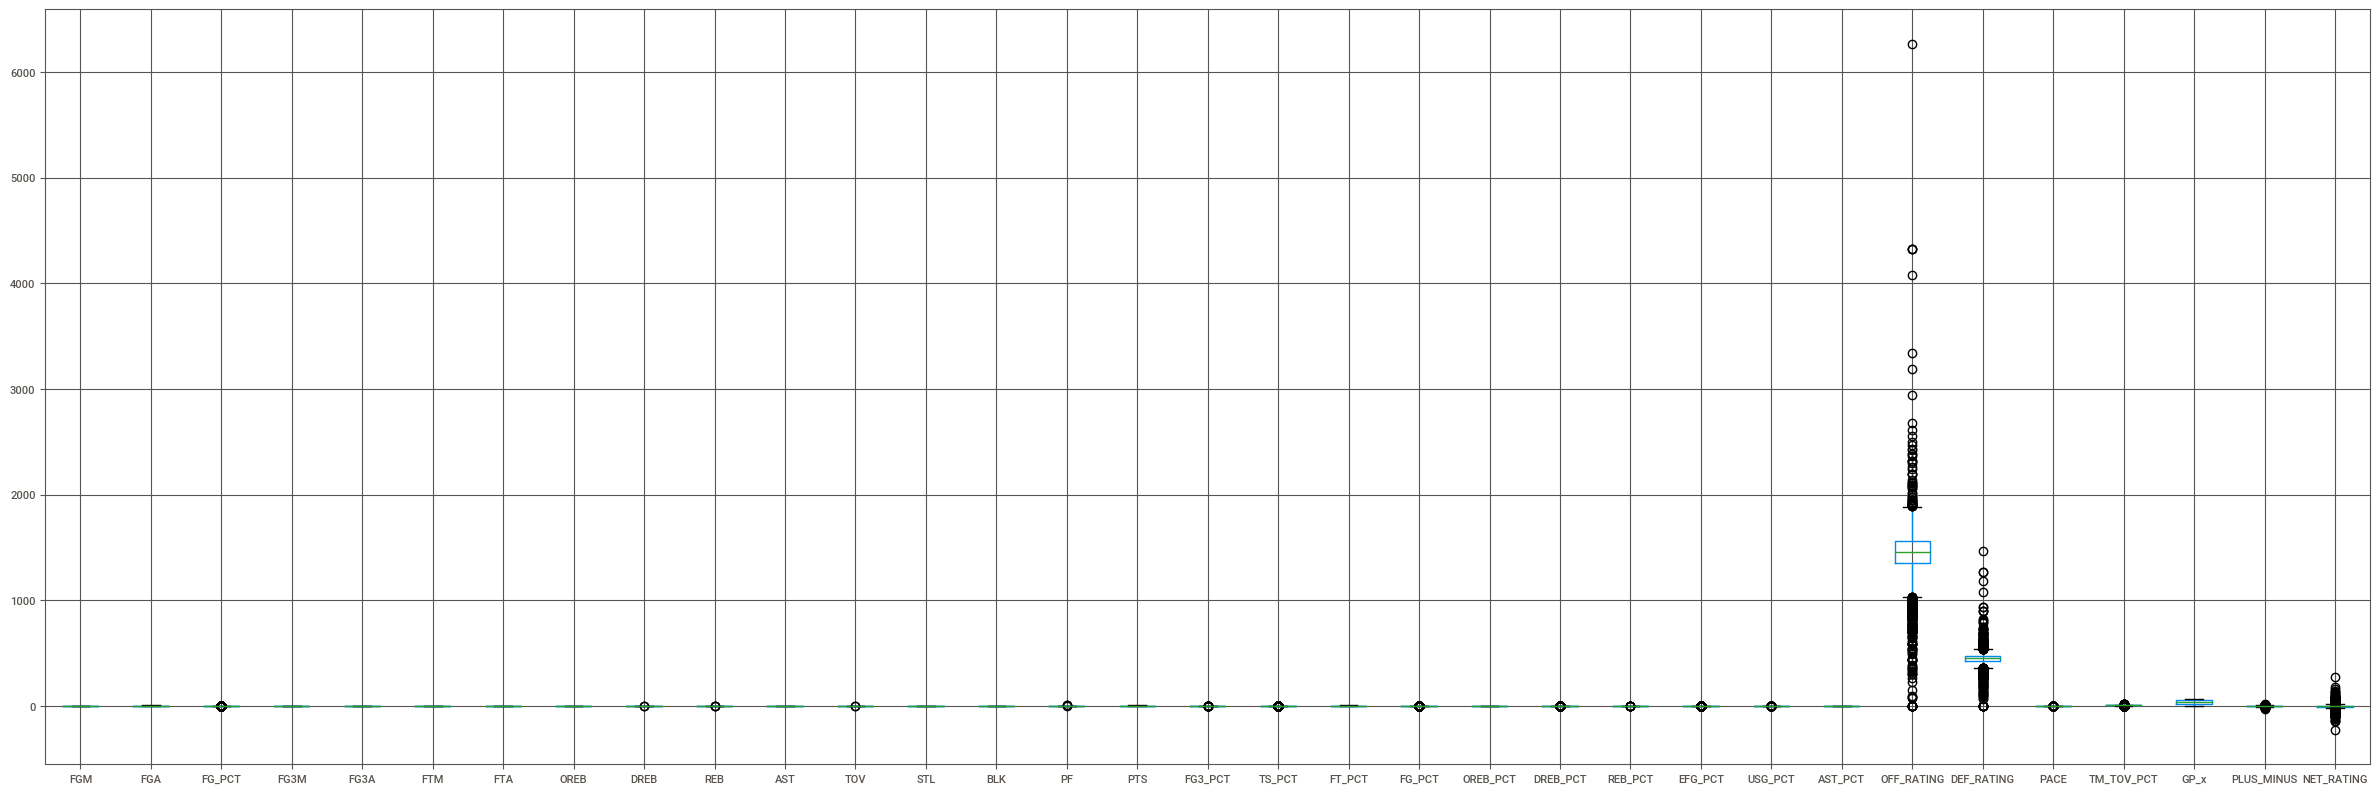

In [ ]:
con_1[['FGM',	'FGA',	'FG_PCT',	'FG3M',	'FG3A',	'FTM',	'FTA', 'OREB',	'DREB',	'REB',	'AST',	'TOV',	'STL',	'BLK',	'PF',	'PTS','FG3_PCT','TS_PCT', 'FT_PCT','FG_PCT', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'EFG_PCT', 'USG_PCT','AST_PCT','OFF_RATING','DEF_RATING','PACE', 'TM_TOV_PCT','GP_x','PLUS_MINUS','NET_RATING']].boxplot(figsize=(30,10))

In [ ]:
con_1.skew()

GP_x         -0.381344
W            -0.160926
L            -0.152731
W_PCT_x       0.005673
OFF_RATING    1.522991
DEF_RATING    1.777215
NET_RATING    0.548686
AST_PCT       0.097295
AST_TO        0.010562
TM_TOV_PCT    0.548234
TS_PCT        0.786703
OREB_PCT      0.215114
DREB_PCT     -0.035143
REB_PCT       0.019100
EFG_PCT       0.608274
PIE           2.408643
USG_PCT      -0.035745
TS_PCT.1      0.786703
PACE          0.000000
POSS         -0.298358
FGM          -0.016563
FGA          -0.032486
FG_PCT        0.289712
FG3M          0.112903
FG3A          0.000549
FG3_PCT       0.044131
FTM           0.061313
FTA           0.032521
FT_PCT       -0.170916
OREB          0.082467
DREB         -0.003223
REB          -0.003984
AST           0.059088
TOV           0.015713
STL           0.017680
BLK           0.146660
PF           -0.055559
PTS          -0.033574
PLUS_MINUS   -0.157833
dtype: float64

In [ ]:
con_2 = iqrdf(con_1)

In [ ]:
con_3 = standard(con_2)

In [ ]:
con_4 = minmax(con_3)

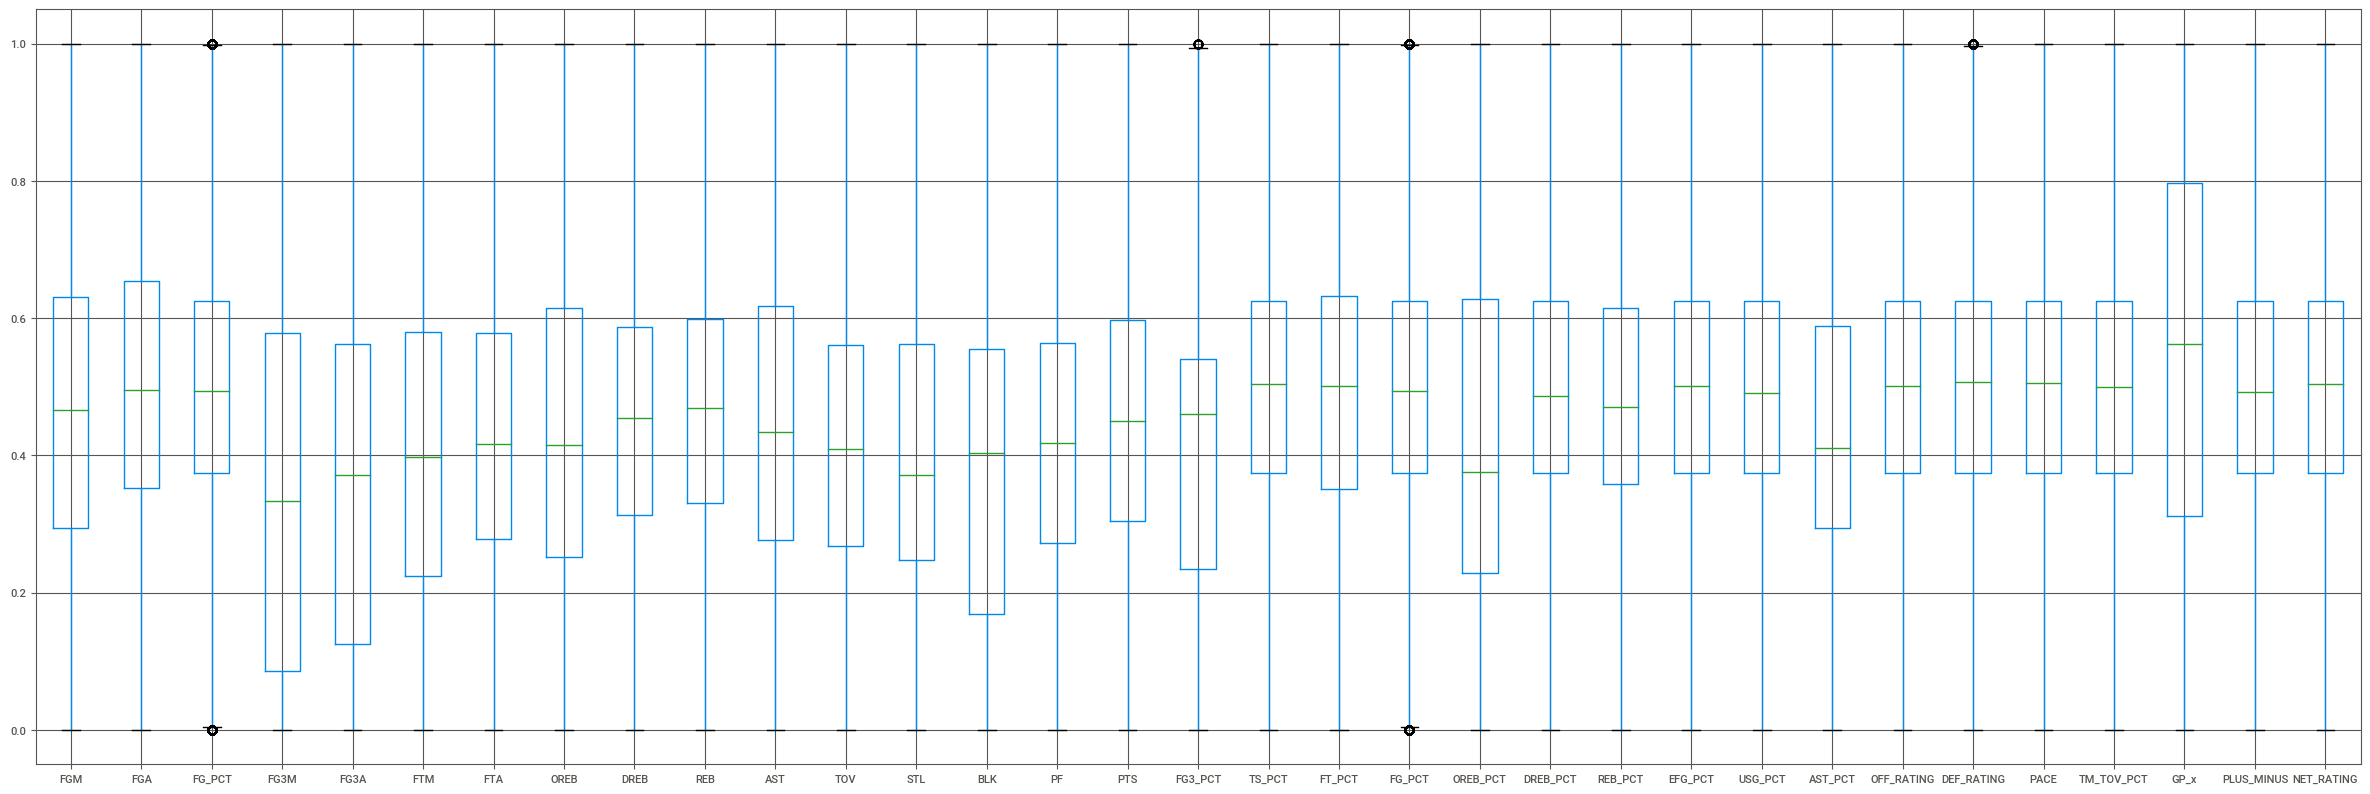

In [ ]:
con_4[['FGM',	'FGA',	'FG_PCT',	'FG3M',	'FG3A',	'FTM',	'FTA', 'OREB',	'DREB',	'REB',	'AST',	'TOV',	'STL',	'BLK',	'PF',	'PTS','FG3_PCT','TS_PCT', 'FT_PCT','FG_PCT', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'EFG_PCT', 'USG_PCT','AST_PCT','OFF_RATING','DEF_RATING','PACE', 'TM_TOV_PCT','GP_x','PLUS_MINUS','NET_RATING']].boxplot(figsize=(30,10))

In [ ]:
continuous_final = con_4

In [ ]:
continuous_final.skew()

GP_x         -0.381344
W            -0.160926
L            -0.152731
W_PCT_x      -0.012768
OFF_RATING   -0.325922
DEF_RATING   -0.131848
NET_RATING   -0.192420
AST_PCT       0.097295
AST_TO       -0.174991
TM_TOV_PCT   -0.036673
TS_PCT       -0.237912
OREB_PCT      0.215114
DREB_PCT     -0.025915
REB_PCT       0.010581
EFG_PCT      -0.184474
PIE          -0.061744
USG_PCT       0.102981
TS_PCT.1     -0.237912
PACE         -0.018616
POSS         -0.298358
FGM          -0.016563
FGA          -0.032486
FG_PCT        0.034195
FG3M          0.112903
FG3A          0.000549
FG3_PCT      -0.476627
FTM           0.061313
FTA           0.032521
FT_PCT       -0.170916
OREB          0.082467
DREB         -0.003583
REB          -0.004722
AST           0.059088
TOV           0.015209
STL           0.017680
BLK           0.146660
PF           -0.070181
PTS          -0.033574
PLUS_MINUS    0.063268
dtype: float64

#Merge data frames

In [ ]:
continuous_final.reset_index(drop=True, inplace=True)
categorical.reset_index(drop=True, inplace=True)
target.reset_index(drop=True, inplace=True)

In [ ]:
Identifiers

PLAYER_ID   TEAM_ID_x    PLAYER_NAME_x TEAM_ABBREVIATION_x
0       201985  1610612754         AJ Price                 IND
1       201189  1610612761       Aaron Gray                 TOR
2         1733  1610612743    Al Harrington                 DEN
3       201143  1610612737       Al Horford                 ATL
4         2744  1610612762     Al Jefferson                 UTA
..         ...         ...              ...                 ...
587    1628380  1610612759     Zach Collins                 SAS
588     203897  1610612741      Zach LaVine                 CHI
589    1630192  1610612743       Zeke Nnaji                 DEN
590    1630533  1610612763  Ziaire Williams                 MEM
591    1629597  1610612762   Zylan Cheatham                 UTA

[5334 rows x 4 columns]

In [ ]:
target

Y
0     0
1     0
2     0
3     0
4     0
...  ..
5329  0
5330  1
5331  0
5332  0
5333  0

[5334 rows x 1 columns]

In [ ]:
categorical

label_year_2012-13  label_year_2014-15  label_year_2016-17  label_year_2018-19  label_year_2020-22  label_position_C or C-F  label_position_F or F-G or F-C  label_position_G or G-F
0                      1                   0                   0                   0                   0                        0                               0                        1
1                      1                   0                   0                   0                   0                        1                               0                        0
2                      1                   0                   0                   0                   0                        0                               1                        0
3                      1                   0                   0                   0                   0                        1                               0                        0
4                      1                   0                   0                   0                   0                        1                               0                        0
...                  ...                 ...                 ...                 ...                 ...                      ...                             ...                      ...
5329                   0                   0                   0                   0                   1                        0                               1                        0
5330                   0                   0                   0                   0                   1                        0                               0                        1
5331                   0                   0                   0                   0                   1                        0                               1                        0
5332                   0                   0                   0                   0                   1                        0                               1                        0
5333                   0                   0                   0                   0                   1                        0                               1                        0

[5334 rows x 8 columns]

In [ ]:
continuous_final

GP_x         W         L   W_PCT_x  OFF_RATING  DEF_RATING  NET_RATING   AST_PCT    AST_TO  TM_TOV_PCT    TS_PCT  OREB_PCT  DREB_PCT   REB_PCT   EFG_PCT       PIE   USG_PCT  TS_PCT.1      PACE      POSS       FGM       FGA    FG_PCT      FG3M      FG3A   FG3_PCT       FTM       FTA    FT_PCT      OREB      DREB       REB       AST       TOV       STL       BLK        PF       PTS  PLUS_MINUS
0     0.328116  0.418004  0.276035  0.612493    0.327830    0.076230    0.673770  0.717322  0.611424    0.577293  0.439881  0.180770  0.415198  0.342634  0.382789  0.694731  0.525572  0.439881  0.249303  0.327672  0.339809  0.415240  0.323957  0.420922  0.422700  0.477715  0.397395  0.331058  1.000000  0.181358  0.277620  0.275064  0.540045  0.409157  0.474827  0.169497  0.247327  0.364654    0.645435
1     0.261740  0.209320  0.373665  0.284329    0.194824    0.543084    0.193750  0.168244  0.142632    1.000000  0.347450  0.827085  0.896437  0.832758  0.477688  0.437634  0.329326  0.347450  0.133426  0.331238  0.339809  0.351921  0.635753  0.000000  0.000000  0.000000  0.225032  0.376859  0.106221  0.777460  0.645509  0.695917  0.204132  0.465928  0.425370  0.486736  0.635326  0.304896    0.202159
2     0.561897  0.522875  0.481690  0.505041    0.552850    0.352615    0.663475  0.380333  0.280908    0.593362  0.512595  0.493345  0.659690  0.608261  0.536984  0.605293  0.727329  0.512595  0.408320  0.639555  0.708391  0.726190  0.539865  0.626620  0.636518  0.440488  0.608492  0.648300  0.384032  0.615400  0.689735  0.680276  0.491915  0.670808  0.601832  0.300397  0.707382  0.658228    0.726321
3     0.162678  0.268794  0.161001  0.630010    0.625000    0.336660    0.743572  0.438562  0.493440    0.494192  0.651511  0.682355  0.594255  0.618589  0.647332  0.731632  0.490974  0.651511  0.070744  0.365066  0.688276  0.644164  0.805586  0.000000  0.035648  0.000000  0.608492  0.610308  0.476620  0.813540  0.668172  0.725535  0.593746  0.560714  0.562605  0.827702  0.466432  0.614272    0.845783
4     0.461467  0.418004  0.461035  0.438178    0.550098    0.520275    0.529052  0.424612  0.522706    0.178610  0.437119  0.663502  0.765188  0.716427  0.451062  0.869063  0.811683  0.437119  0.201605  0.623336  0.865016  0.860573  0.608916  0.000000  0.035648  0.000000  0.657989  0.657040  0.518553  0.802192  0.822441  0.826688  0.568187  0.491722  0.562605  0.873938  0.611267  0.753611    0.477736
...        ...       ...       ...       ...         ...         ...         ...       ...       ...         ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...         ...
5329  0.064508  0.140976  0.090997  0.592953    0.481875    0.452187    0.519203  0.598651  0.465248    0.816733  0.420605  0.736285  0.709810  0.708136  0.501826  0.537071  0.532402  0.420605  0.724214  0.181210  0.443154  0.479934  0.510967  0.379791  0.327171  0.622562  0.225032  0.305702  0.216783  0.700307  0.587616  0.629435  0.593746  0.581339  0.520407  0.486736  0.538956  0.411726    0.484965
5330  0.763590  0.752175  0.461035  0.654797    0.755501    0.674488    0.594403  0.639527  0.522706    0.476973  0.714211  0.115733  0.509736  0.433471  0.669796  0.736907  0.842407  0.714211  0.549219  0.853446  0.883919  0.878163  0.611593  0.848656  0.785307  0.576979  0.803580  0.773438  0.706727  0.252427  0.668172  0.610981  0.781773  0.756013  0.425370  0.486736  0.417954  0.844027    0.672536
5331  0.629015  0.616939  0.461035  0.582686    0.611034    0.677796    0.465781  0.168244  0.280908    0.393583  0.855685  0.700094  0.565136  0.604770  0.913619  0.484695  0.397378  0.855685  0.511348  0.531204  0.443154  0.432405  0.769485  0.492326  0.397812  0.711489  0.423716  0.469857  0.324622  0.661144  0.454167  0.527377  0.204132  0.267857  0.246931  0

In [ ]:
con_cat = pd.concat([continuous_final, categorical], axis=1)

In [ ]:
Complete_final = pd.concat([con_cat, target], axis=1) 

In [ ]:
Complete_final

GP_x         W         L   W_PCT_x  OFF_RATING  DEF_RATING  NET_RATING   AST_PCT    AST_TO  TM_TOV_PCT    TS_PCT  OREB_PCT  DREB_PCT   REB_PCT   EFG_PCT       PIE   USG_PCT  TS_PCT.1      PACE      POSS       FGM       FGA    FG_PCT      FG3M      FG3A   FG3_PCT       FTM       FTA    FT_PCT      OREB      DREB       REB       AST       TOV       STL       BLK        PF       PTS  PLUS_MINUS  label_year_2012-13  label_year_2014-15  label_year_2016-17  label_year_2018-19  label_year_2020-22  label_position_C or C-F  label_position_F or F-G or F-C  label_position_G or G-F  Y
0     0.328116  0.418004  0.276035  0.612493    0.327830    0.076230    0.673770  0.717322  0.611424    0.577293  0.439881  0.180770  0.415198  0.342634  0.382789  0.694731  0.525572  0.439881  0.249303  0.327672  0.339809  0.415240  0.323957  0.420922  0.422700  0.477715  0.397395  0.331058  1.000000  0.181358  0.277620  0.275064  0.540045  0.409157  0.474827  0.169497  0.247327  0.364654    0.645435                   1                   0                   0                   0                   0                        0                               0                        1  0
1     0.261740  0.209320  0.373665  0.284329    0.194824    0.543084    0.193750  0.168244  0.142632    1.000000  0.347450  0.827085  0.896437  0.832758  0.477688  0.437634  0.329326  0.347450  0.133426  0.331238  0.339809  0.351921  0.635753  0.000000  0.000000  0.000000  0.225032  0.376859  0.106221  0.777460  0.645509  0.695917  0.204132  0.465928  0.425370  0.486736  0.635326  0.304896    0.202159                   1                   0                   0                   0                   0                        1                               0                        0  0
2     0.561897  0.522875  0.481690  0.505041    0.552850    0.352615    0.663475  0.380333  0.280908    0.593362  0.512595  0.493345  0.659690  0.608261  0.536984  0.605293  0.727329  0.512595  0.408320  0.639555  0.708391  0.726190  0.539865  0.626620  0.636518  0.440488  0.608492  0.648300  0.384032  0.615400  0.689735  0.680276  0.491915  0.670808  0.601832  0.300397  0.707382  0.658228    0.726321                   1                   0                   0                   0                   0                        0                               1                        0  0
3     0.162678  0.268794  0.161001  0.630010    0.625000    0.336660    0.743572  0.438562  0.493440    0.494192  0.651511  0.682355  0.594255  0.618589  0.647332  0.731632  0.490974  0.651511  0.070744  0.365066  0.688276  0.644164  0.805586  0.000000  0.035648  0.000000  0.608492  0.610308  0.476620  0.813540  0.668172  0.725535  0.593746  0.560714  0.562605  0.827702  0.466432  0.614272    0.845783                   1                   0                   0                   0                   0                        1                               0                        0  0
4     0.461467  0.418004  0.461035  0.438178    0.550098    0.520275    0.529052  0.424612  0.522706    0.178610  0.437119  0.663502  0.765188  0.716427  0.451062  0.869063  0.811683  0.437119  0.201605  0.623336  0.865016  0.860573  0.608916  0.000000  0.035648  0.000000  0.657989  0.657040  0.518553  0.802192  0.822441  0.826688  0.568187  0.491722  0.562605  0.873938  0.611267  0.753611    0.477736                   1                   0                   0                   0                   0                        1                               0                        0  0
...        ...       ...       ...       ...         ...         ...         ...       ...       ...         ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...         ...                 ...                 ...                 ...      

In [ ]:
Complete_final.isna().sum()

GP_x                              0
W                                 0
L                                 0
W_PCT_x                           0
OFF_RATING                        0
DEF_RATING                        0
NET_RATING                        0
AST_PCT                           0
AST_TO                            0
TM_TOV_PCT                        0
TS_PCT                            0
OREB_PCT                          0
DREB_PCT                          0
REB_PCT                           0
EFG_PCT                           0
PIE                               0
USG_PCT                           0
TS_PCT.1                          0
PACE                              0
POSS                              0
FGM                               0
FGA                               0
FG_PCT                            0
FG3M                              0
FG3A                              0
FG3_PCT                           0
FTM                               0
FTA                         

In [ ]:
Complete_final.to_csv('/content/drive/MyDrive/Capstone/Complete_final',index=False)